In [1]:
import pandas as pd
import os
import numpy as np
import joblib
import pandas_ta as pa
import matplotlib.pyplot as plt
import mplfinance as mpf
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
def percent_to_float(x):
    x = x.replace(',', '')
    if x.endswith('%'):
        return float(x.strip('%')) / 100
    else:
        return float(x)

In [4]:
def convert_volume(volume_str):
    if isinstance(volume_str, str):
        volume_str = volume_str.replace(',', '')
        
        if 'M' in volume_str:
            return float(volume_str.replace('M', '')) * 1_000_000
        elif 'K' in volume_str:
            return float(volume_str.replace('K', '')) * 1_000
        else:
            return float(volume_str)
    else:
        return volume_str

In [5]:
def calculate_RSI(data, period=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

In [6]:
def calculate_stochastic(df, k_period=14, d_period=3):
    df['Lowest_Low'] = df['Low'].rolling(window=k_period).min()
    df['Highest_High'] = df['High'].rolling(window=k_period).max()
    df['%K'] = 100 * (df['Close'] - df['Lowest_Low']) / (df['Highest_High'] - df['Lowest_Low'])
    df['%D'] = df['%K'].rolling(window=d_period).mean()
    return df

In [7]:
def calculate_ADX(data, period=14):
    df = data.copy()
    df['TR'] = np.maximum((df['High'] - df['Low']),
    np.maximum(abs(df['High'] - df['Close'].shift(1)),
    abs(df['Low'] - df['Close'].shift(1))))
    df['+DM'] = np.where((df['High'] - df['High'].shift(1)) > (df['Low'].shift(1) - df['Low']),
    np.maximum(df['High'] - df['High'].shift(1), 0), 0)
    df['-DM'] = np.where((df['Low'].shift(1) - df['Low']) > (df['High'] - df['High'].shift(1)),
    np.maximum(df['Low'].shift(1) - df['Low'], 0), 0)
    df['+DI'] = 100 * (df['+DM'].ewm(span=period, adjust=False).mean() / df['TR'].ewm(span=period, adjust=False).mean())
    df['-DI'] = 100 * (df['-DM'].ewm(span=period, adjust=False).mean() / df['TR'].ewm(span=period, adjust=False).mean())

    df['DX'] = (abs(df['+DI'] - df['-DI']) / abs(df['+DI'] + df['-DI'])) * 100
    ADX = df['DX'].ewm(span=period, adjust=False).mean()
    return ADX

In [8]:
def calculate_ma200(df):
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df

In [9]:
def calculate_ma55(df):
    df['MA55'] = df['Close'].rolling(window=55).mean()
    return df

In [10]:
def get_trend(row):
    if row['MA7'] > row['MA25']:
        if row['RSI'] > 70:
            return 'strong uptrend'
        return 'uptrend'
    elif row['MA7'] < row['MA25']:
        if row['RSI'] < 30:
            return 'strong downtrend'
        return 'downtrend'
    else:
        return 'neutral'

In [11]:
def load_csv_files_from_directory(directory_path):
    # List all files in the directory
    files = os.listdir(directory_path)
    
    # Filter the list to include only CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Create a dictionary to store the DataFrames, with file names as keys
    dataframes = {}
    
    # Iterate over each CSV file and read it into a DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(directory_path, csv_file)
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        stock_name = csv_file.split(" ")[0]
        dataframes[stock_name] = df
    
    return dataframes

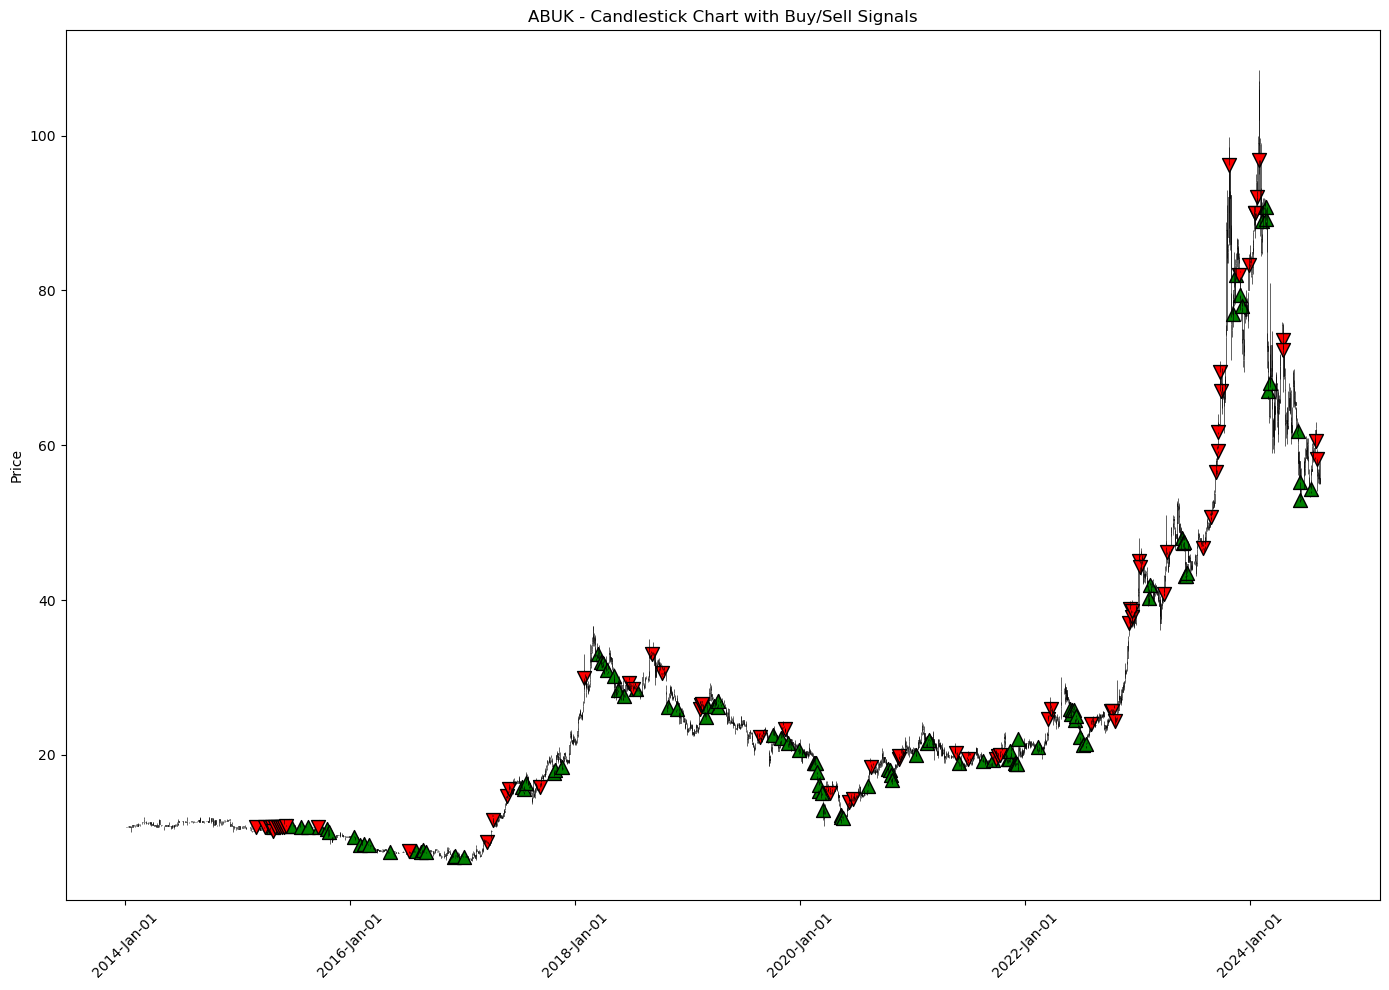

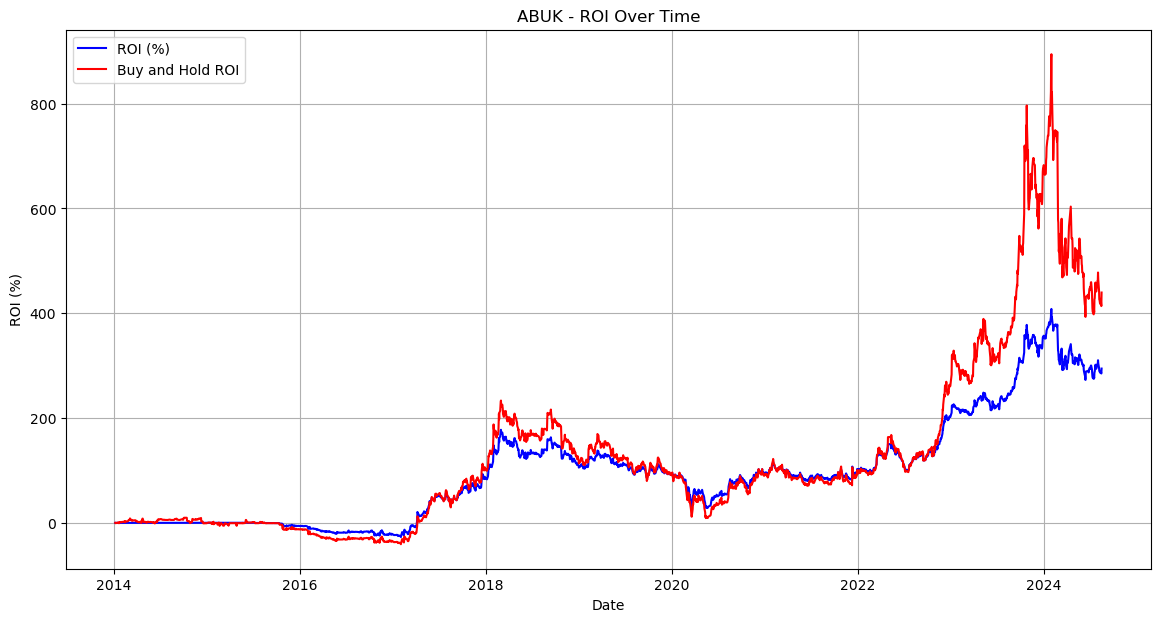

ABUK - Final ROI: 294.50%
ABUK - Buy and Hold ROI: 439.61%


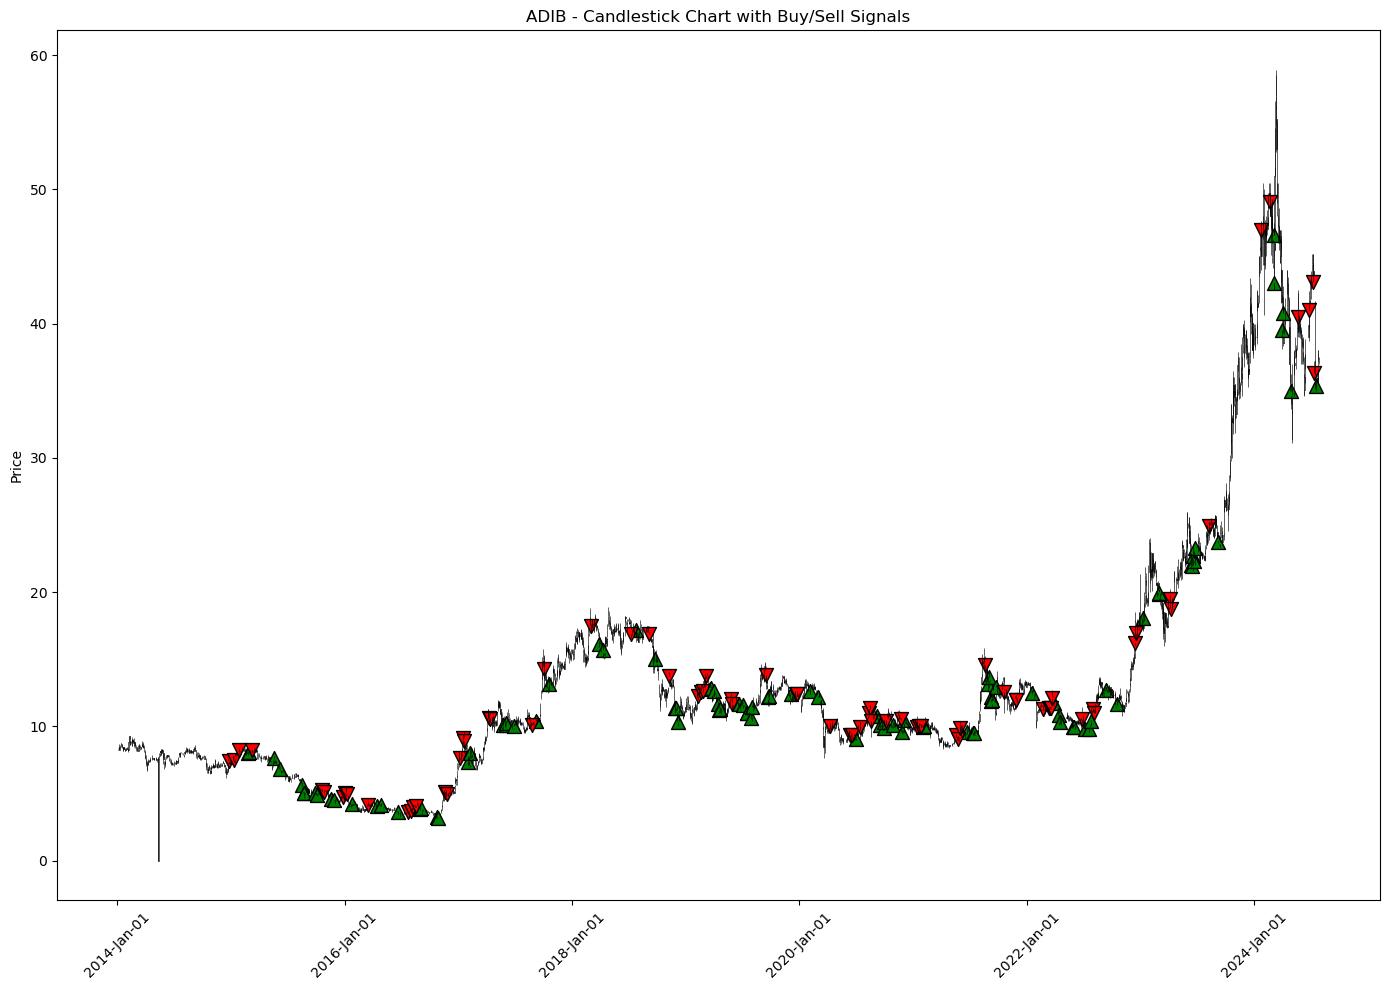

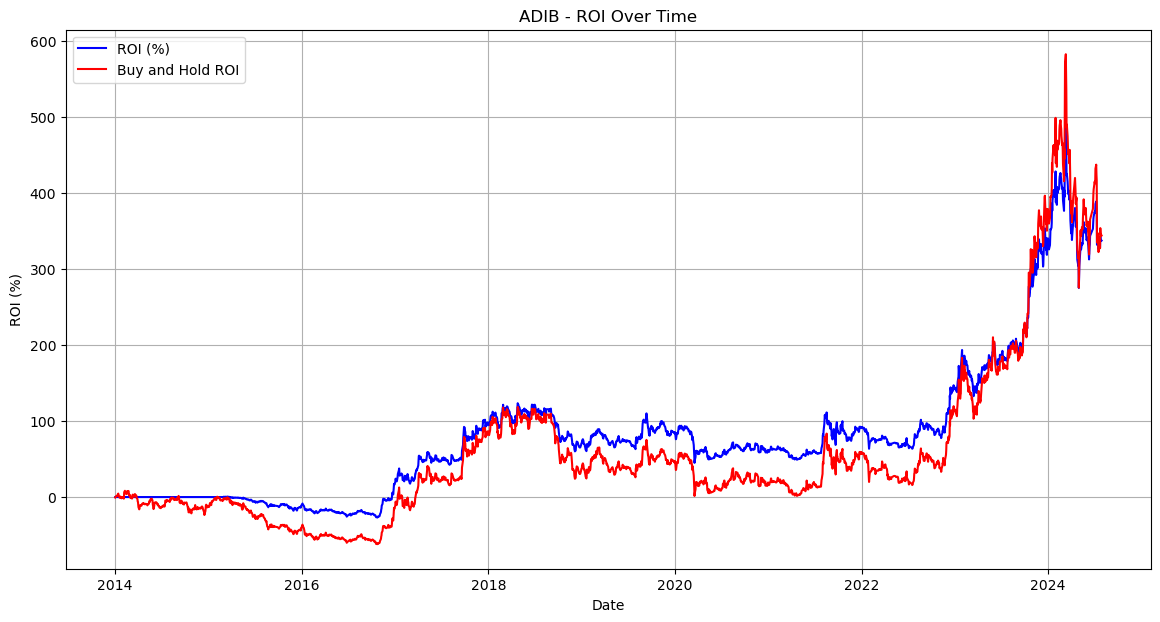

ADIB - Final ROI: 337.42%
ADIB - Buy and Hold ROI: 344.07%


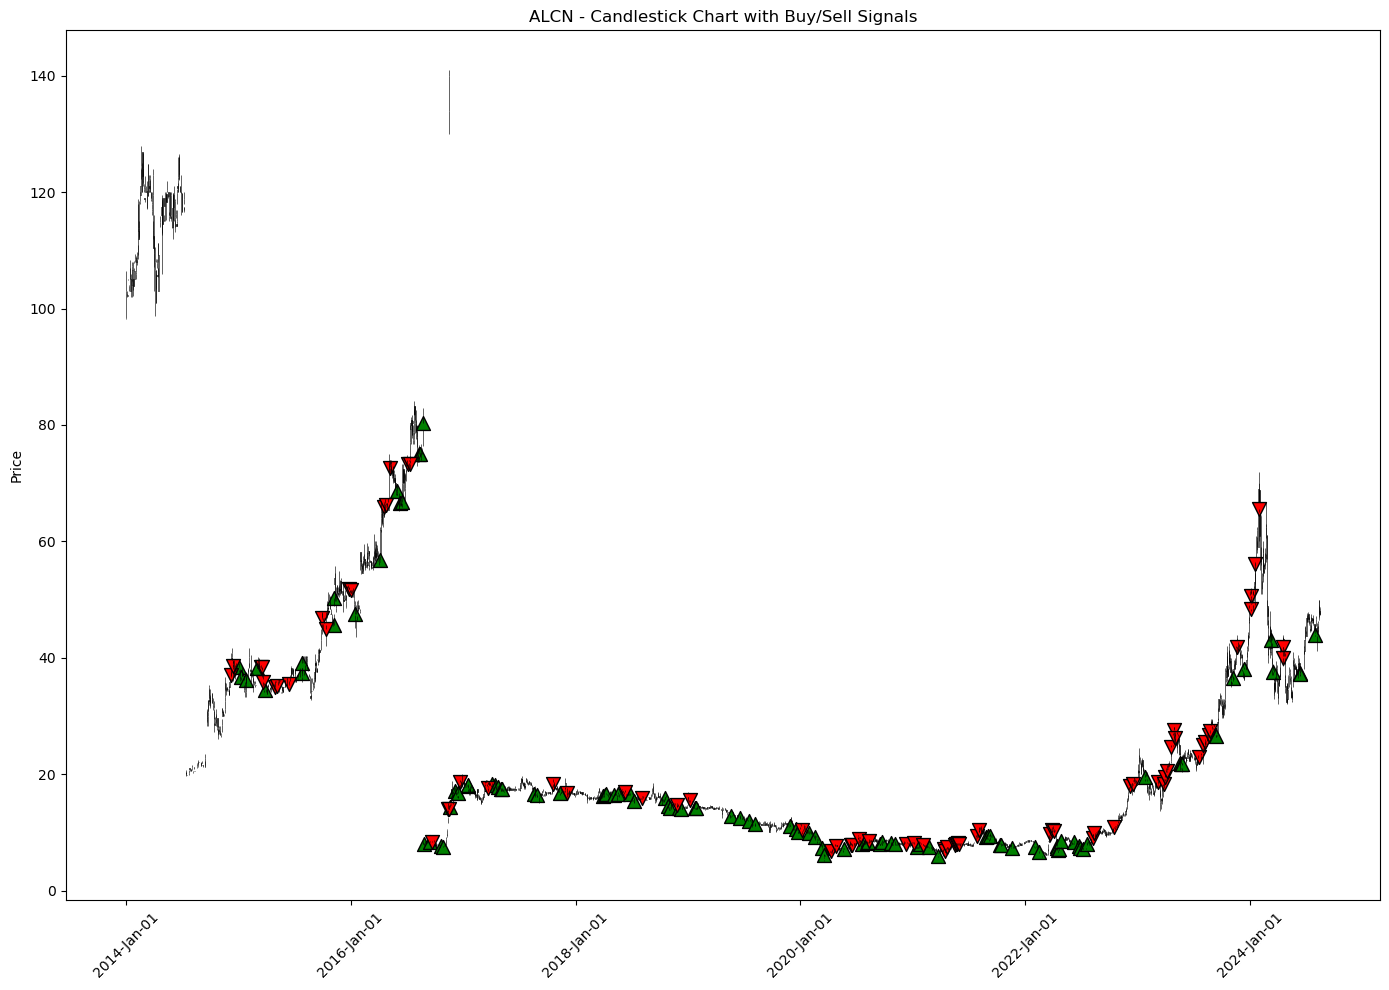

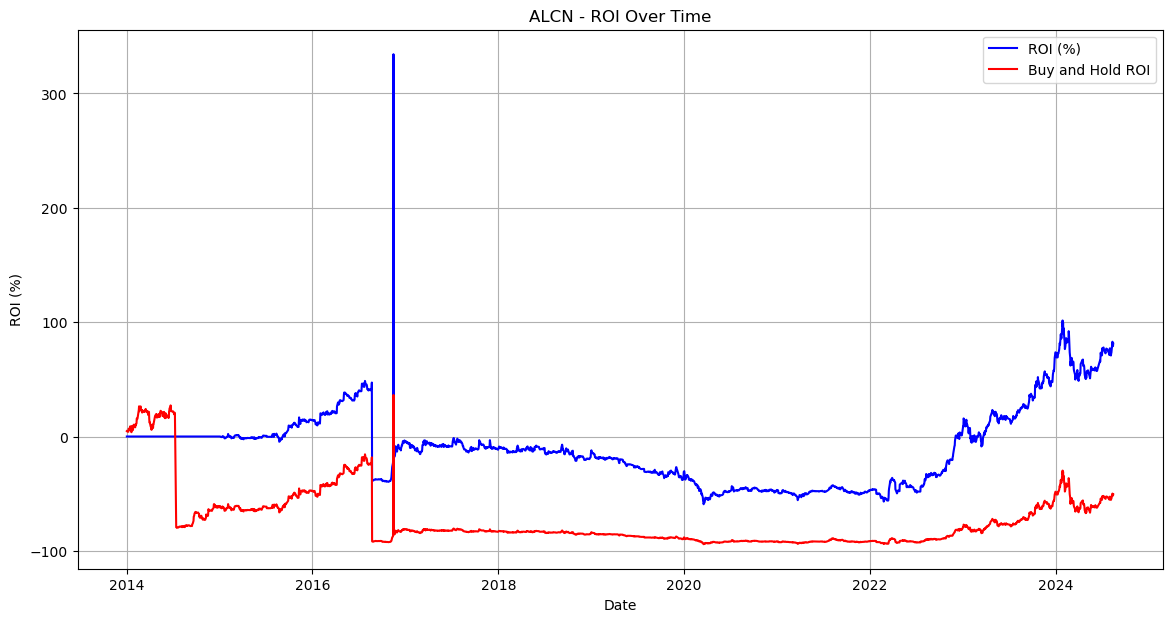

ALCN - Final ROI: 81.20%
ALCN - Buy and Hold ROI: -50.66%


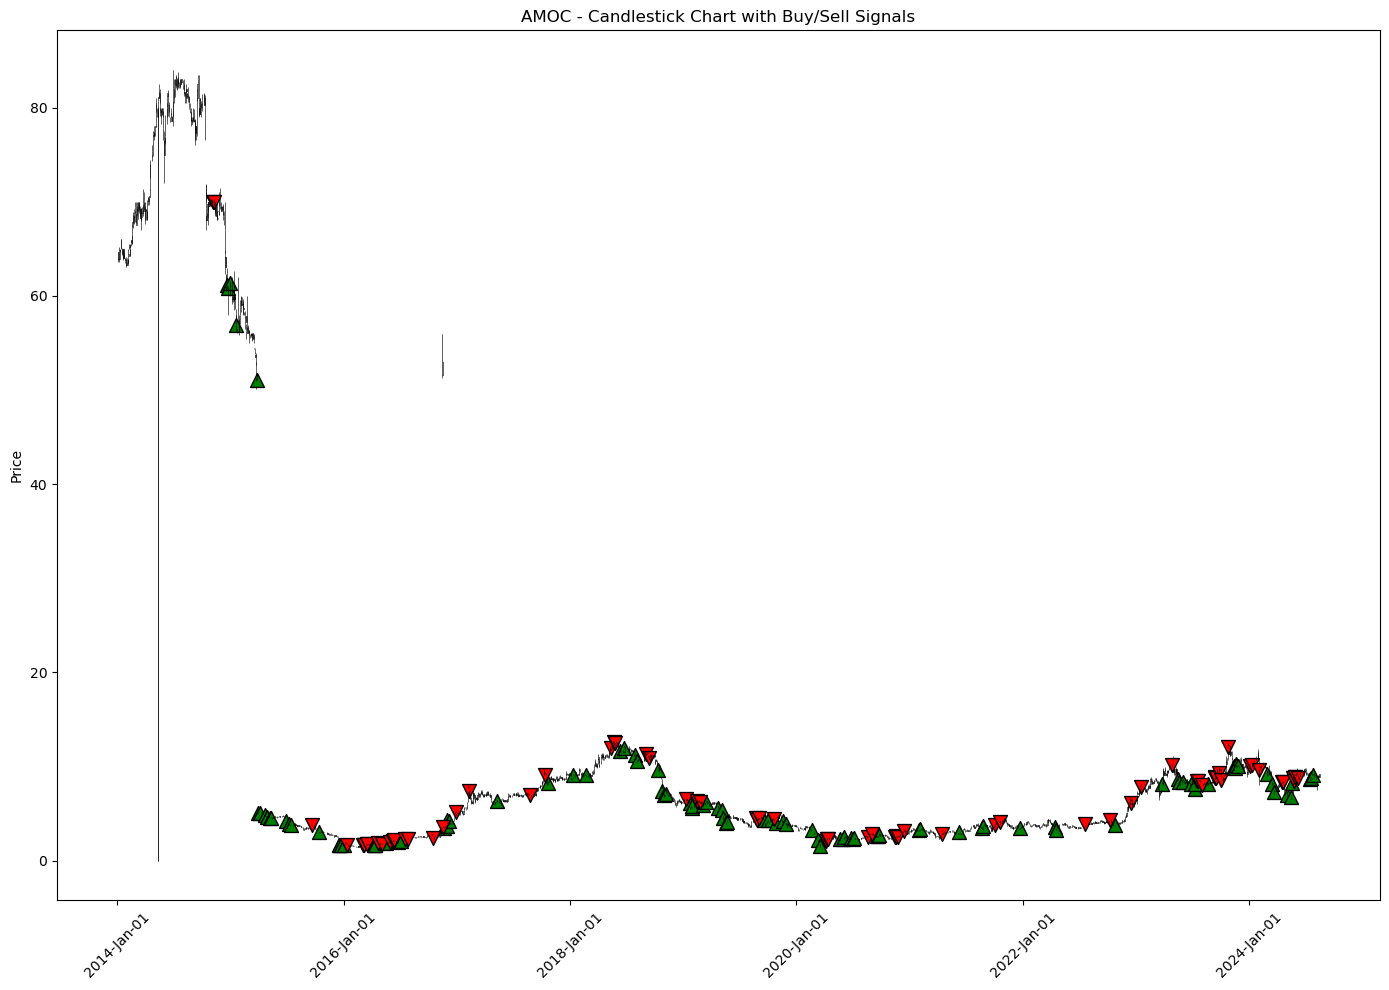

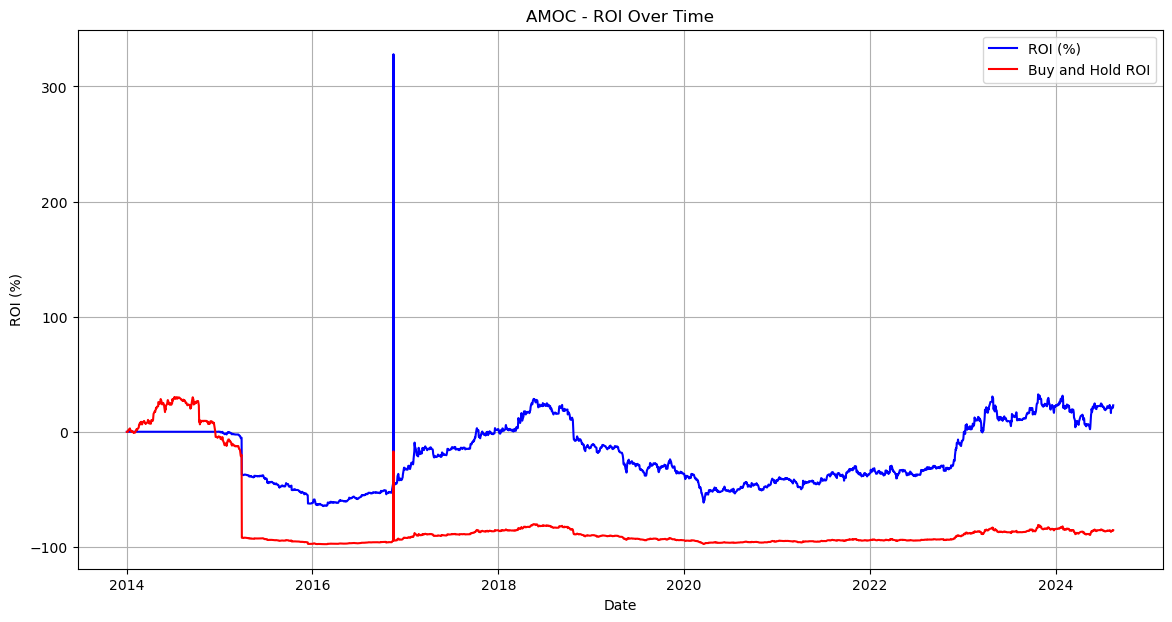

AMOC - Final ROI: 22.96%
AMOC - Buy and Hold ROI: -85.61%


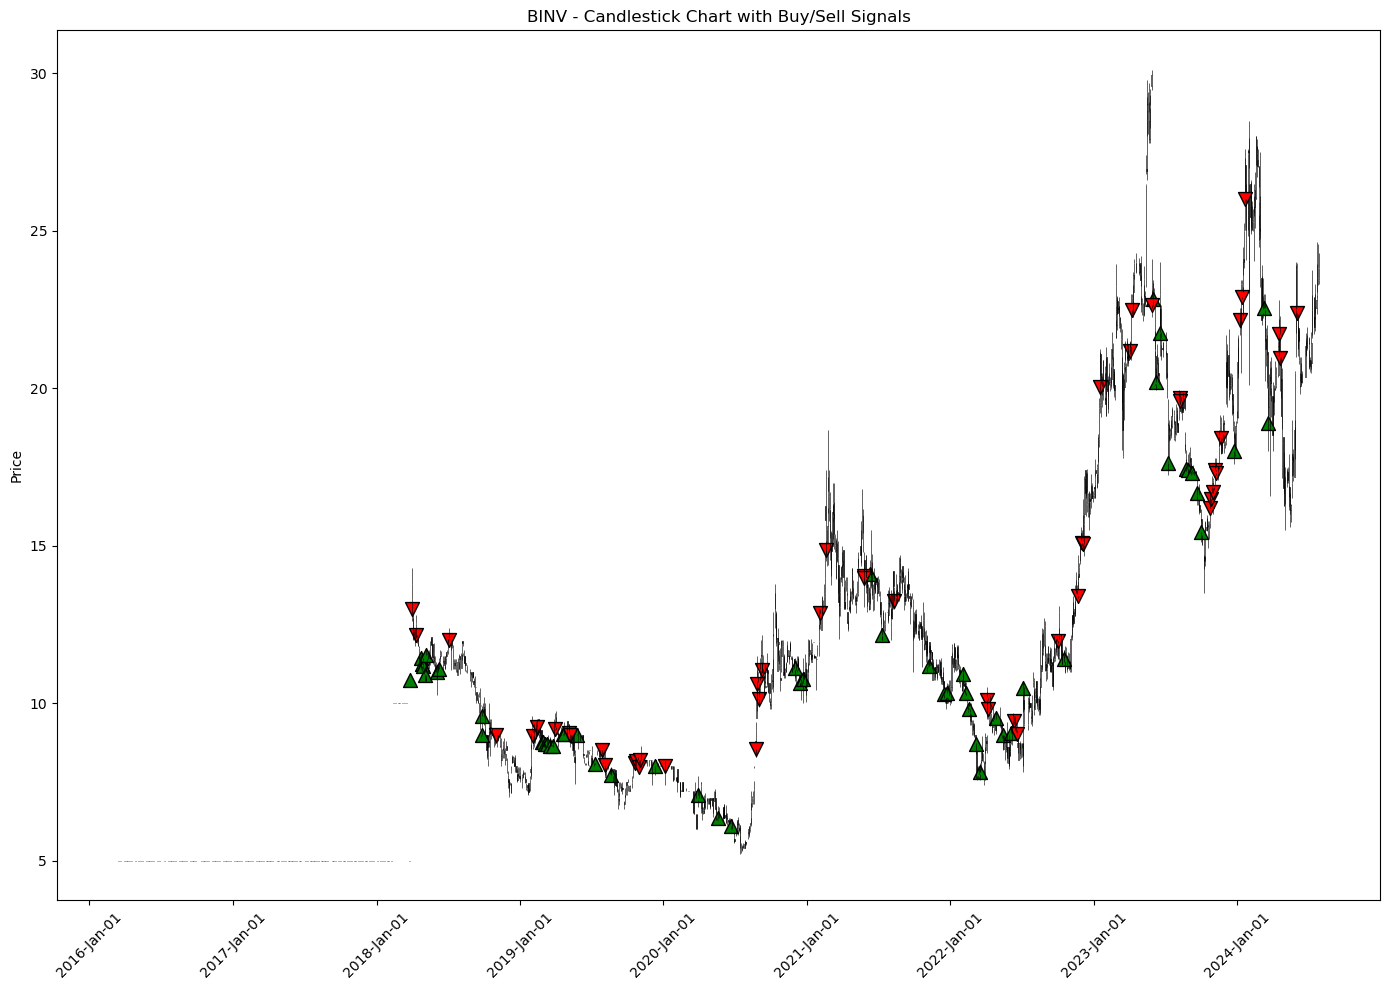

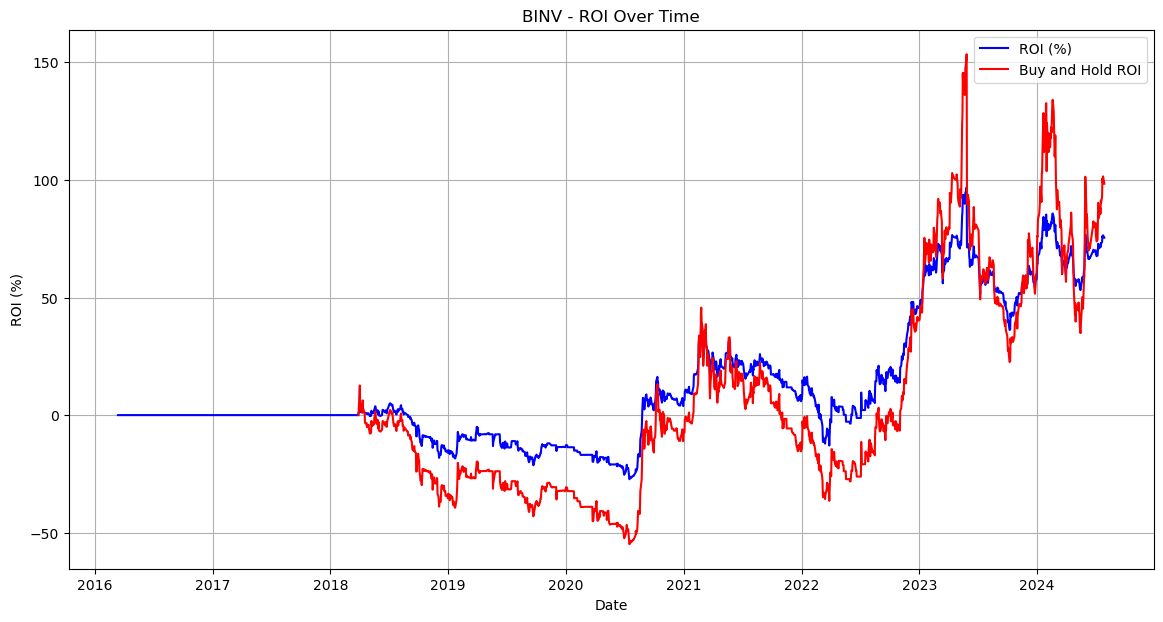

BINV - Final ROI: 75.45%
BINV - Buy and Hold ROI: 98.39%


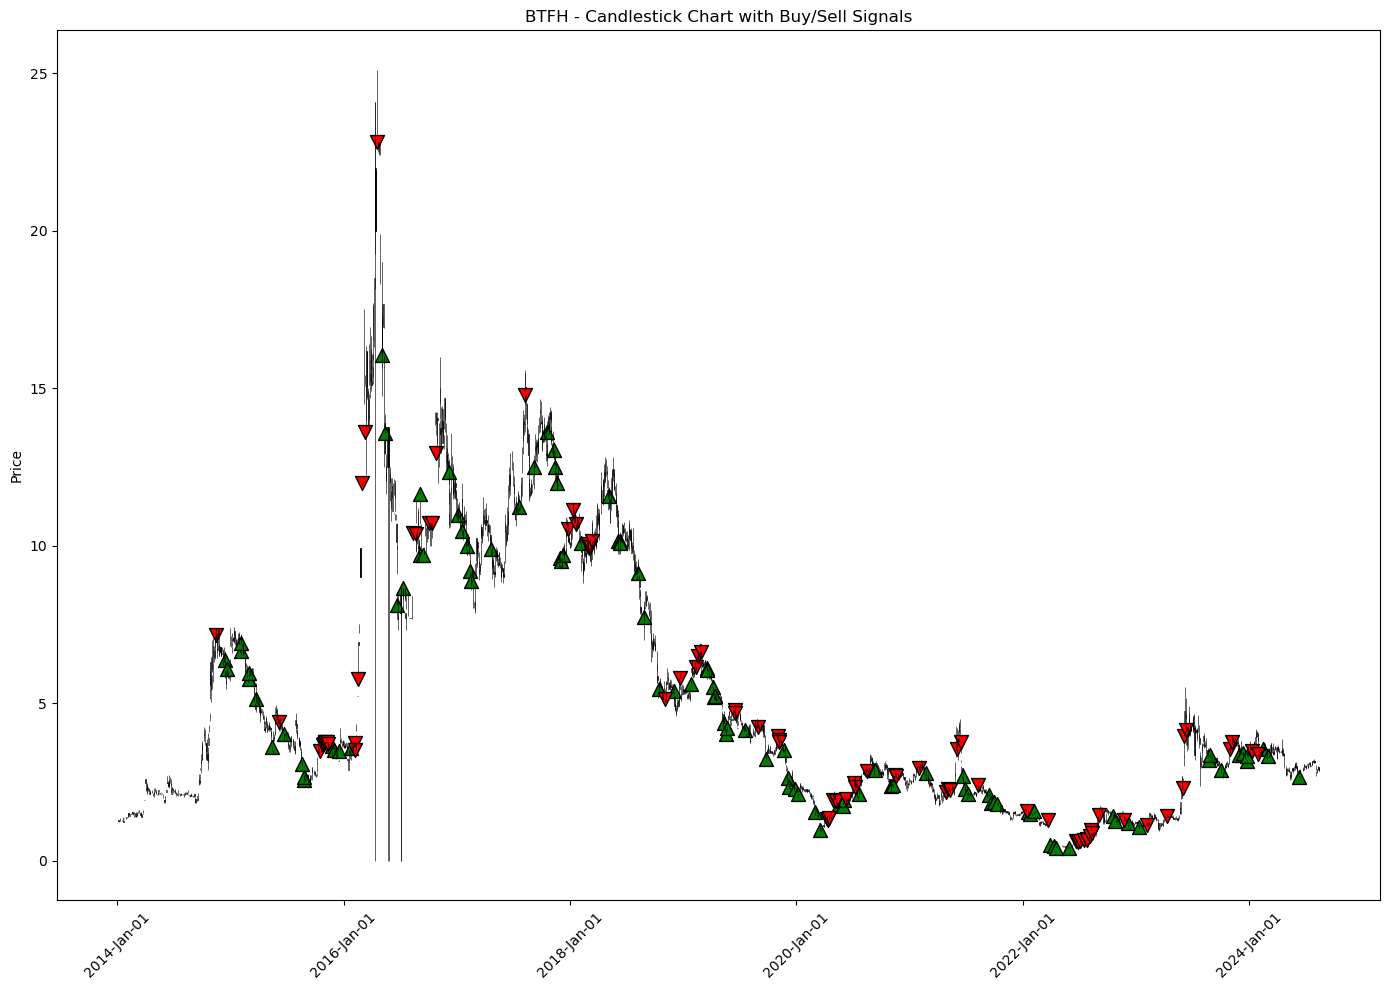

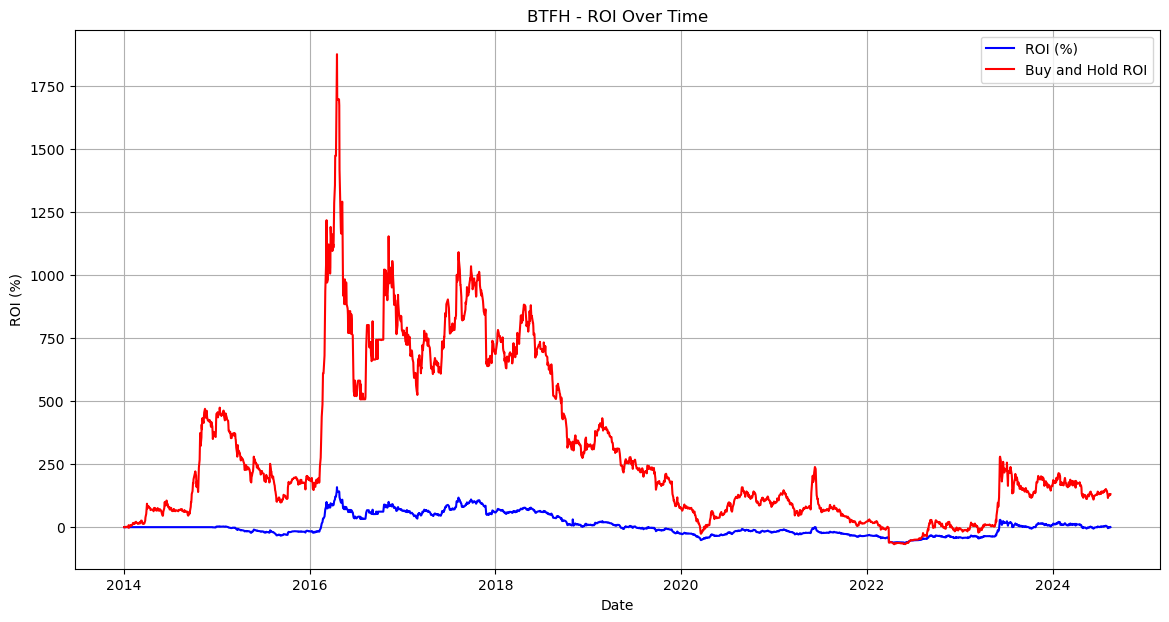

BTFH - Final ROI: -0.00%
BTFH - Buy and Hold ROI: 130.71%


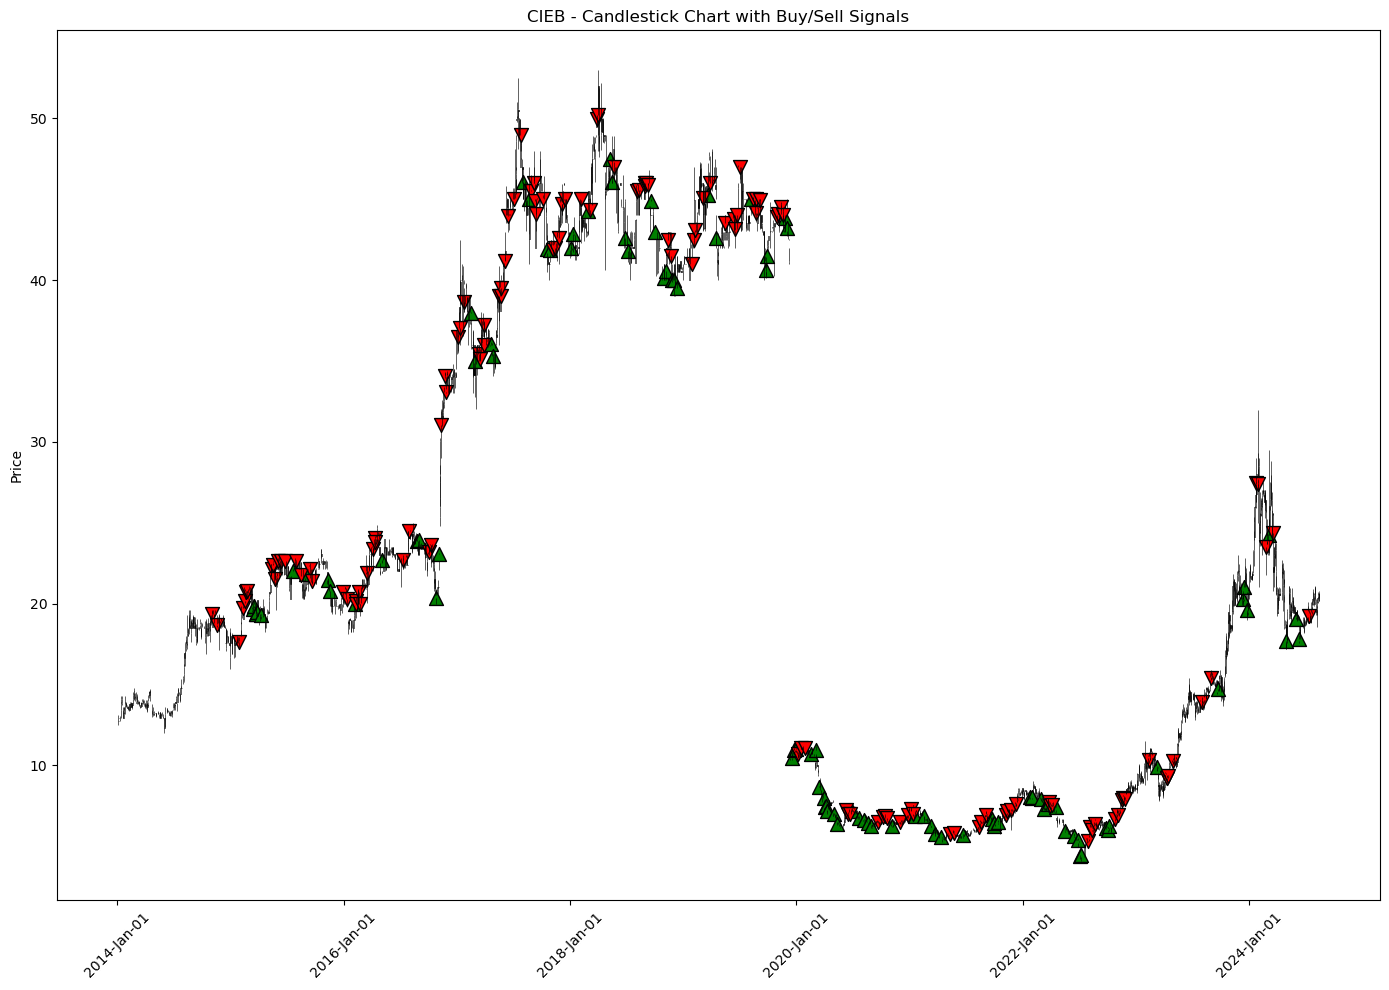

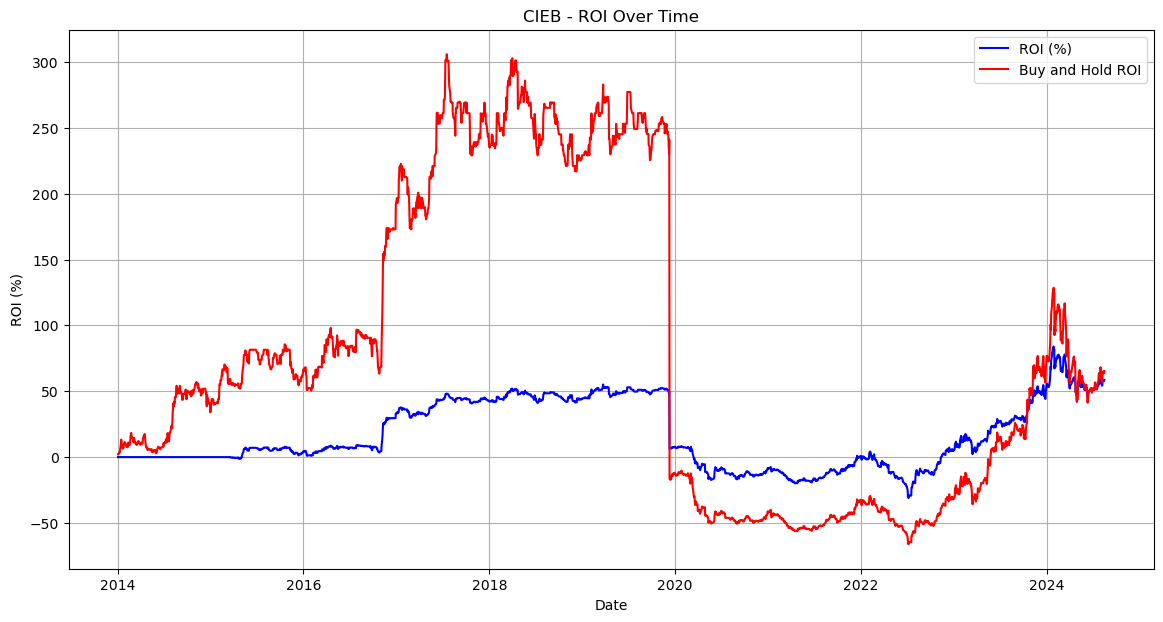

CIEB - Final ROI: 58.56%
CIEB - Buy and Hold ROI: 65.17%


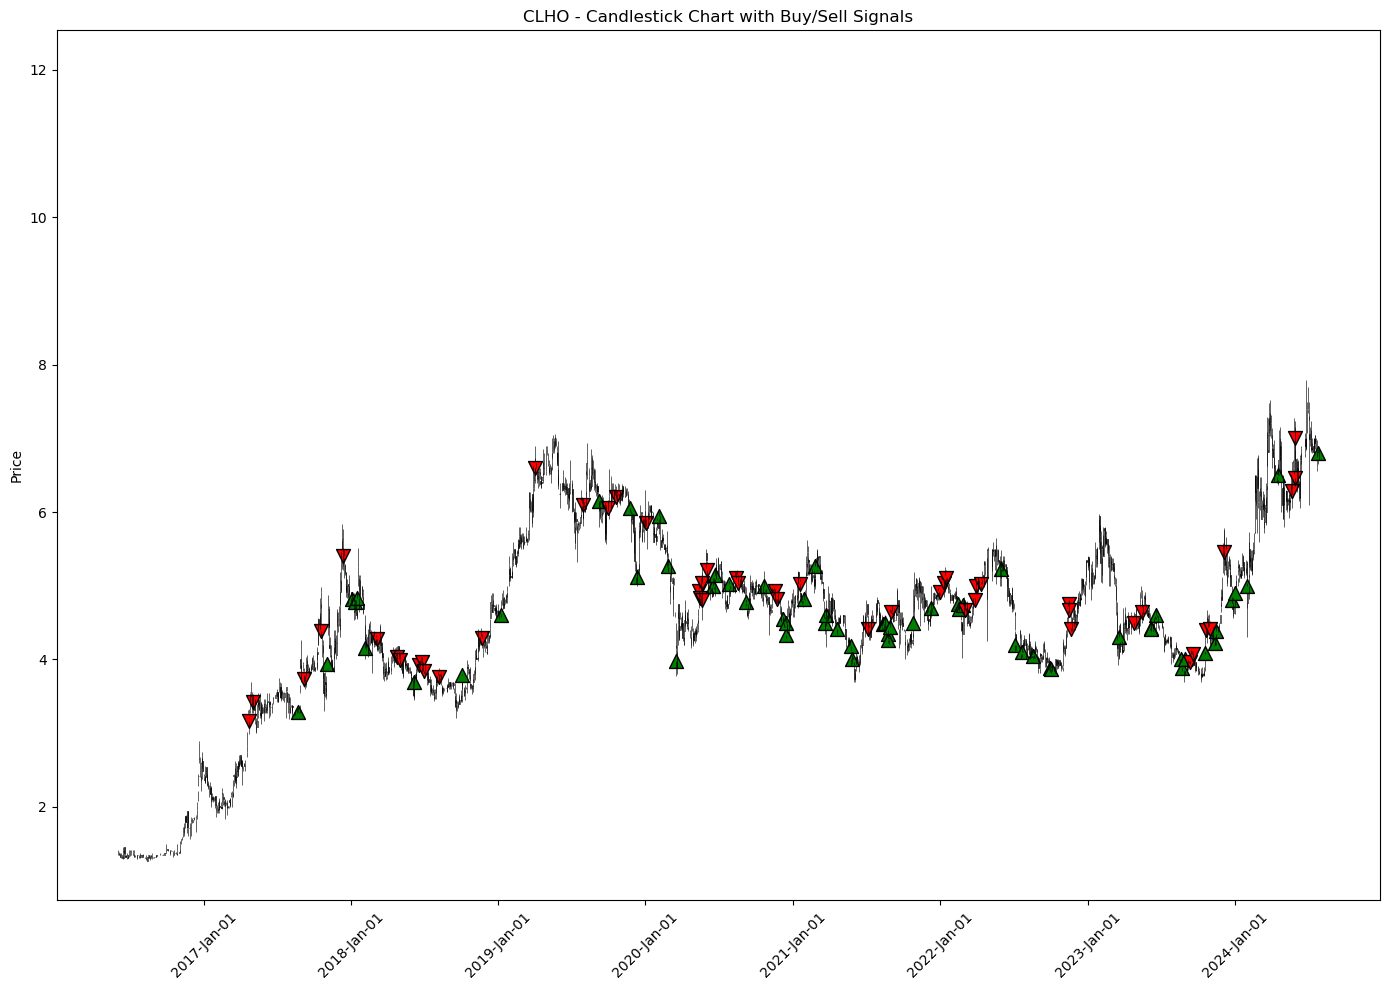

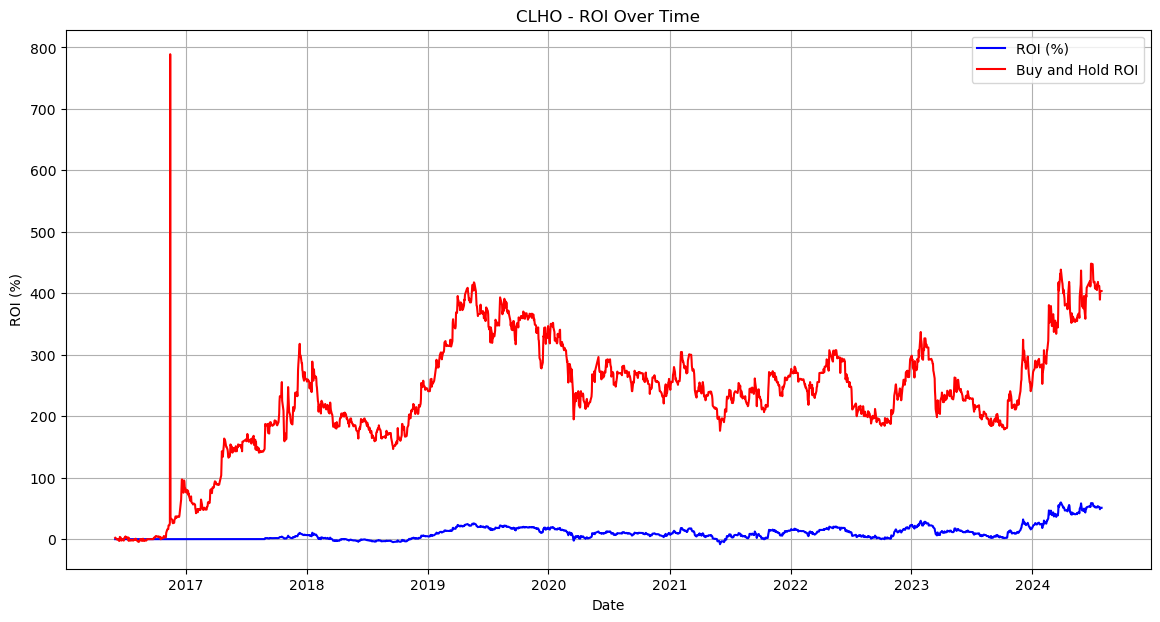

CLHO - Final ROI: 51.06%
CLHO - Buy and Hold ROI: 403.70%


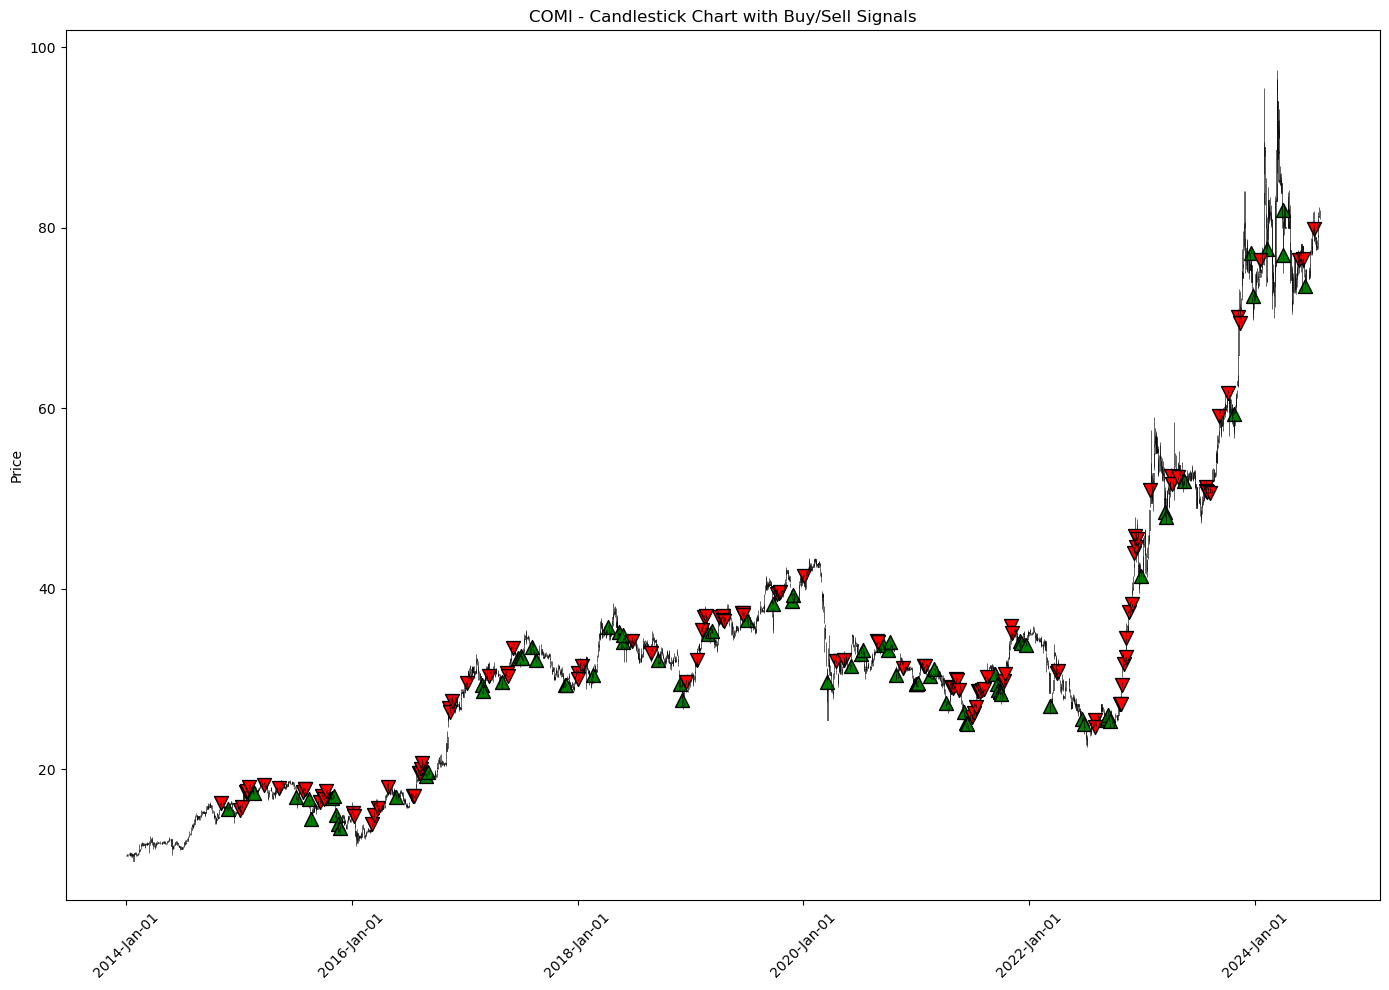

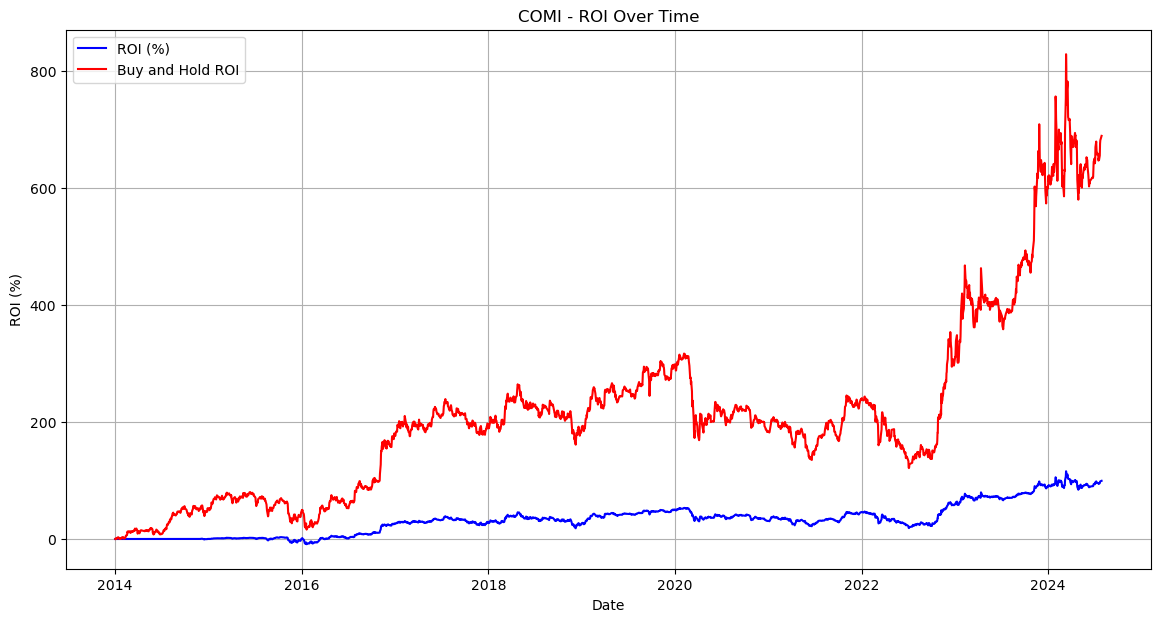

COMI - Final ROI: 99.37%
COMI - Buy and Hold ROI: 688.46%


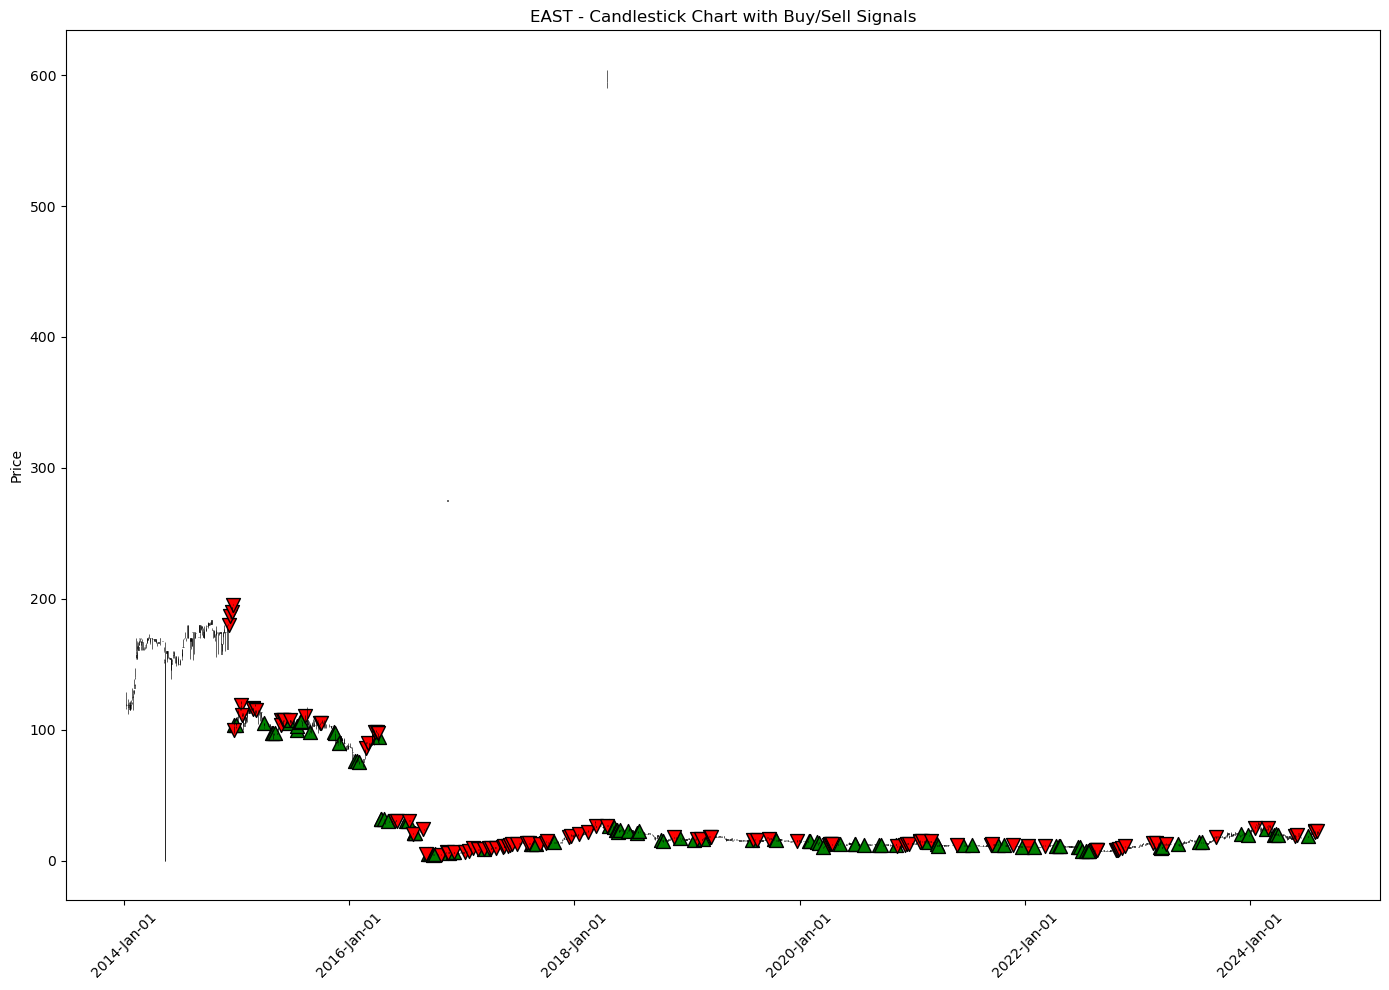

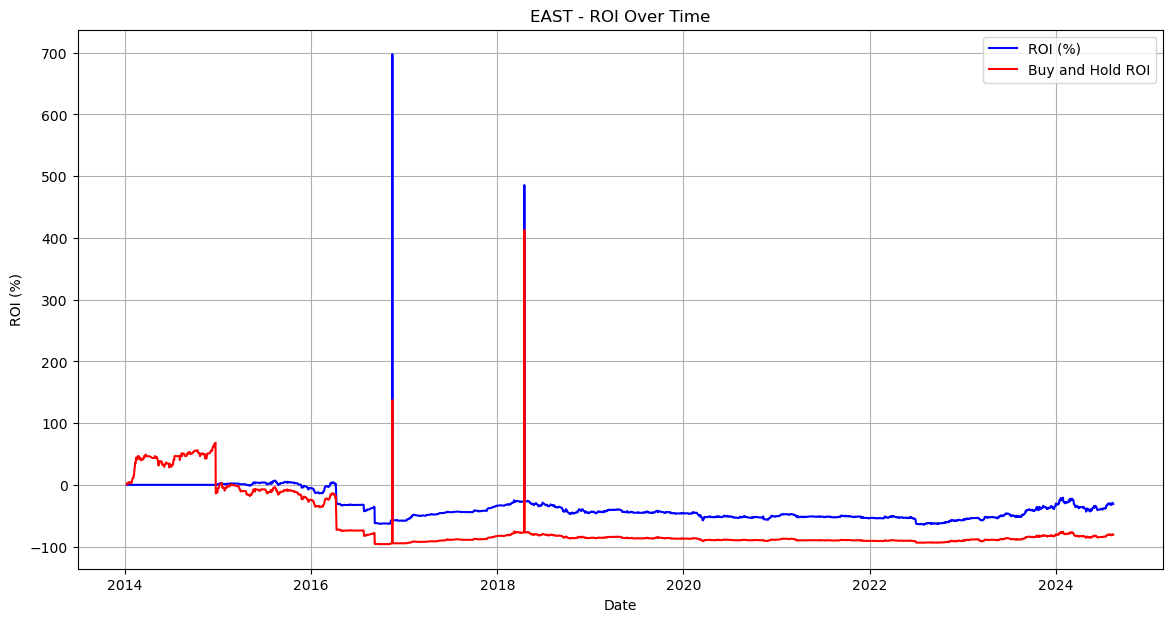

EAST - Final ROI: -31.09%
EAST - Buy and Hold ROI: -80.92%


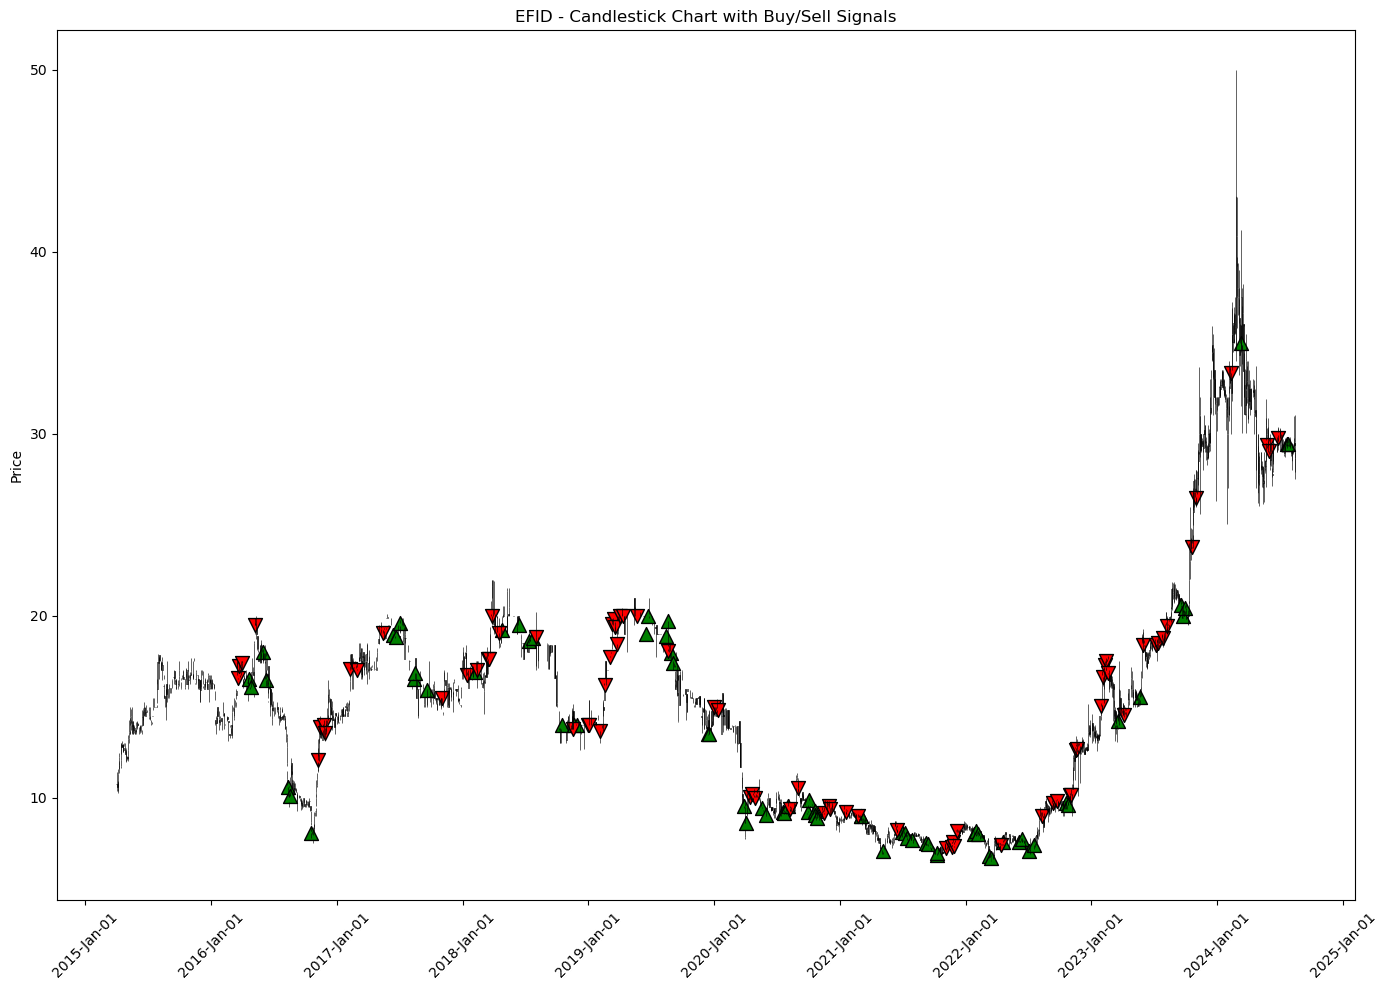

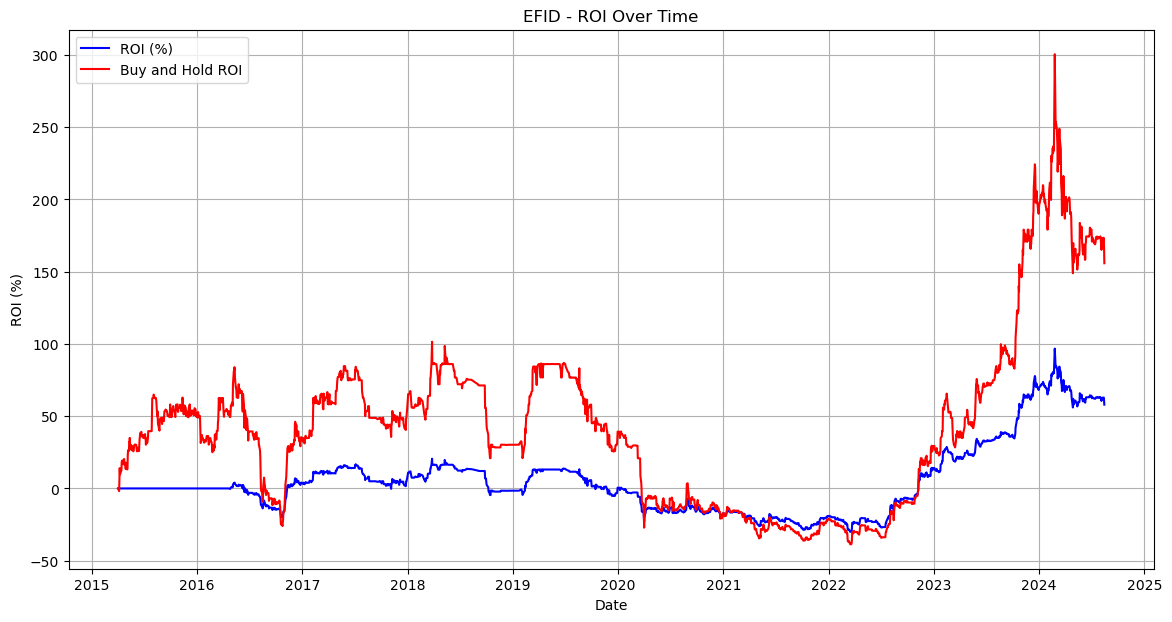

EFID - Final ROI: 57.96%
EFID - Buy and Hold ROI: 155.81%


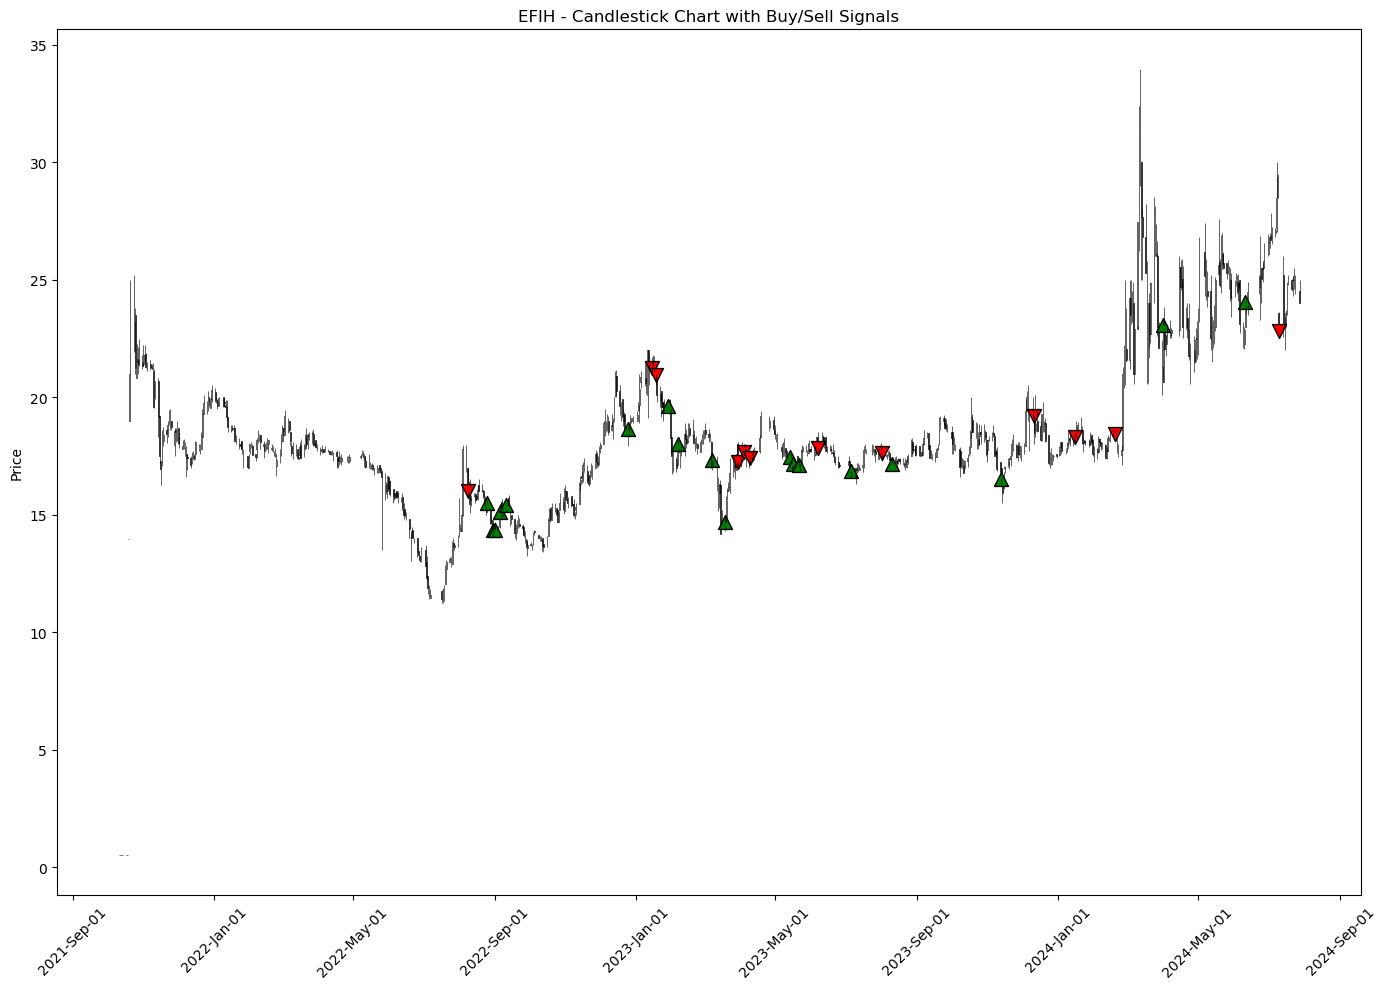

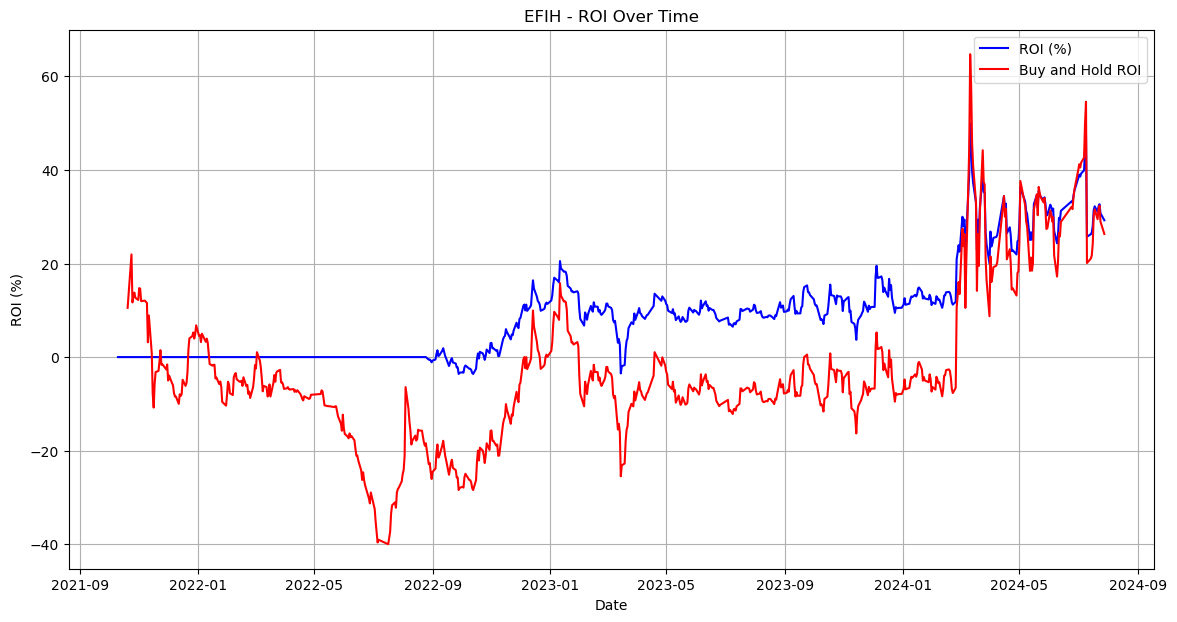

EFIH - Final ROI: 29.25%
EFIH - Buy and Hold ROI: 26.32%


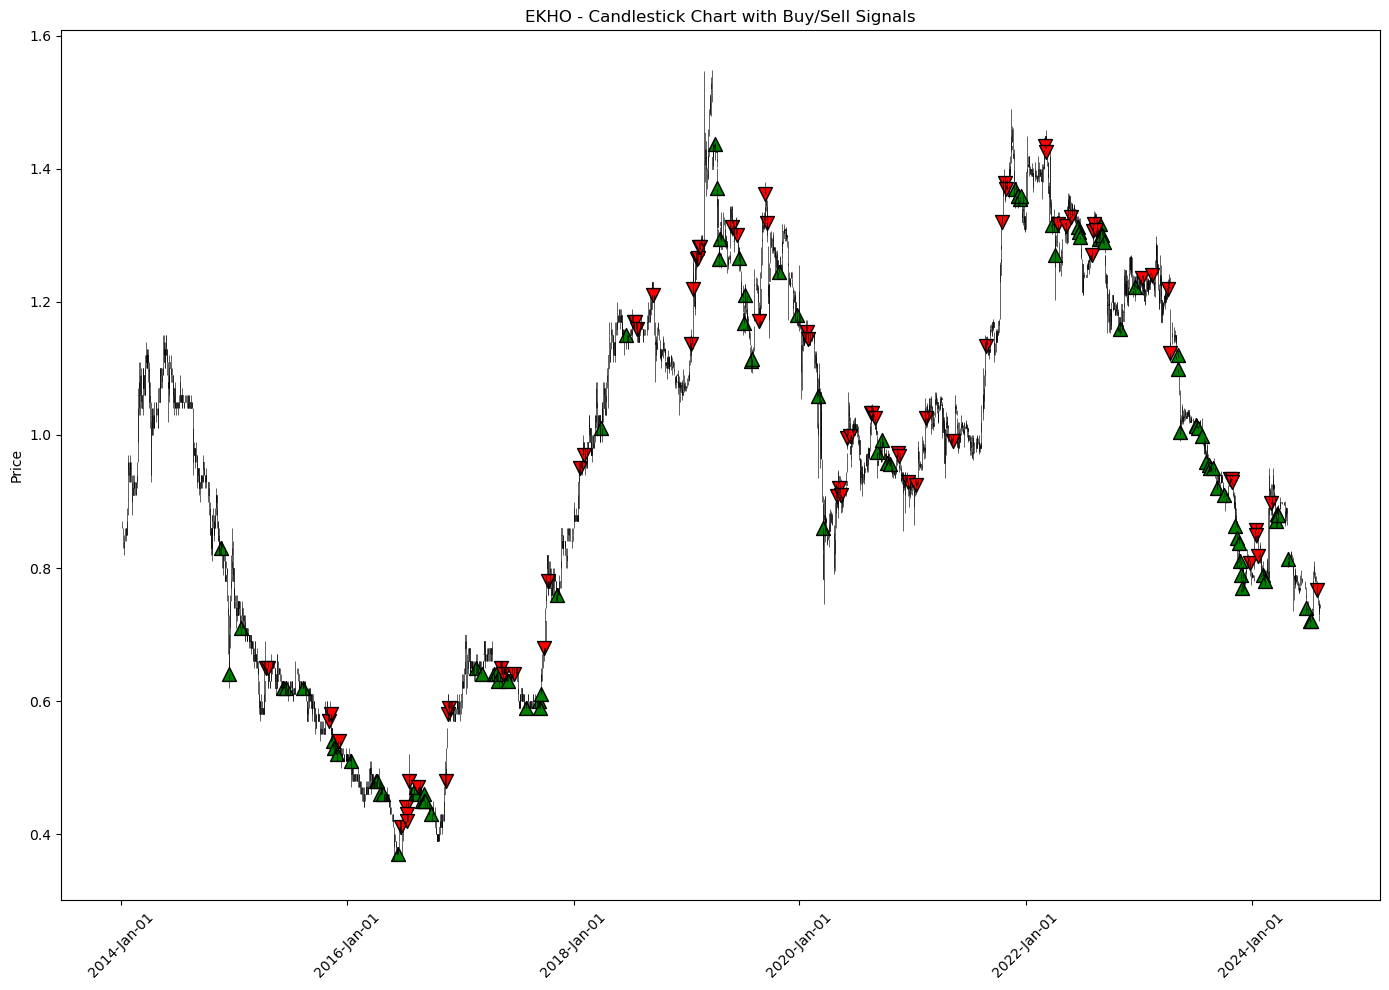

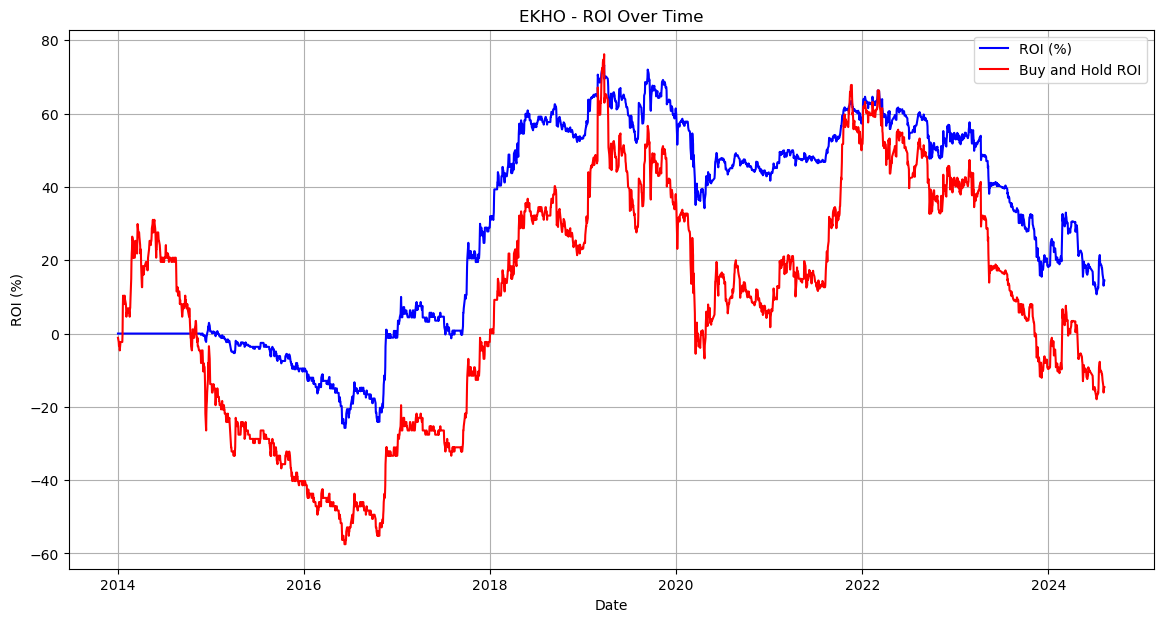

EKHO - Final ROI: 14.47%
EKHO - Buy and Hold ROI: -14.60%


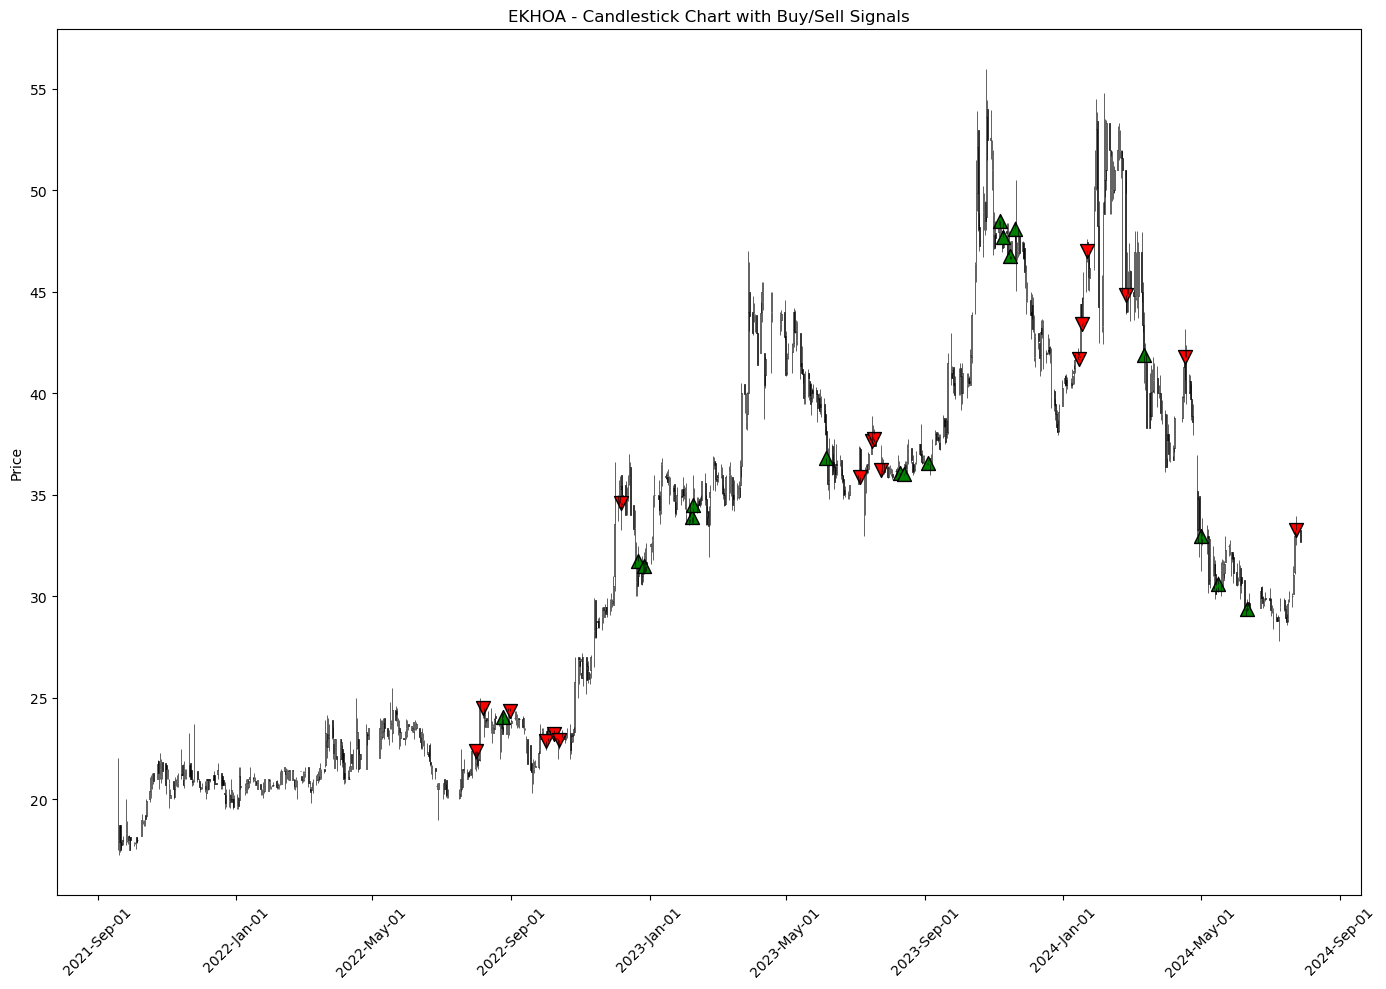

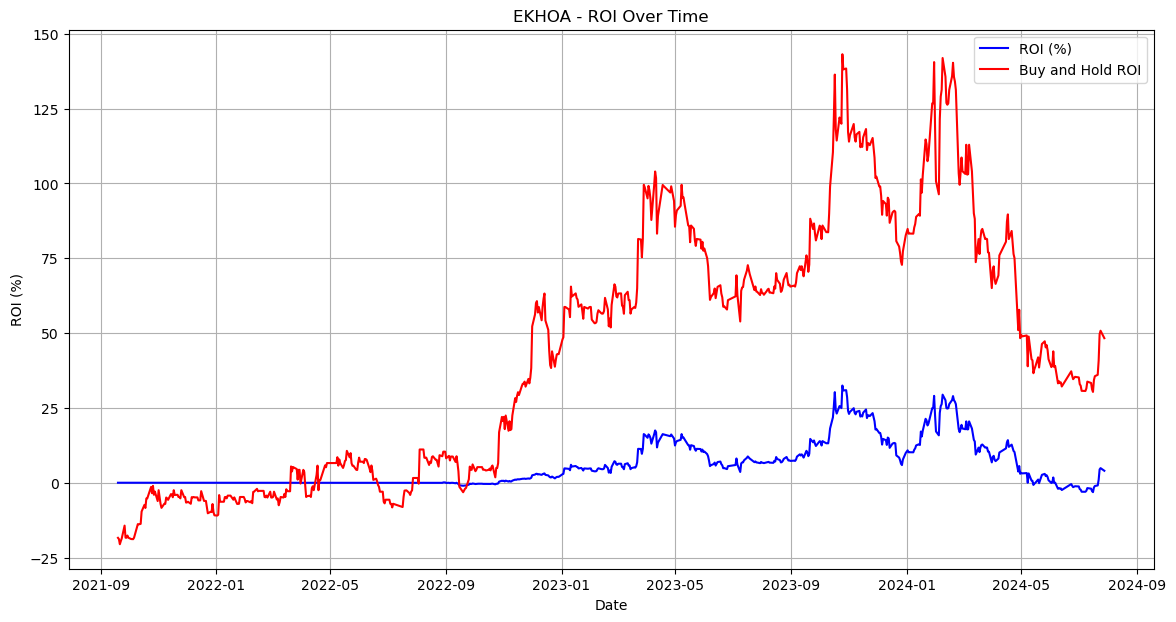

EKHOA - Final ROI: 4.00%
EKHOA - Buy and Hold ROI: 48.30%


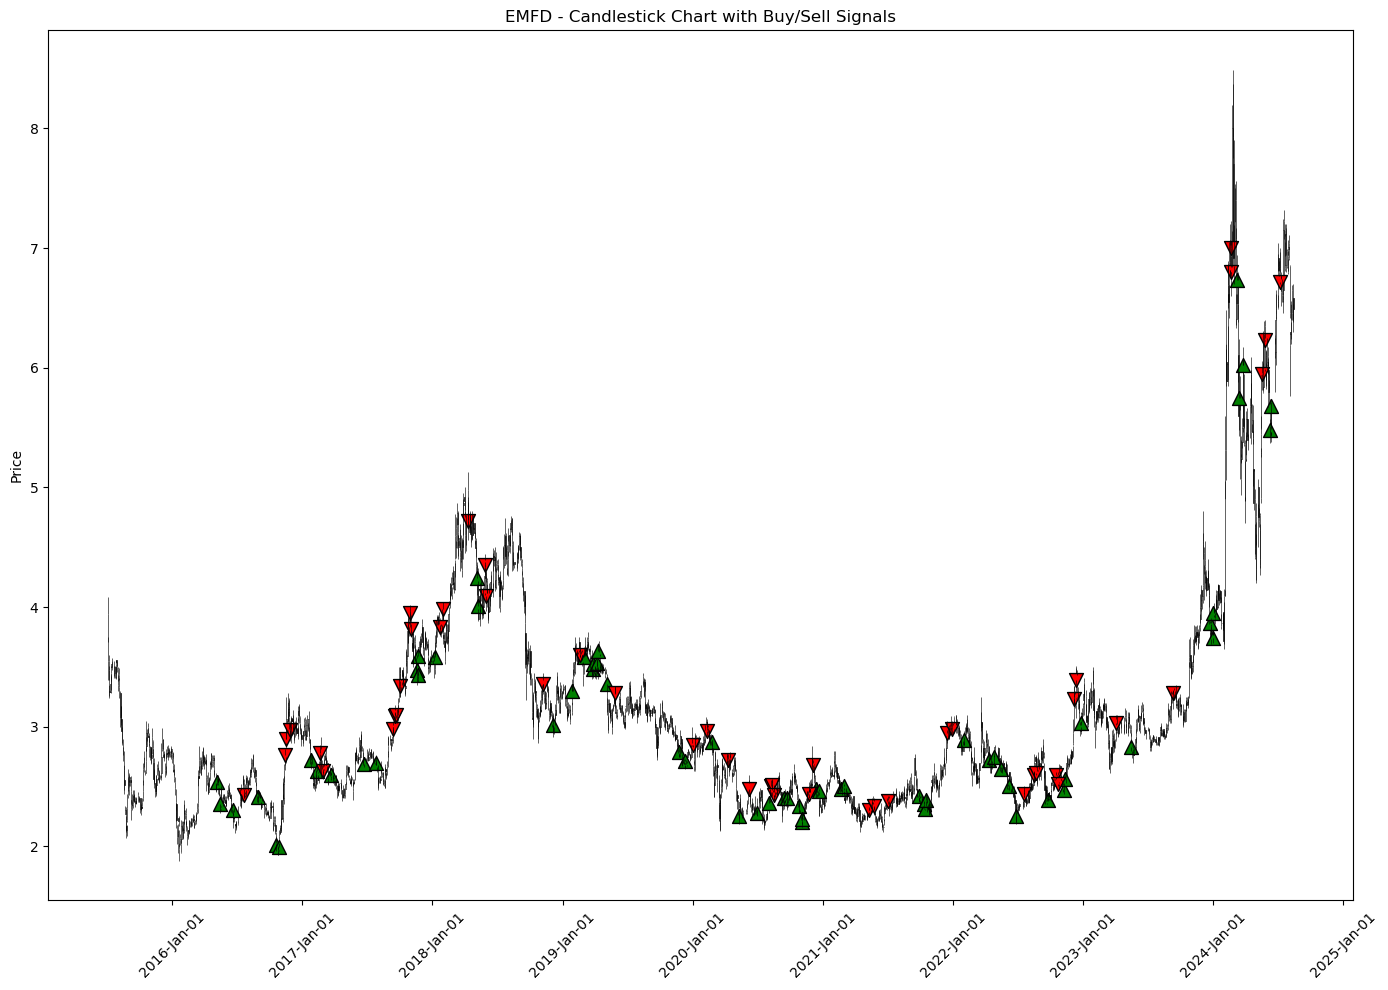

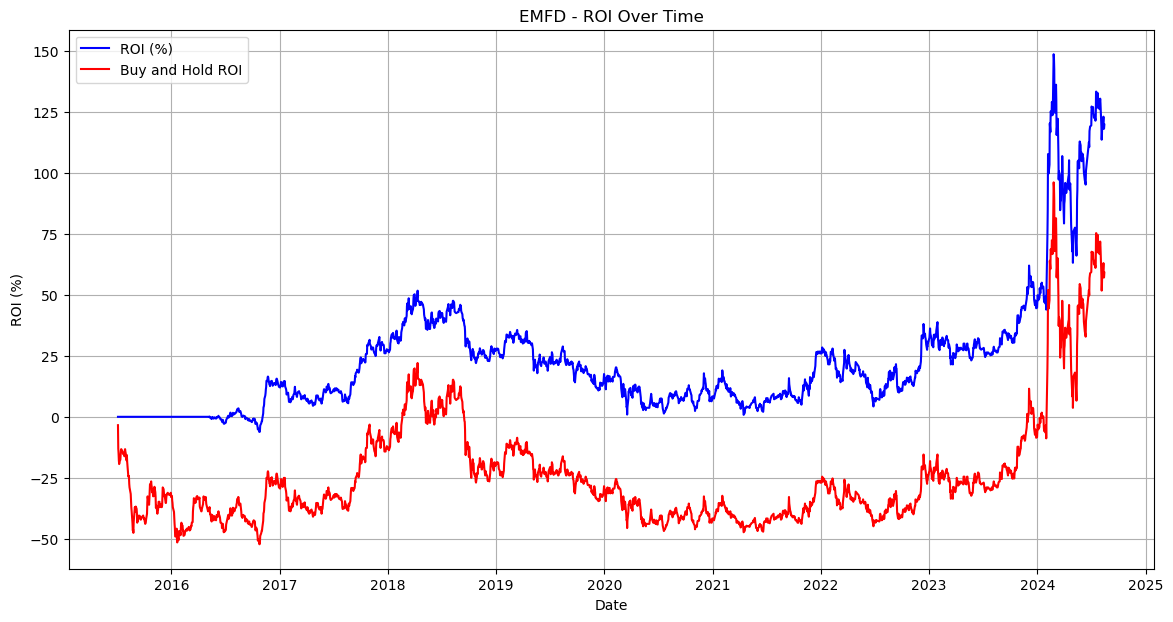

EMFD - Final ROI: 119.71%
EMFD - Buy and Hold ROI: 59.07%


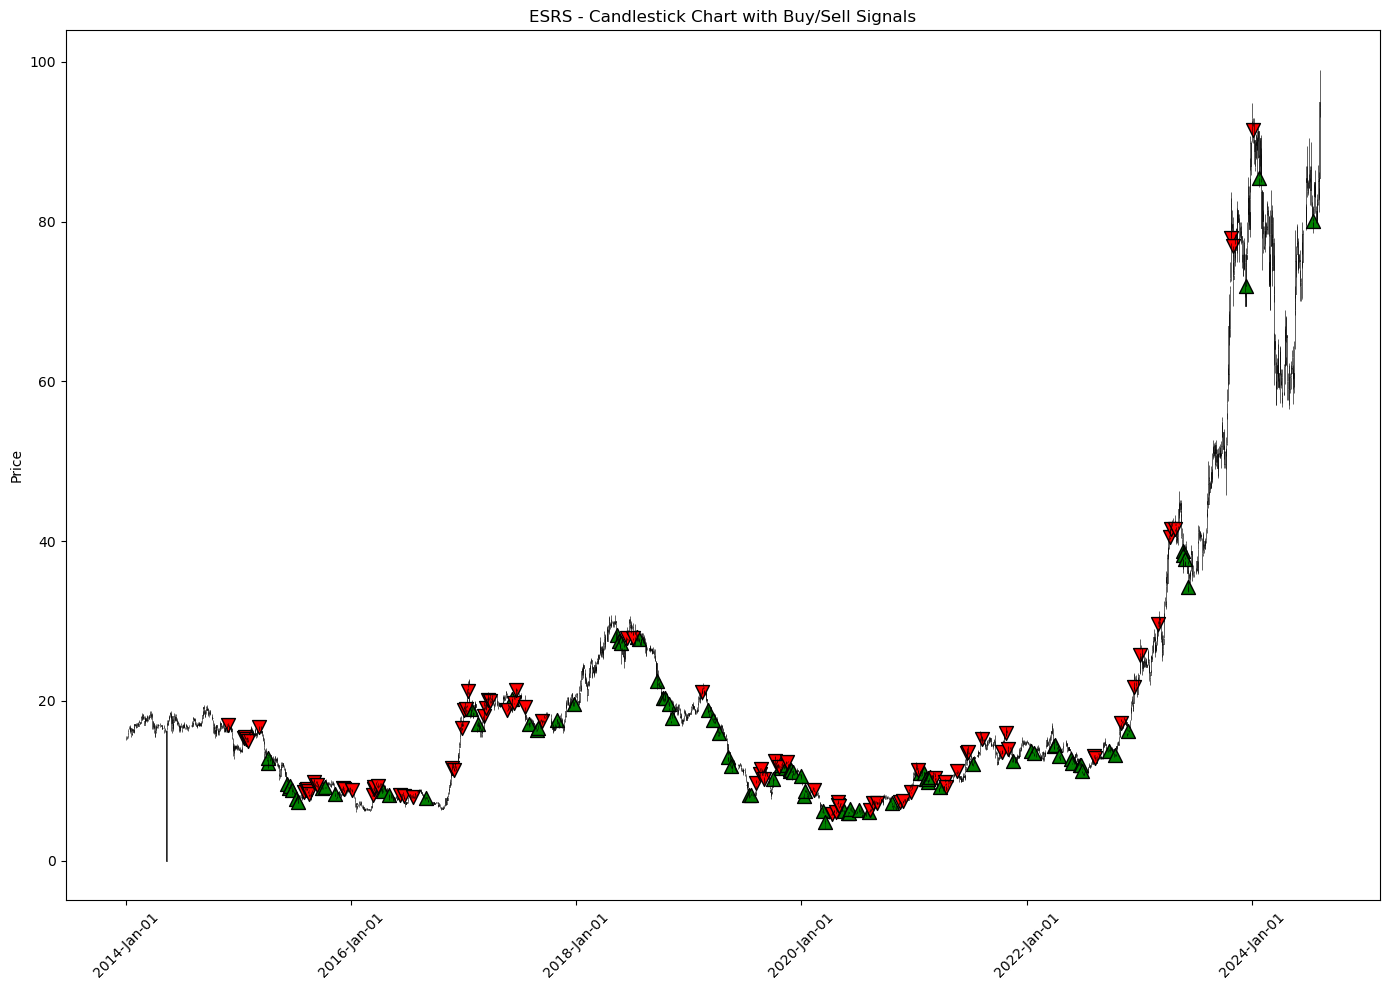

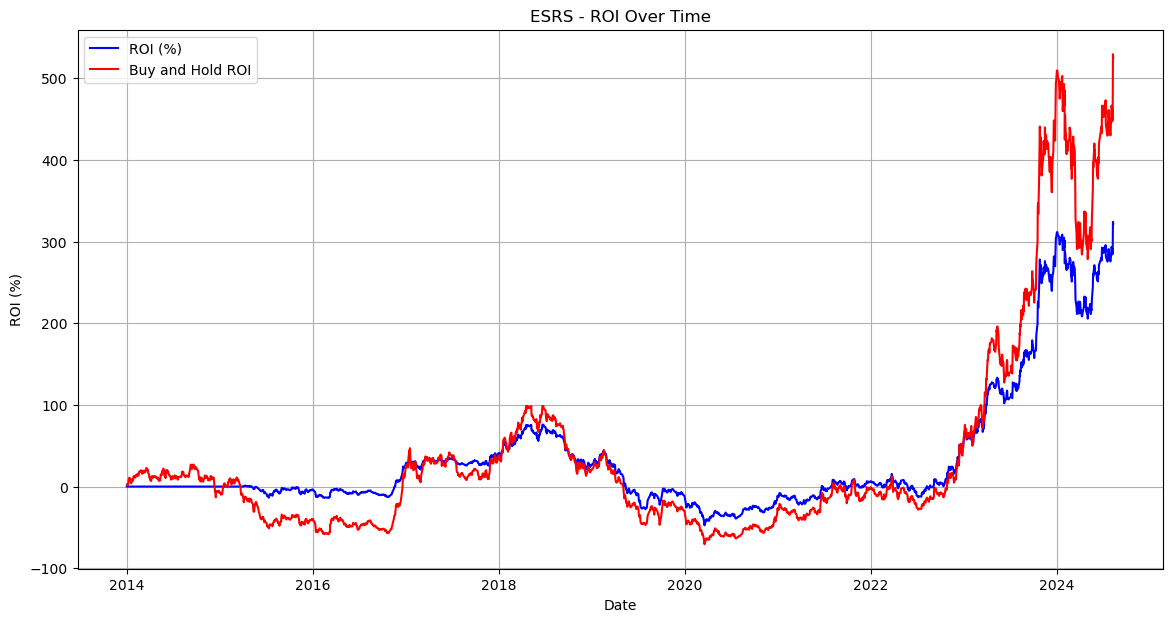

ESRS - Final ROI: 321.87%
ESRS - Buy and Hold ROI: 524.83%


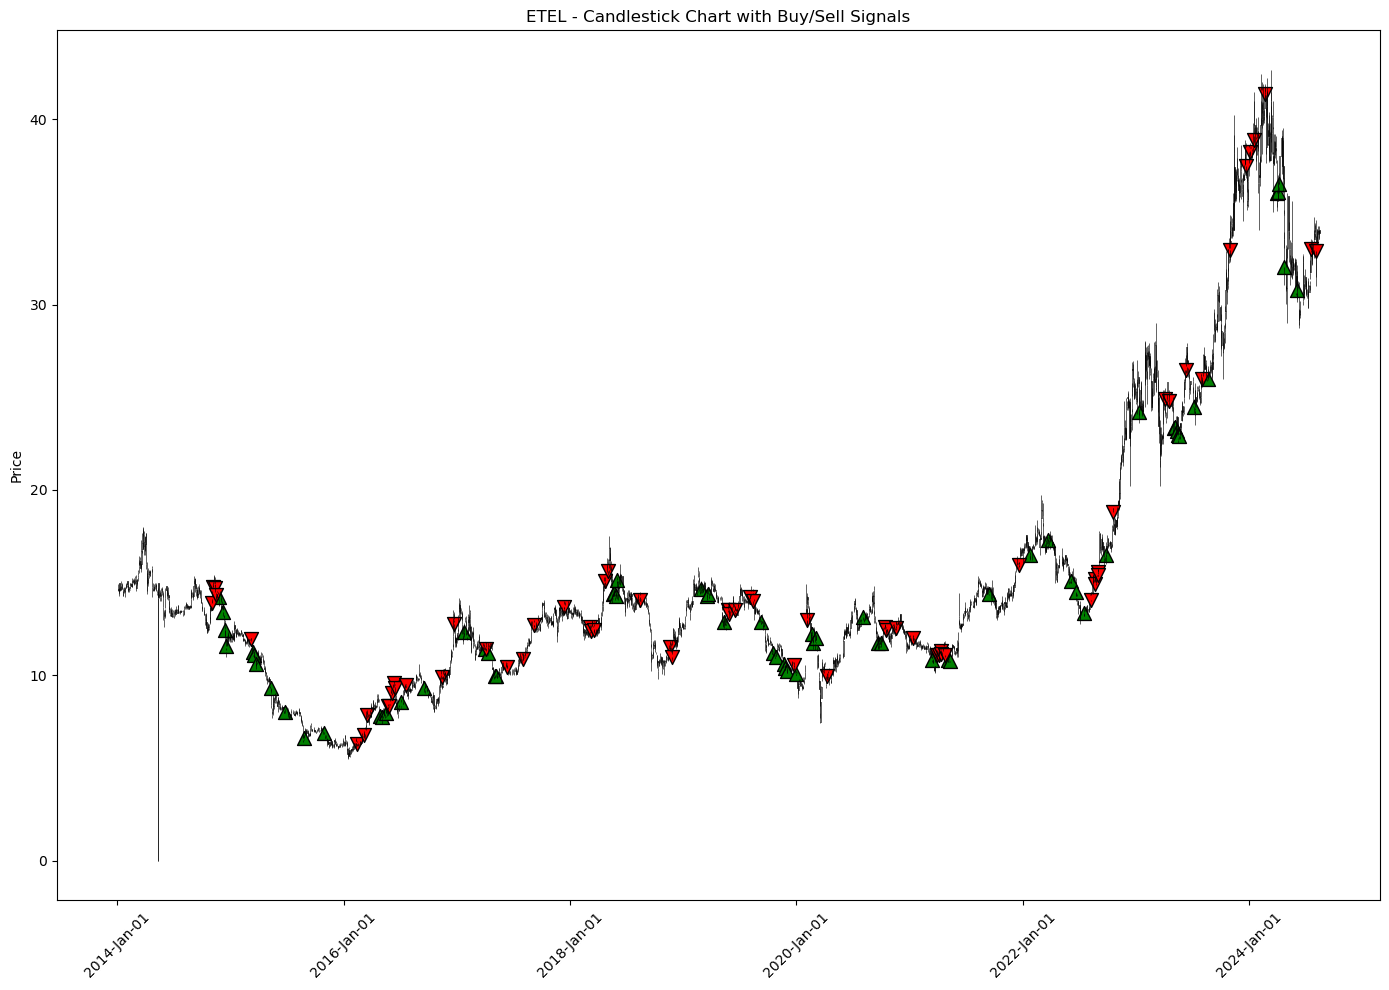

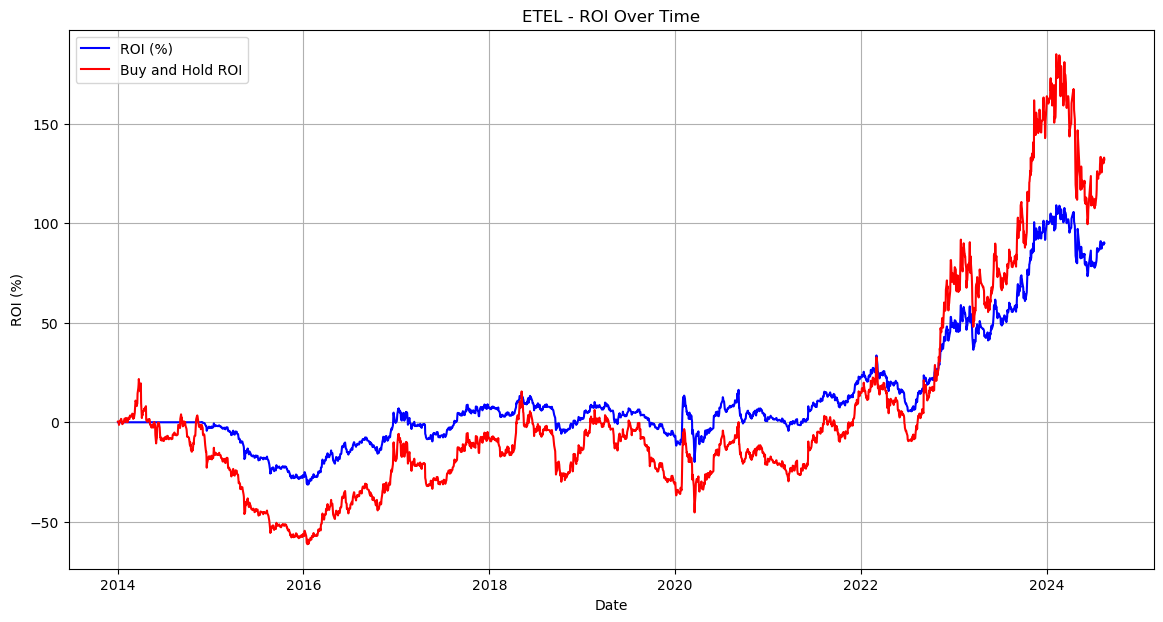

ETEL - Final ROI: 89.97%
ETEL - Buy and Hold ROI: 131.92%


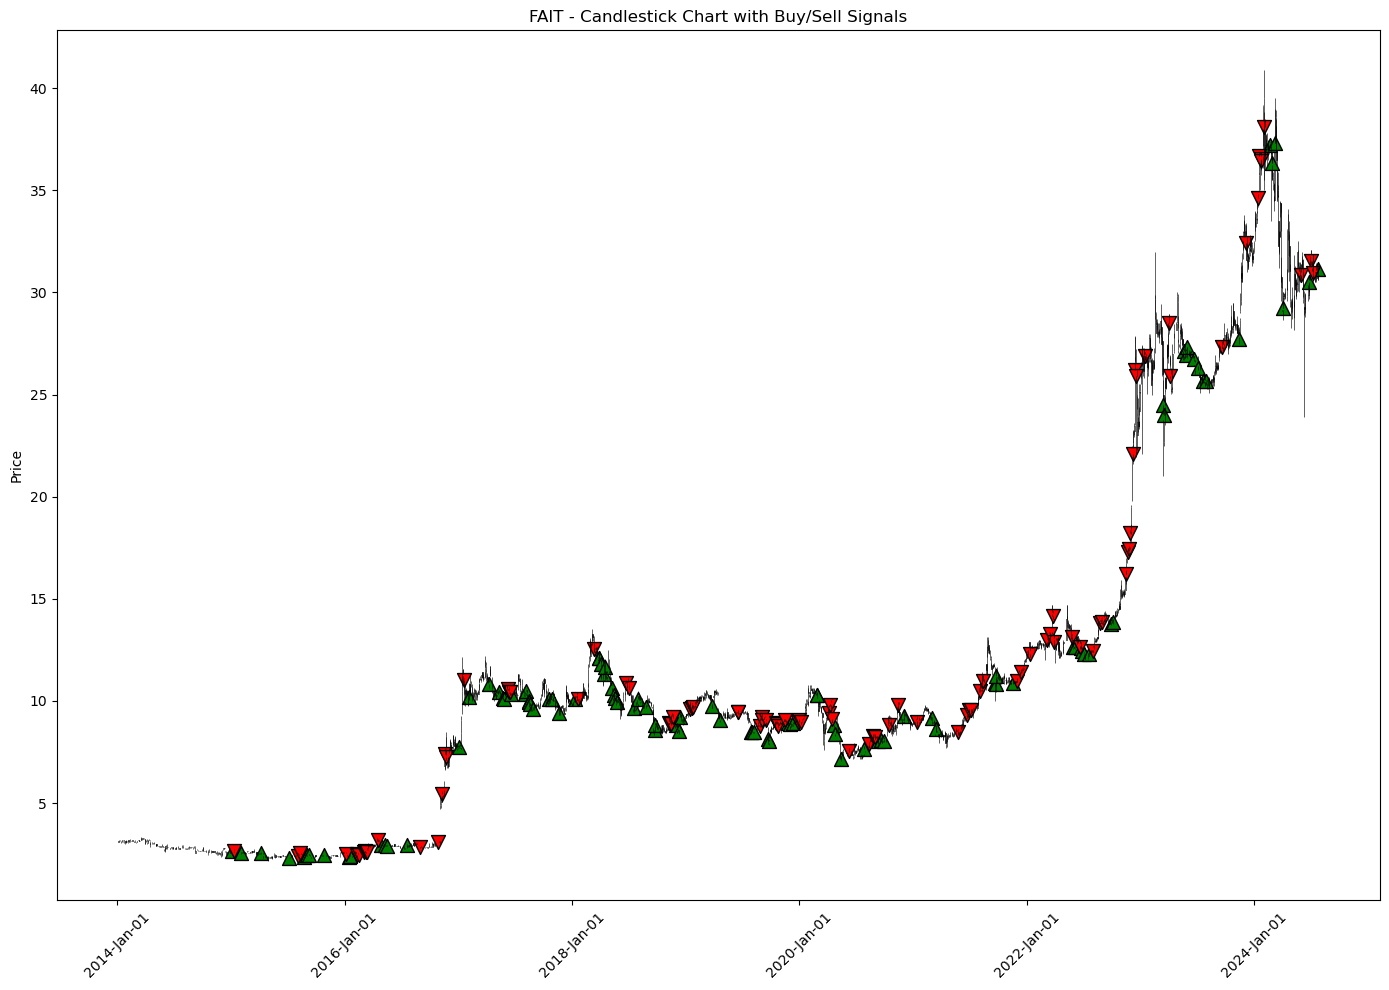

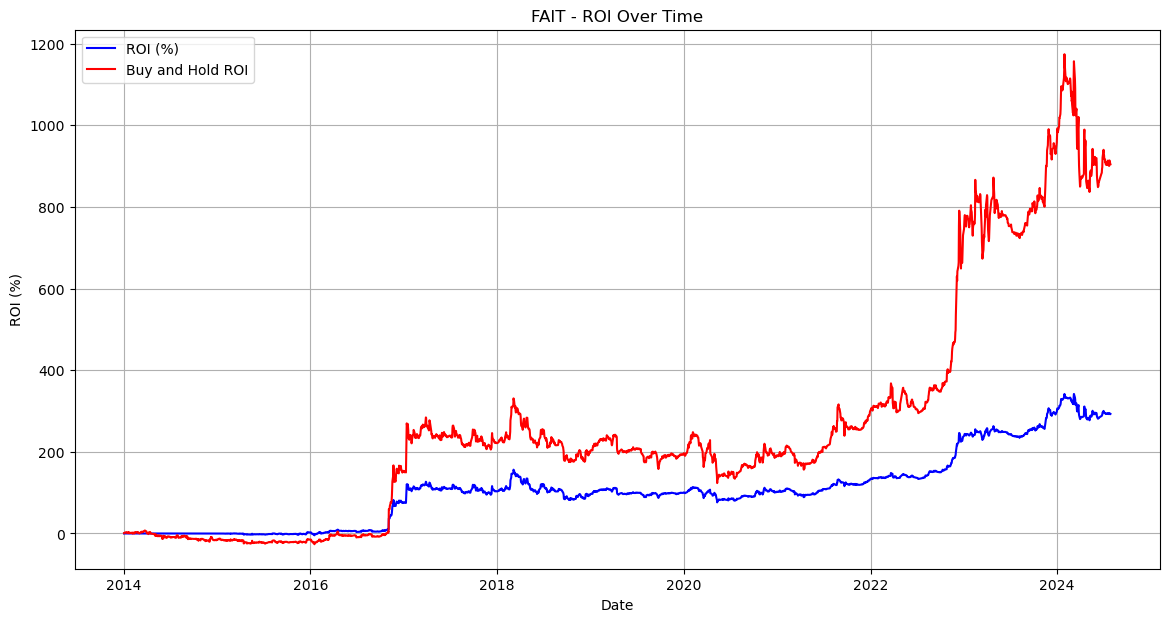

FAIT - Final ROI: 292.91%
FAIT - Buy and Hold ROI: 904.56%


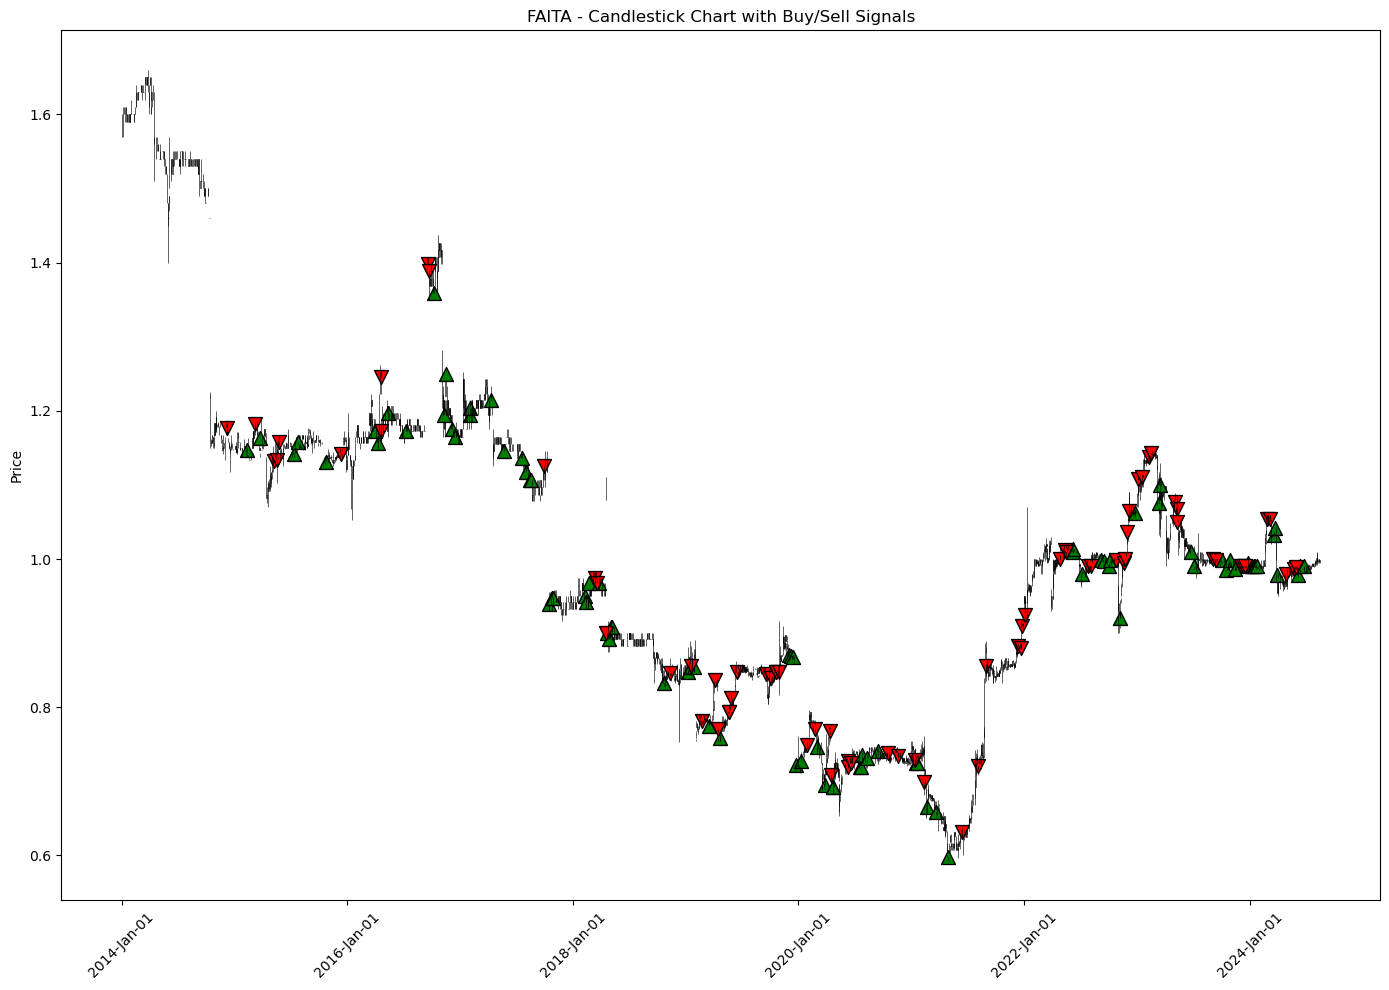

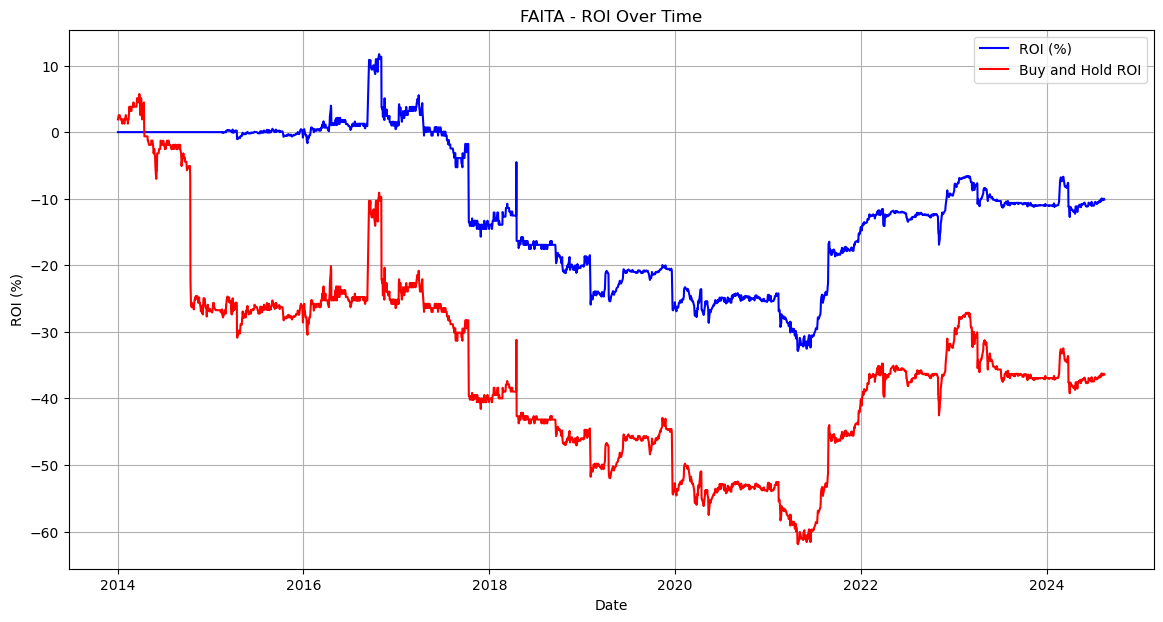

FAITA - Final ROI: -10.13%
FAITA - Buy and Hold ROI: -36.43%


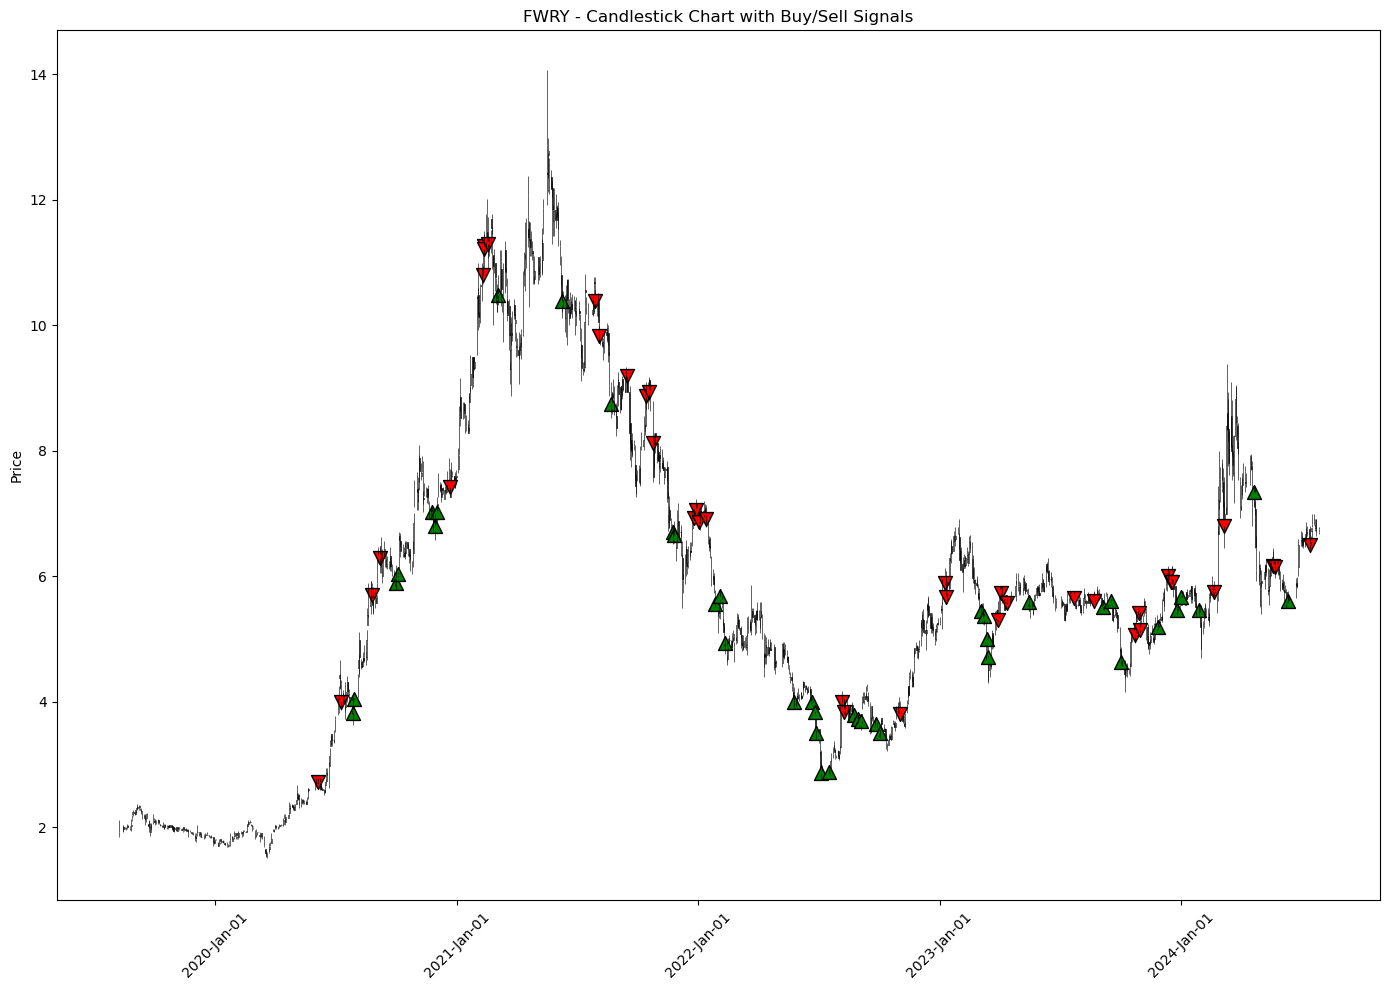

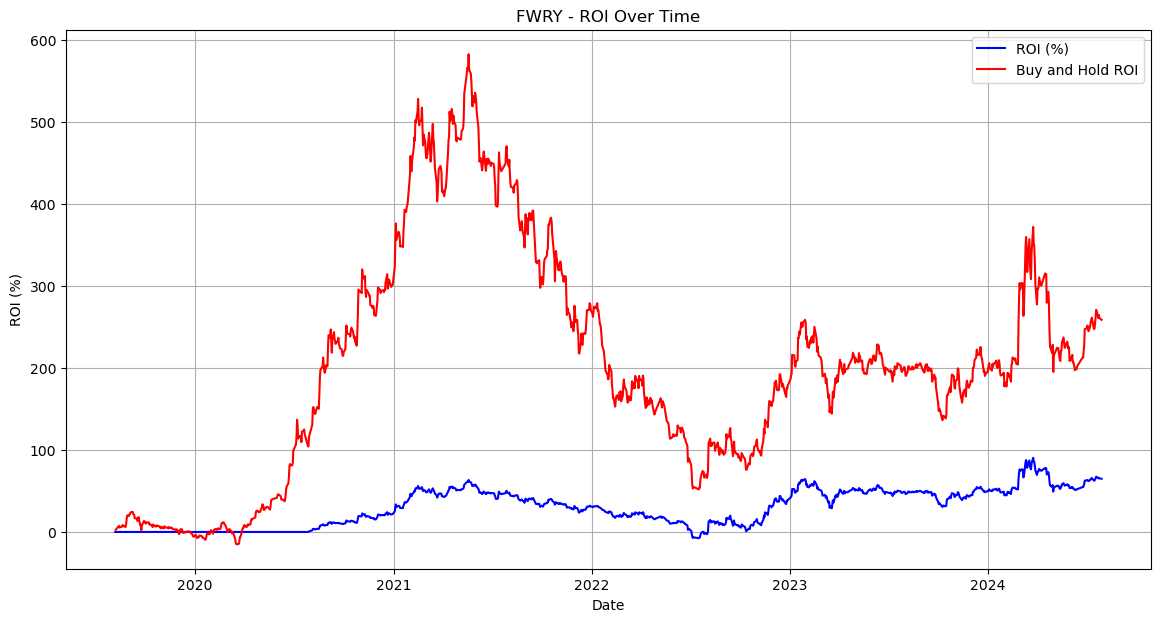

FWRY - Final ROI: 64.92%
FWRY - Buy and Hold ROI: 258.82%


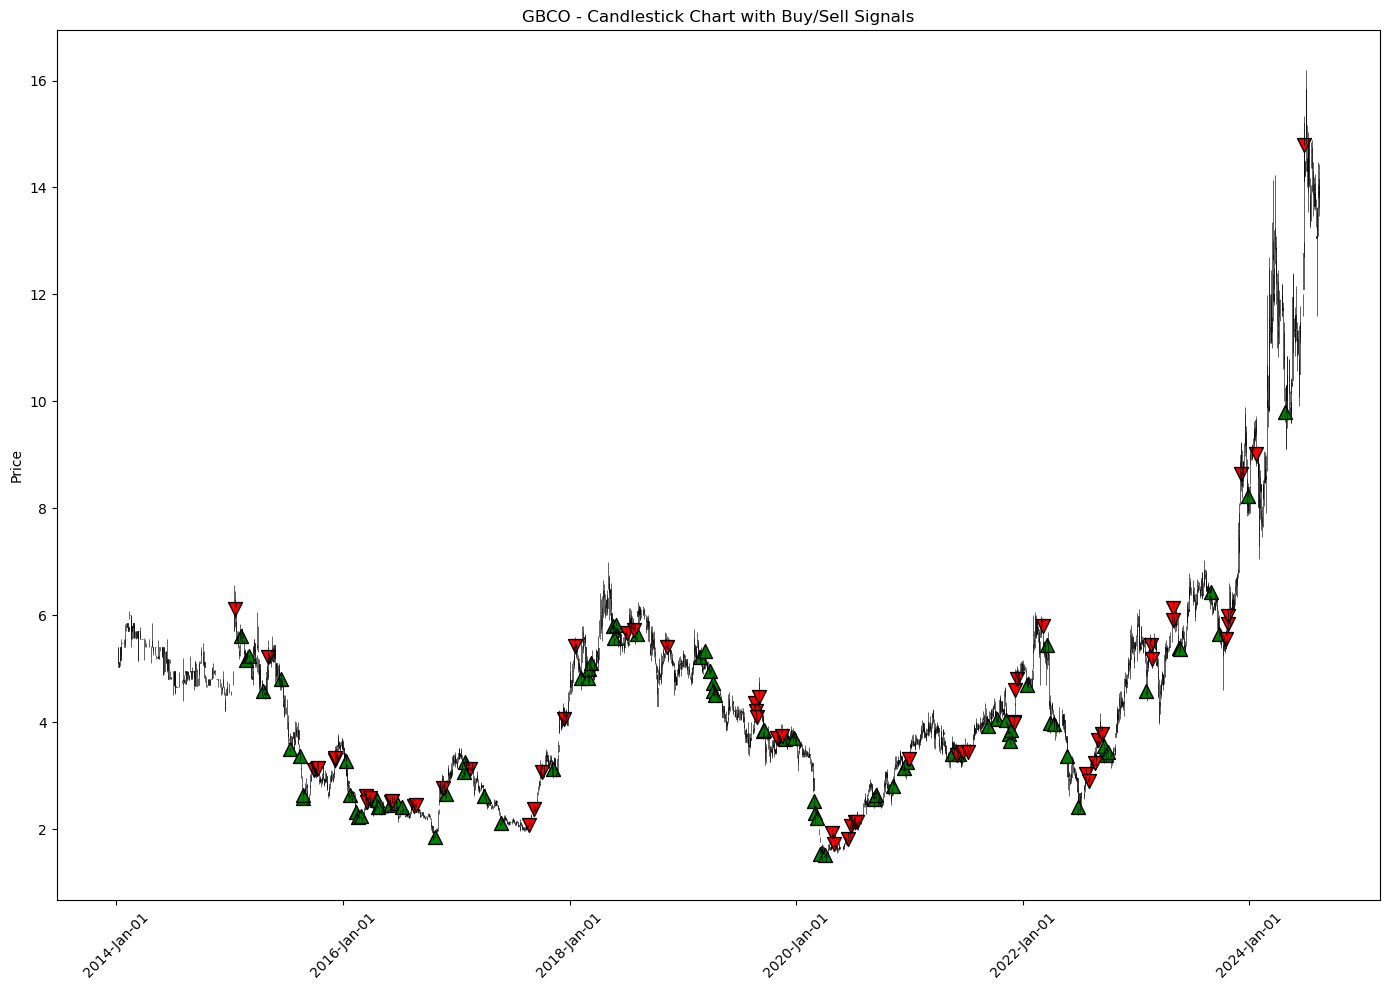

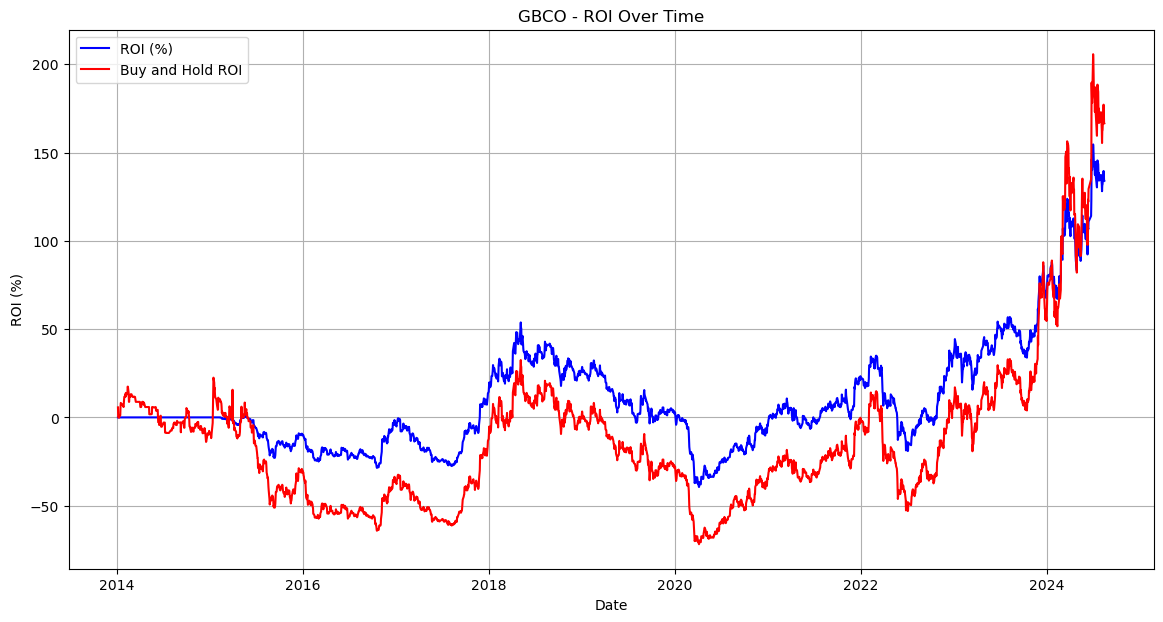

GBCO - Final ROI: 133.98%
GBCO - Buy and Hold ROI: 166.54%


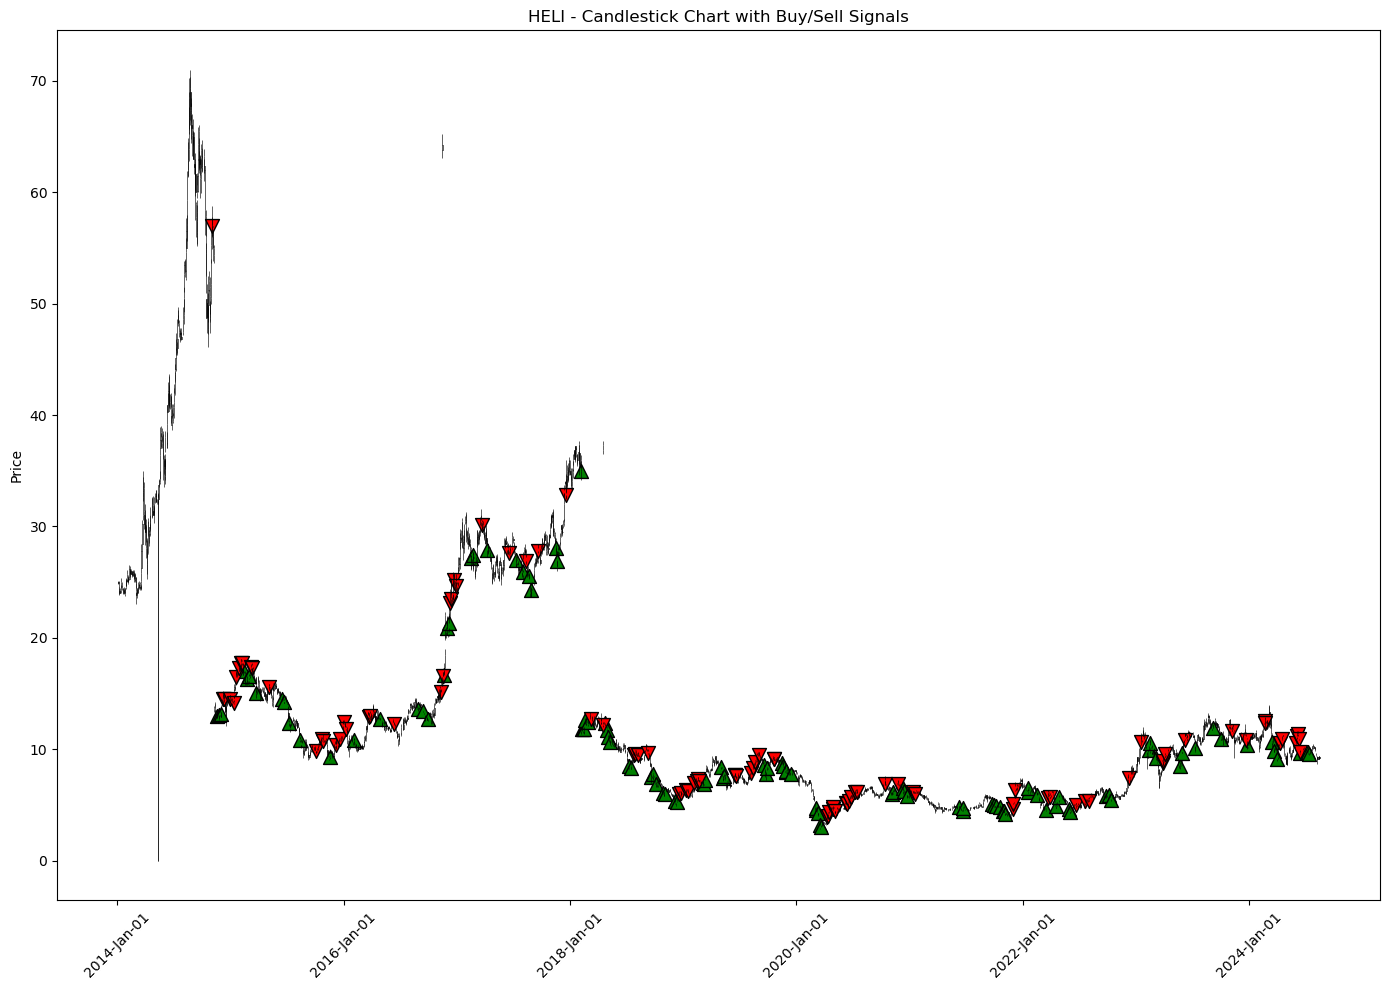

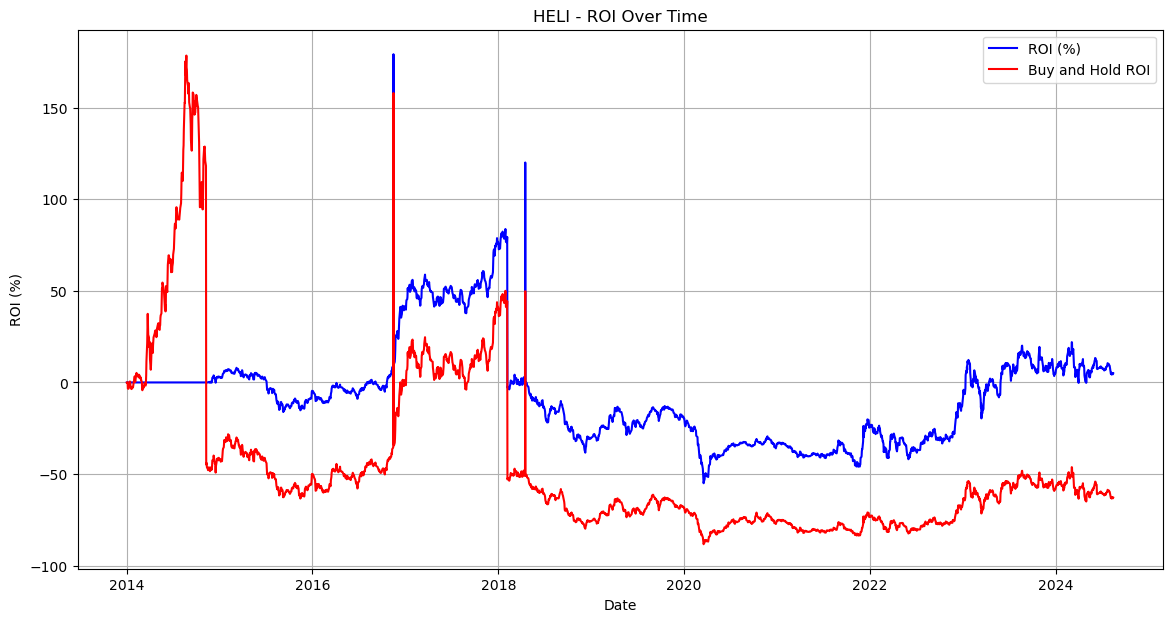

HELI - Final ROI: 4.96%
HELI - Buy and Hold ROI: -62.89%


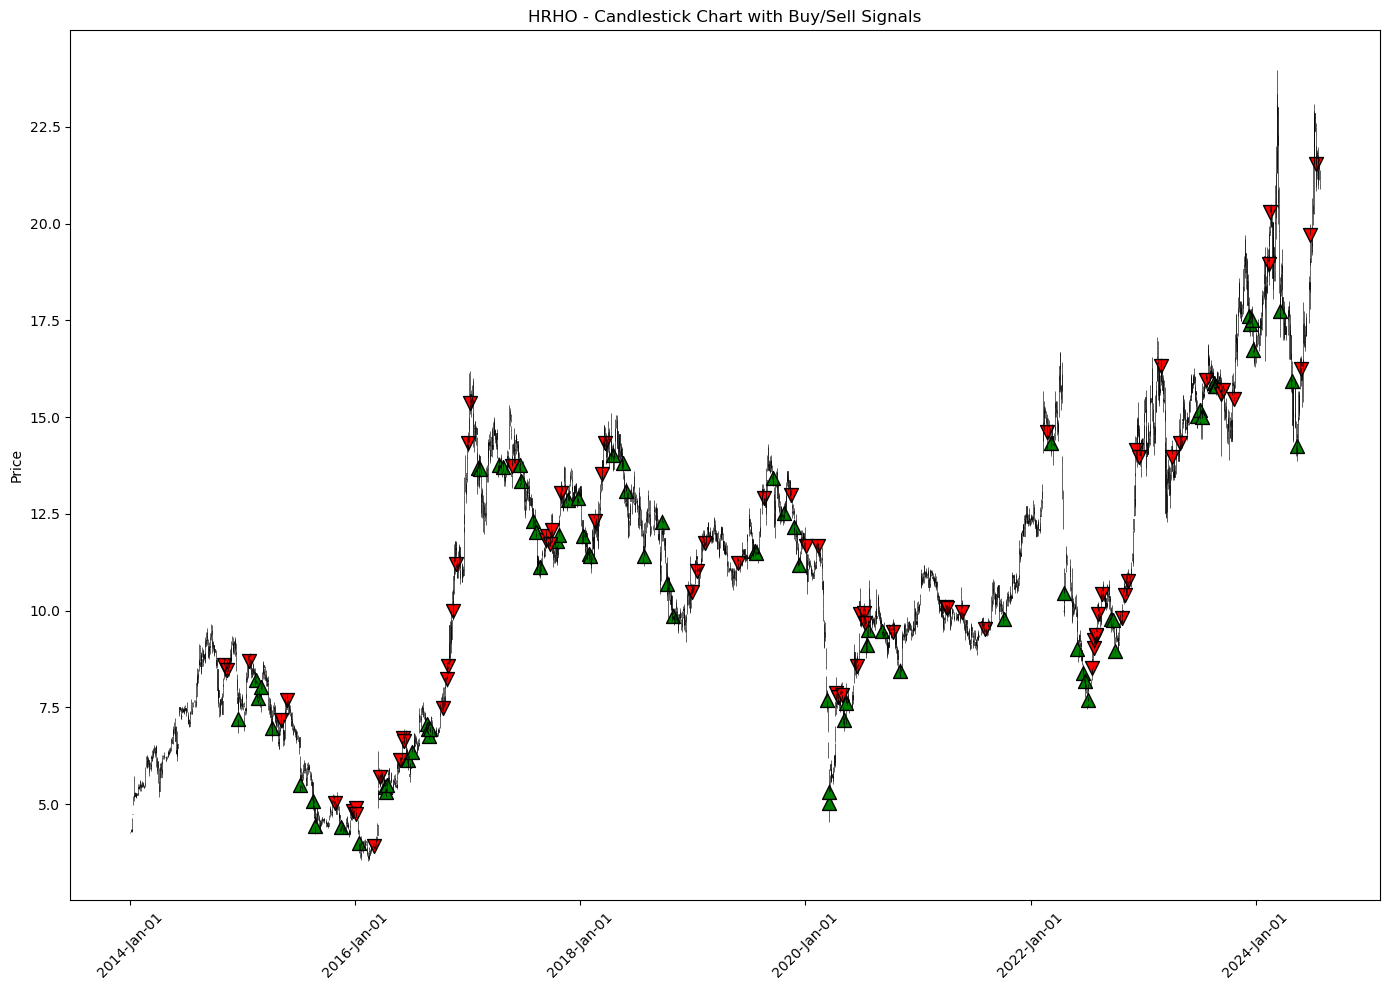

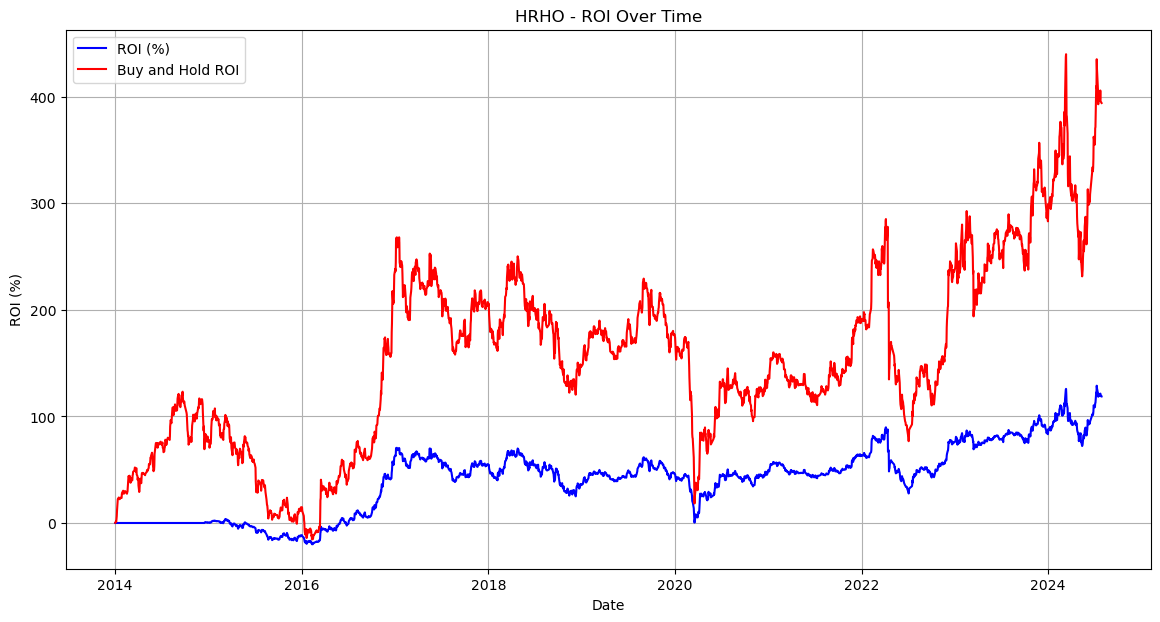

HRHO - Final ROI: 118.74%
HRHO - Buy and Hold ROI: 394.13%


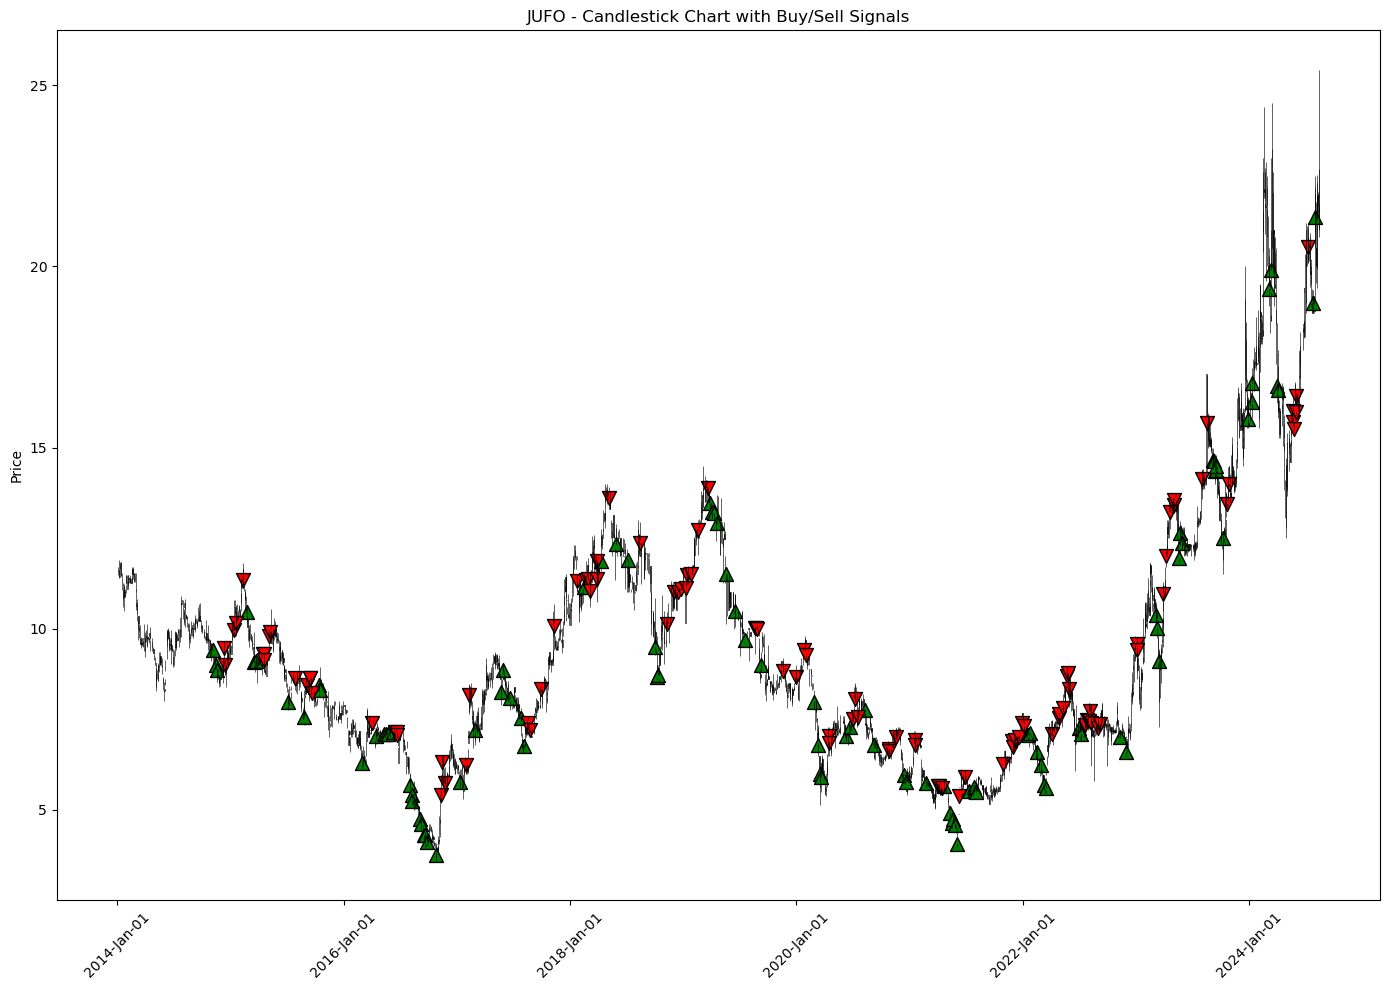

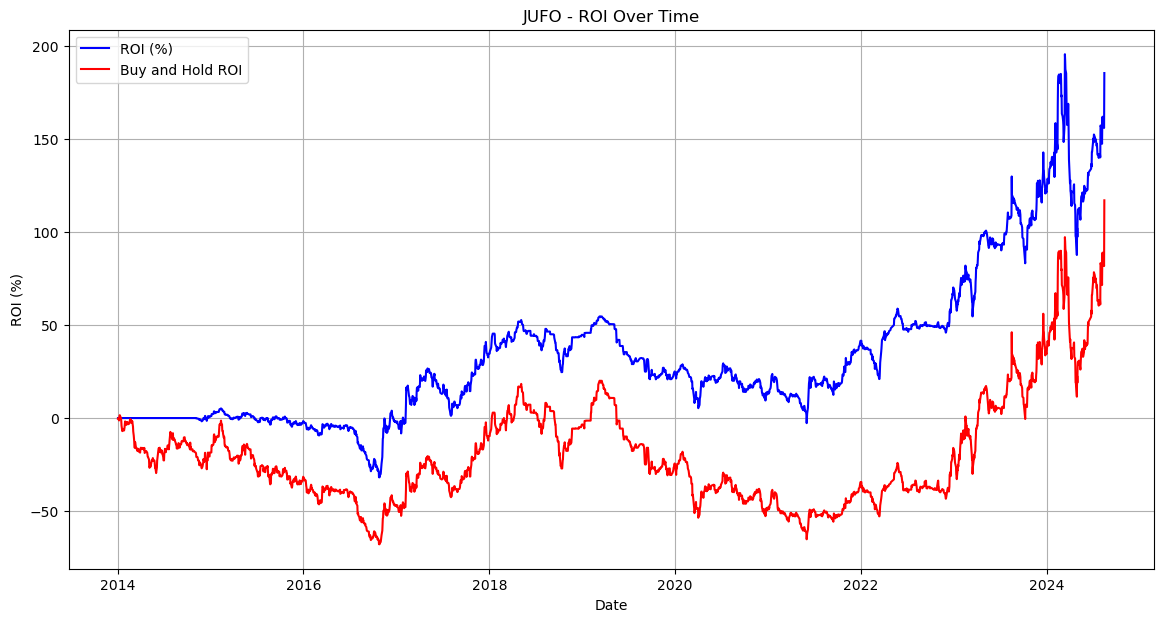

JUFO - Final ROI: 185.49%
JUFO - Buy and Hold ROI: 117.07%


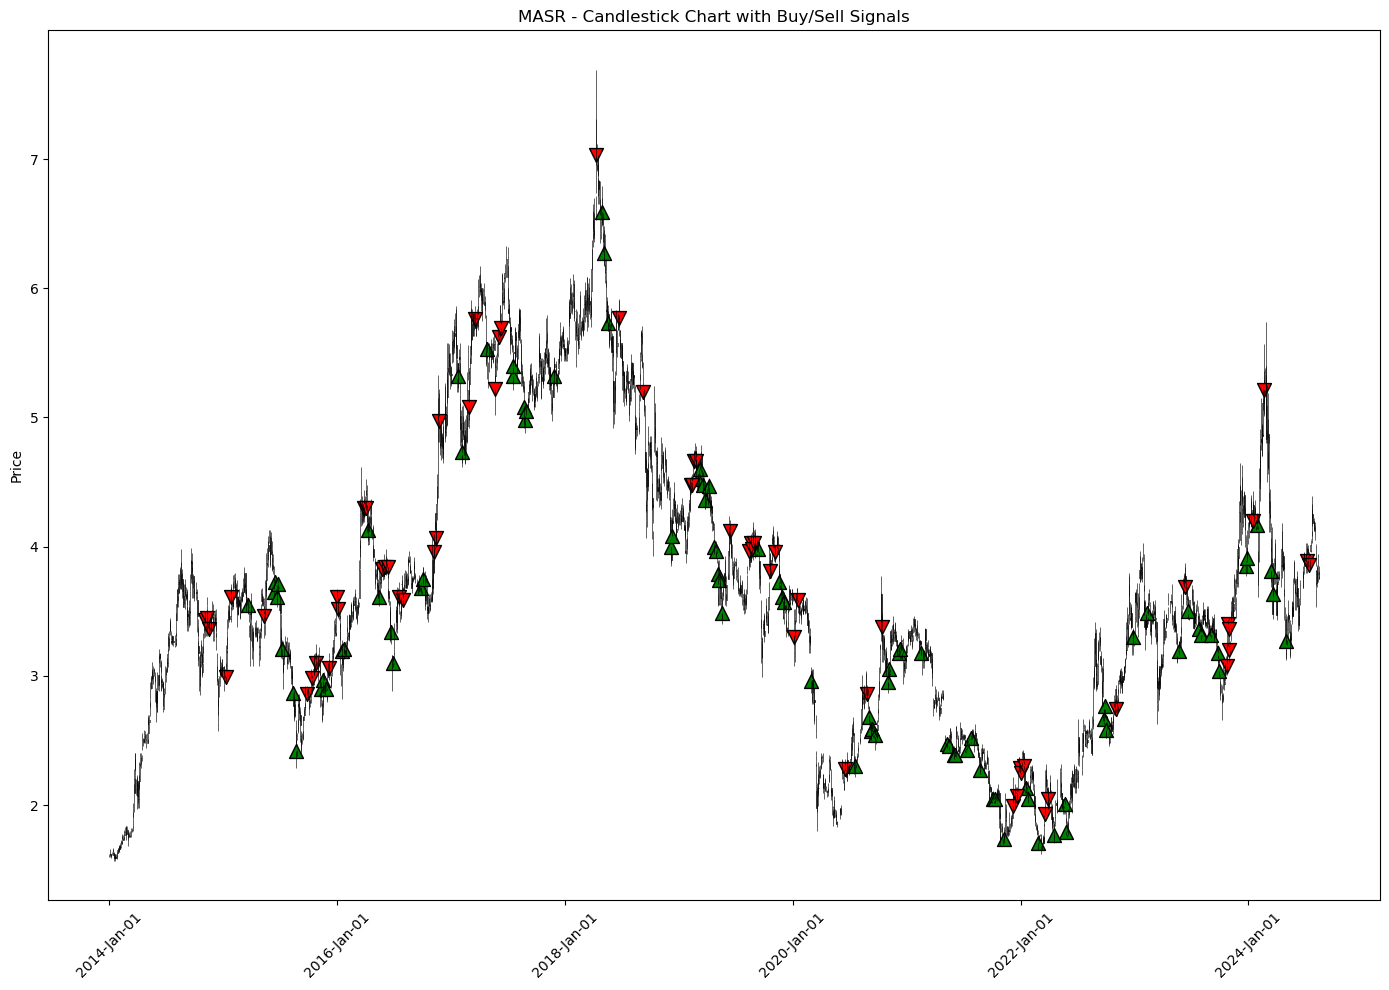

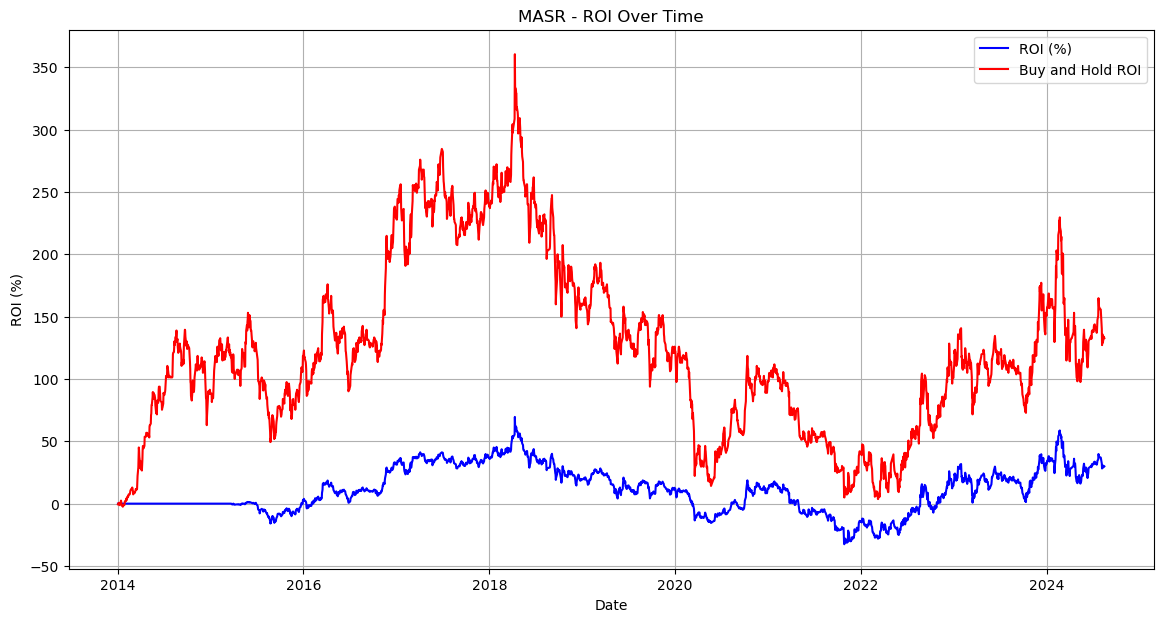

MASR - Final ROI: 29.92%
MASR - Buy and Hold ROI: 132.72%


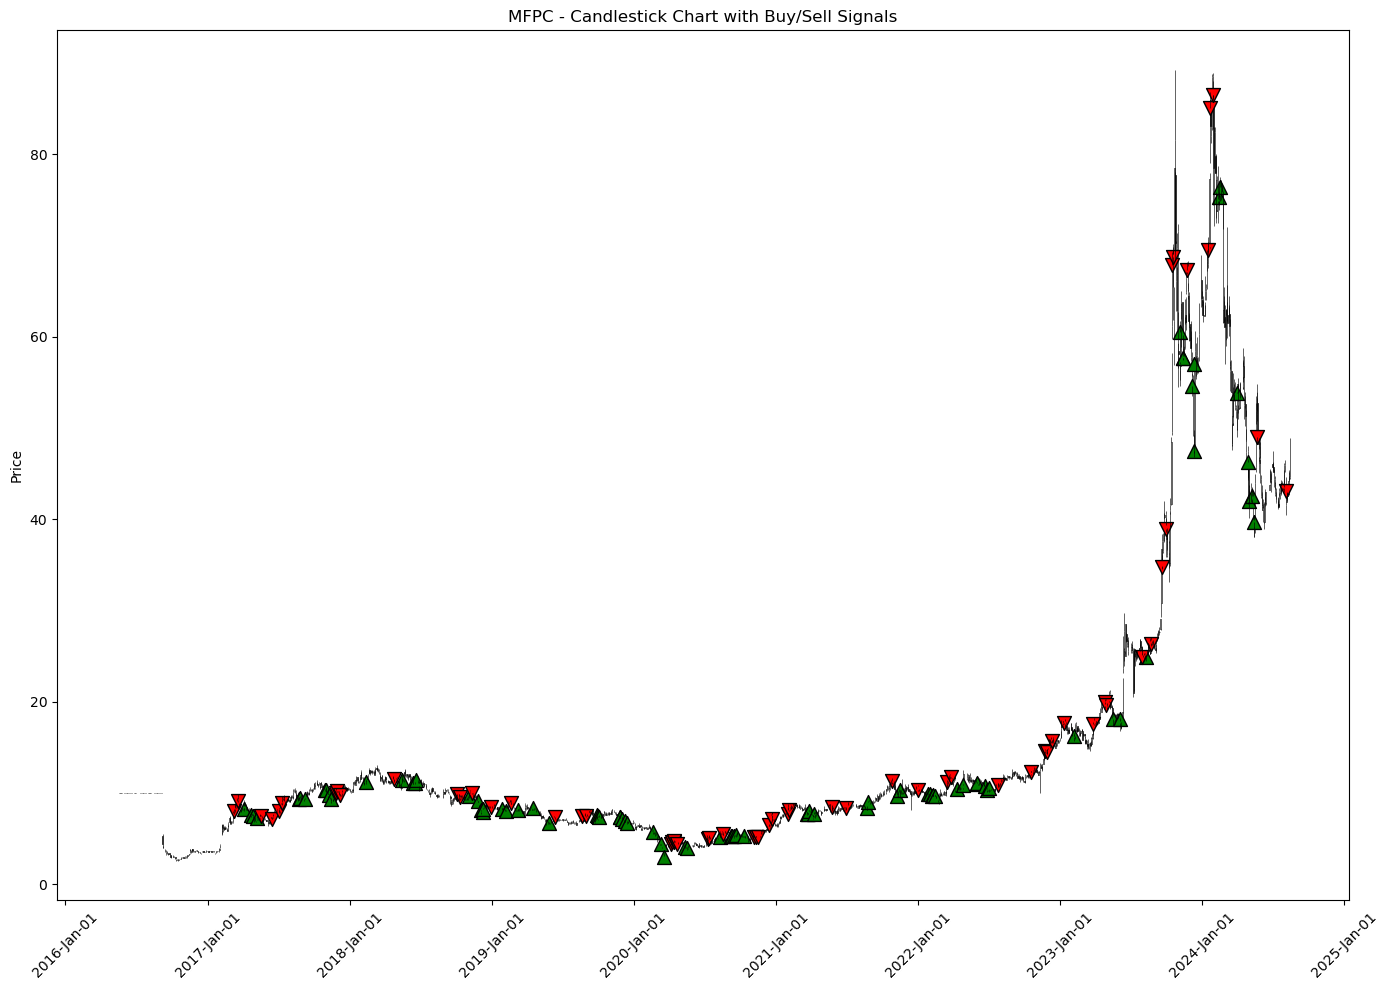

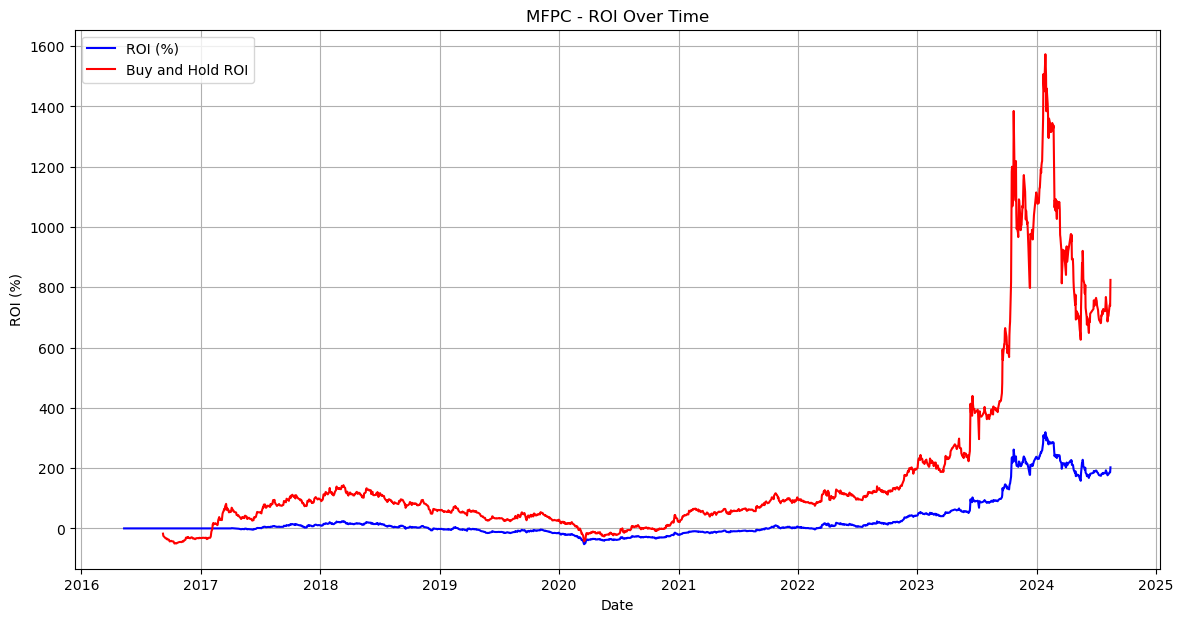

MFPC - Final ROI: 202.54%
MFPC - Buy and Hold ROI: 824.39%


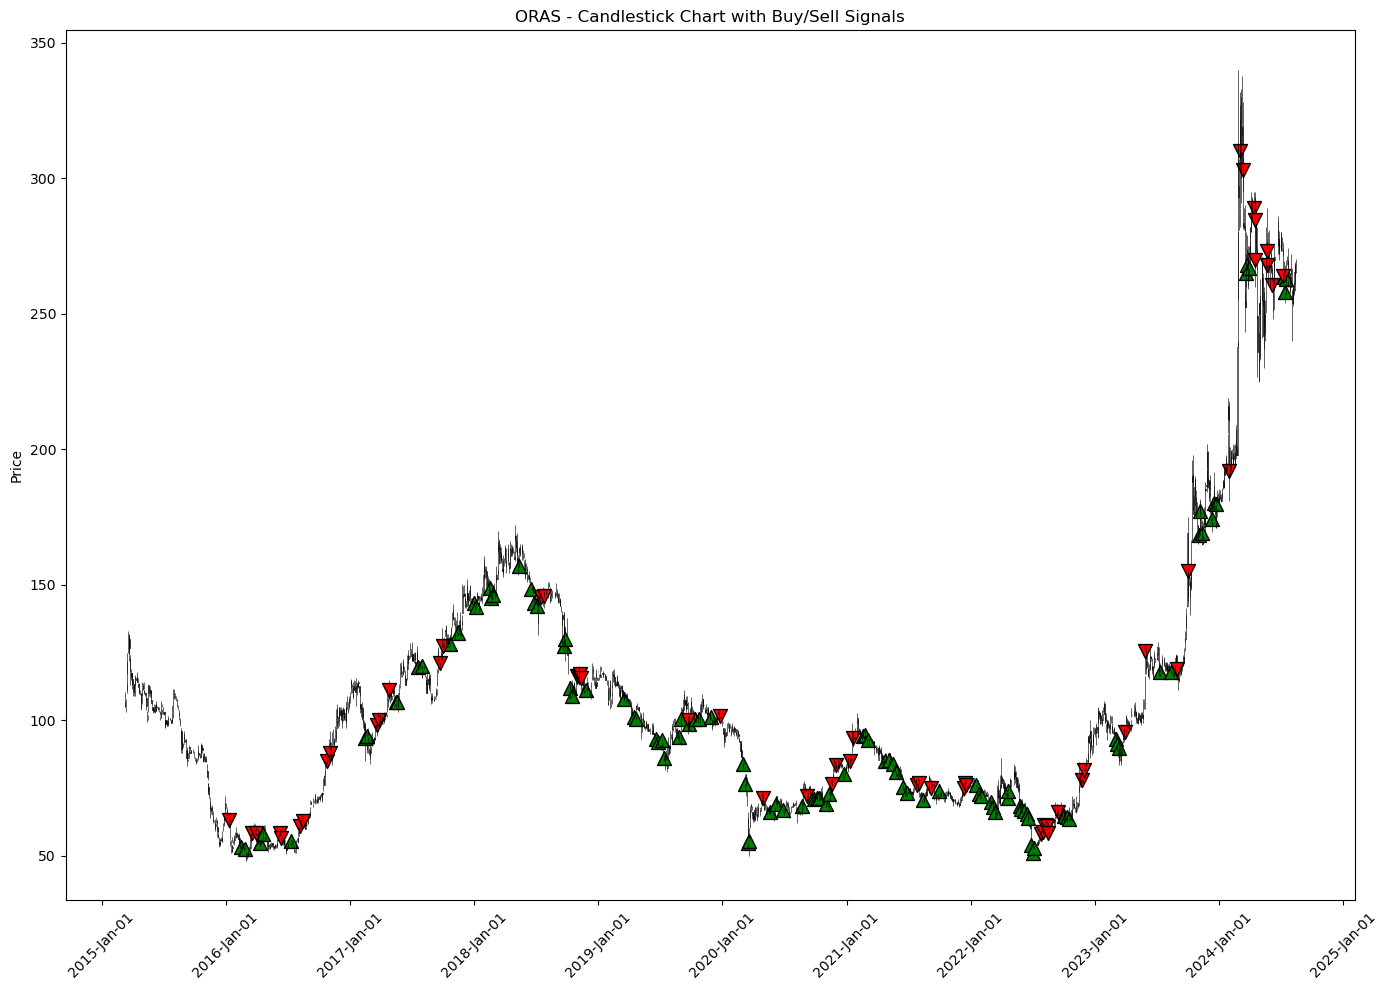

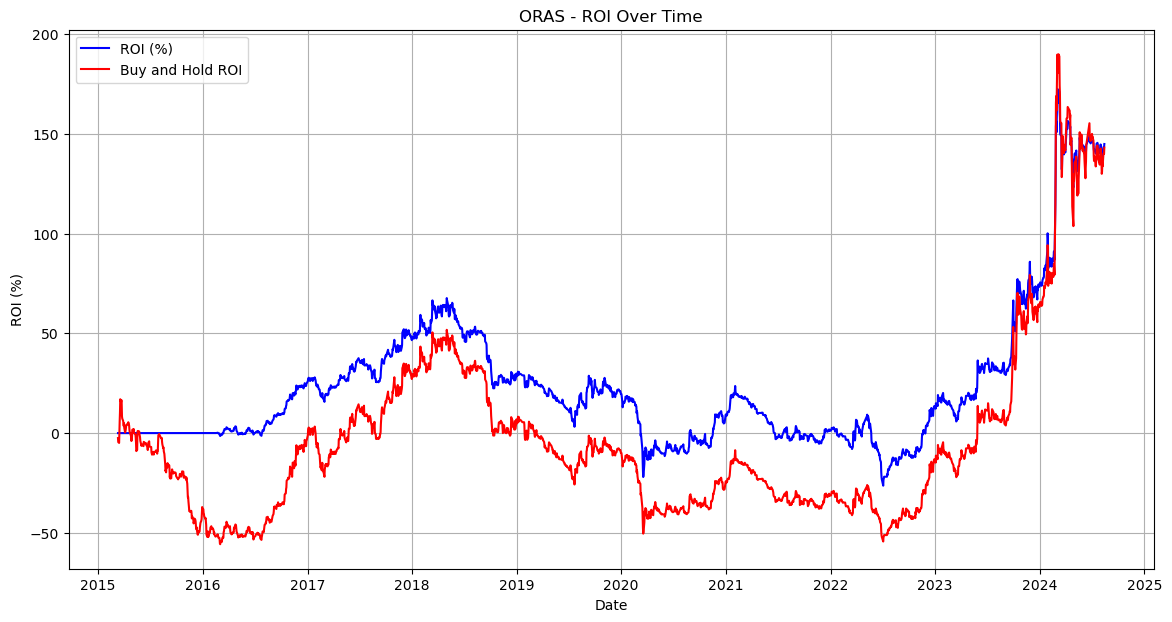

ORAS - Final ROI: 144.90%
ORAS - Buy and Hold ROI: 143.10%


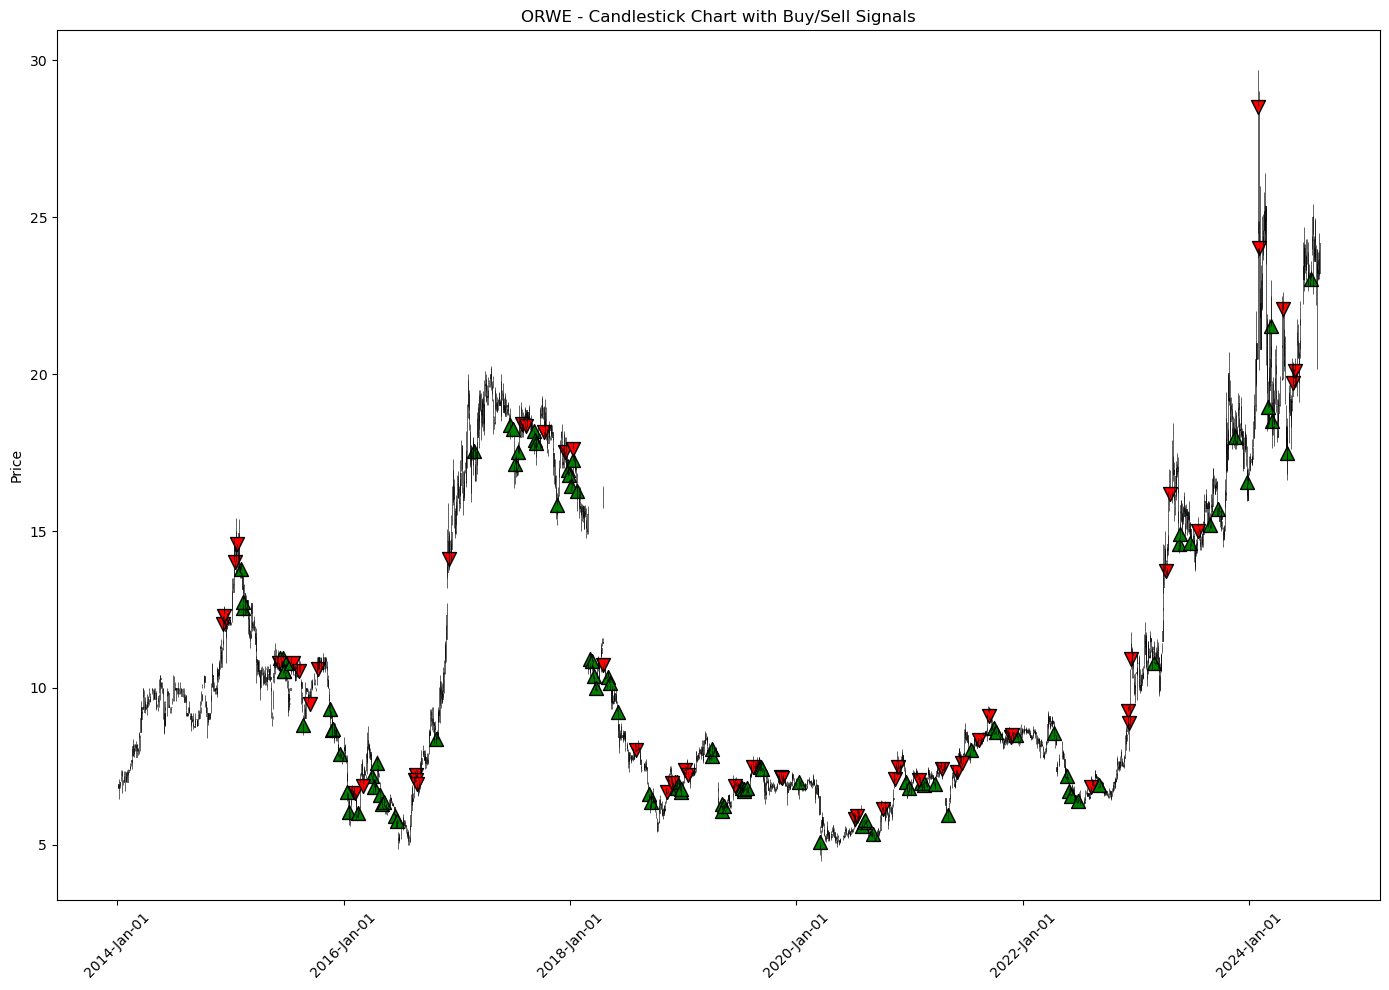

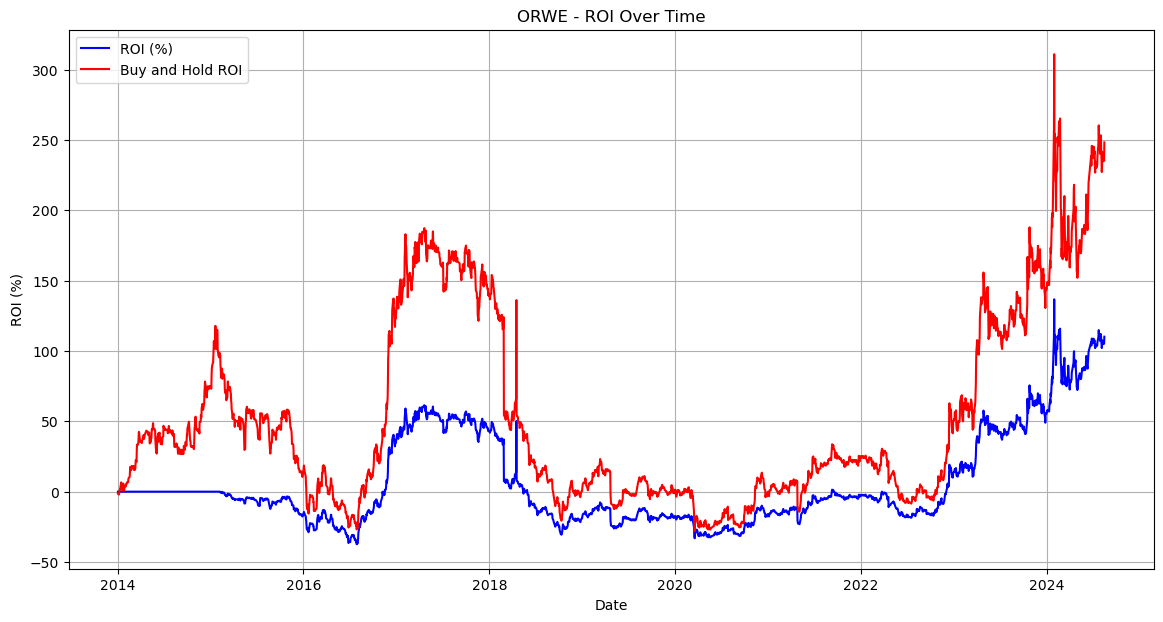

ORWE - Final ROI: 110.18%
ORWE - Buy and Hold ROI: 248.27%


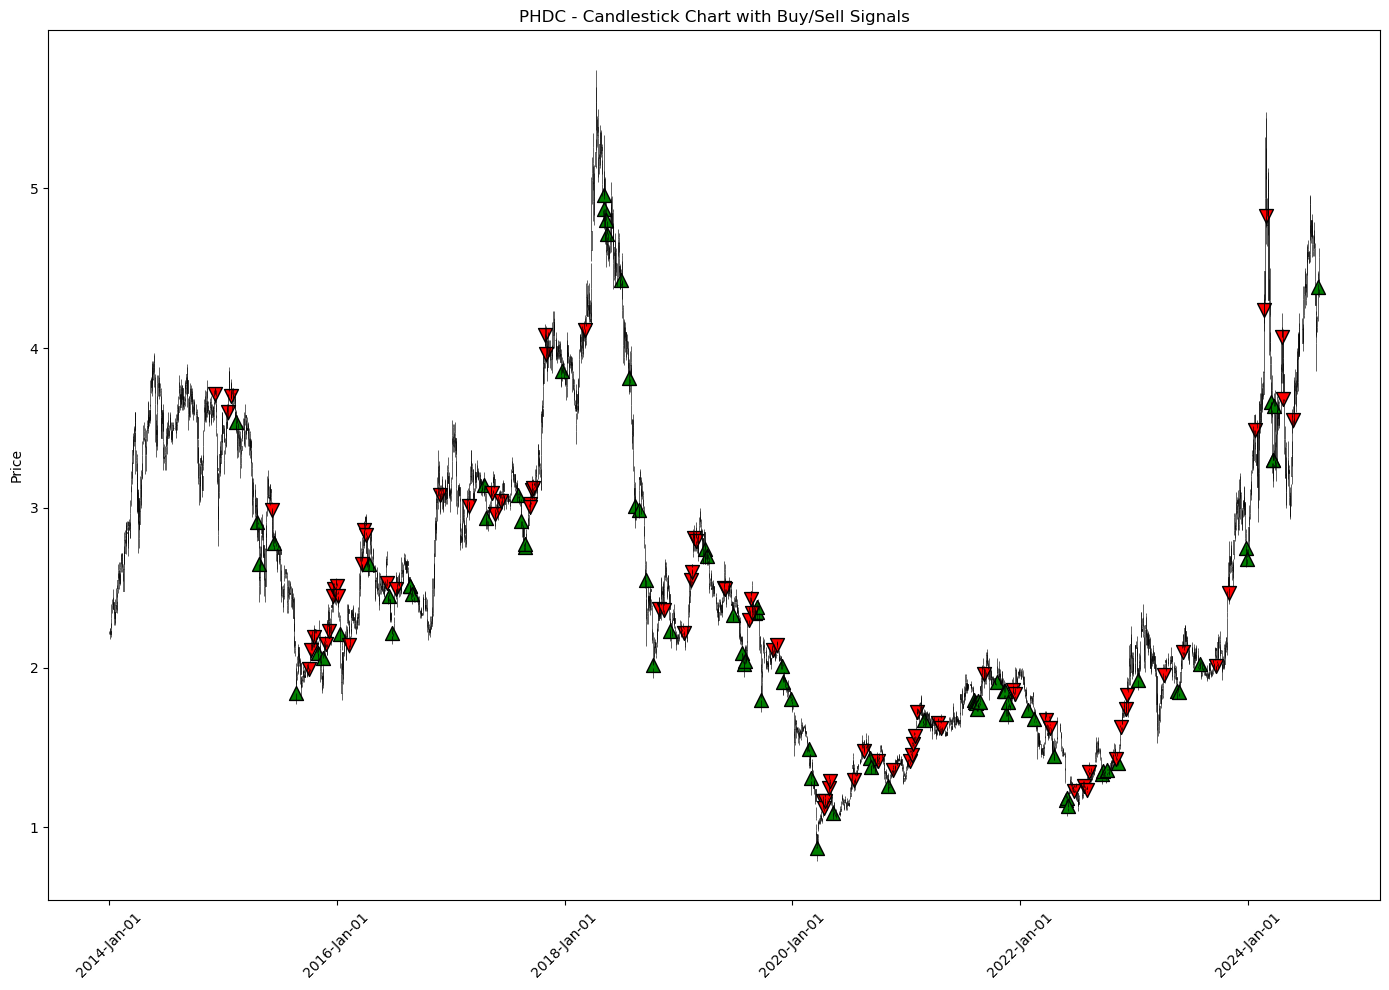

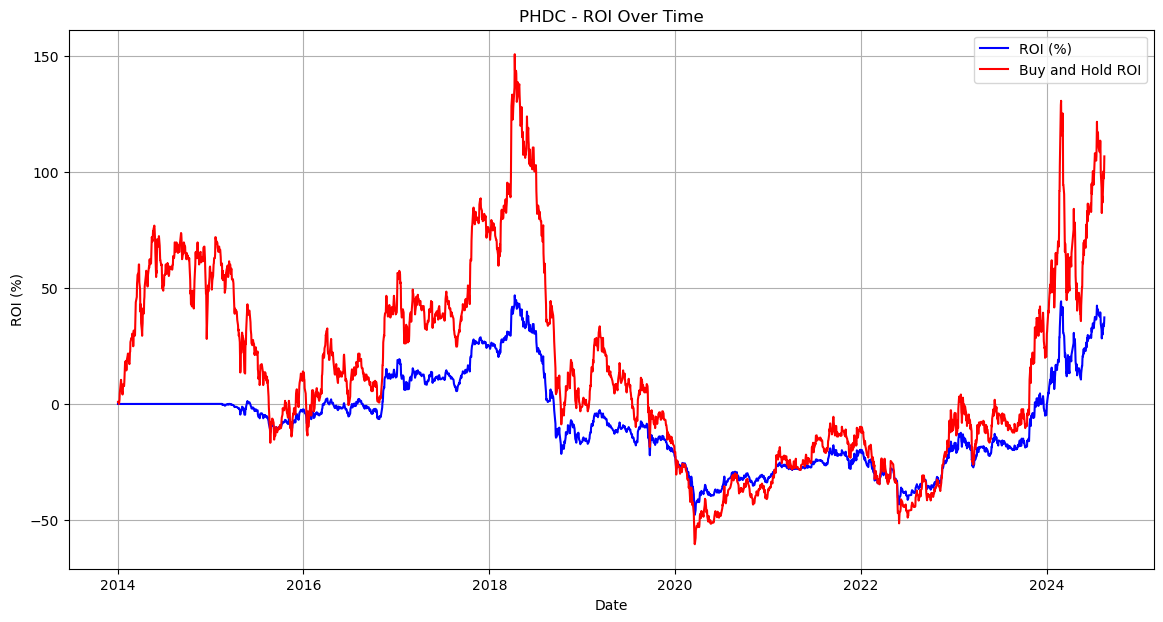

PHDC - Final ROI: 37.33%
PHDC - Buy and Hold ROI: 106.79%


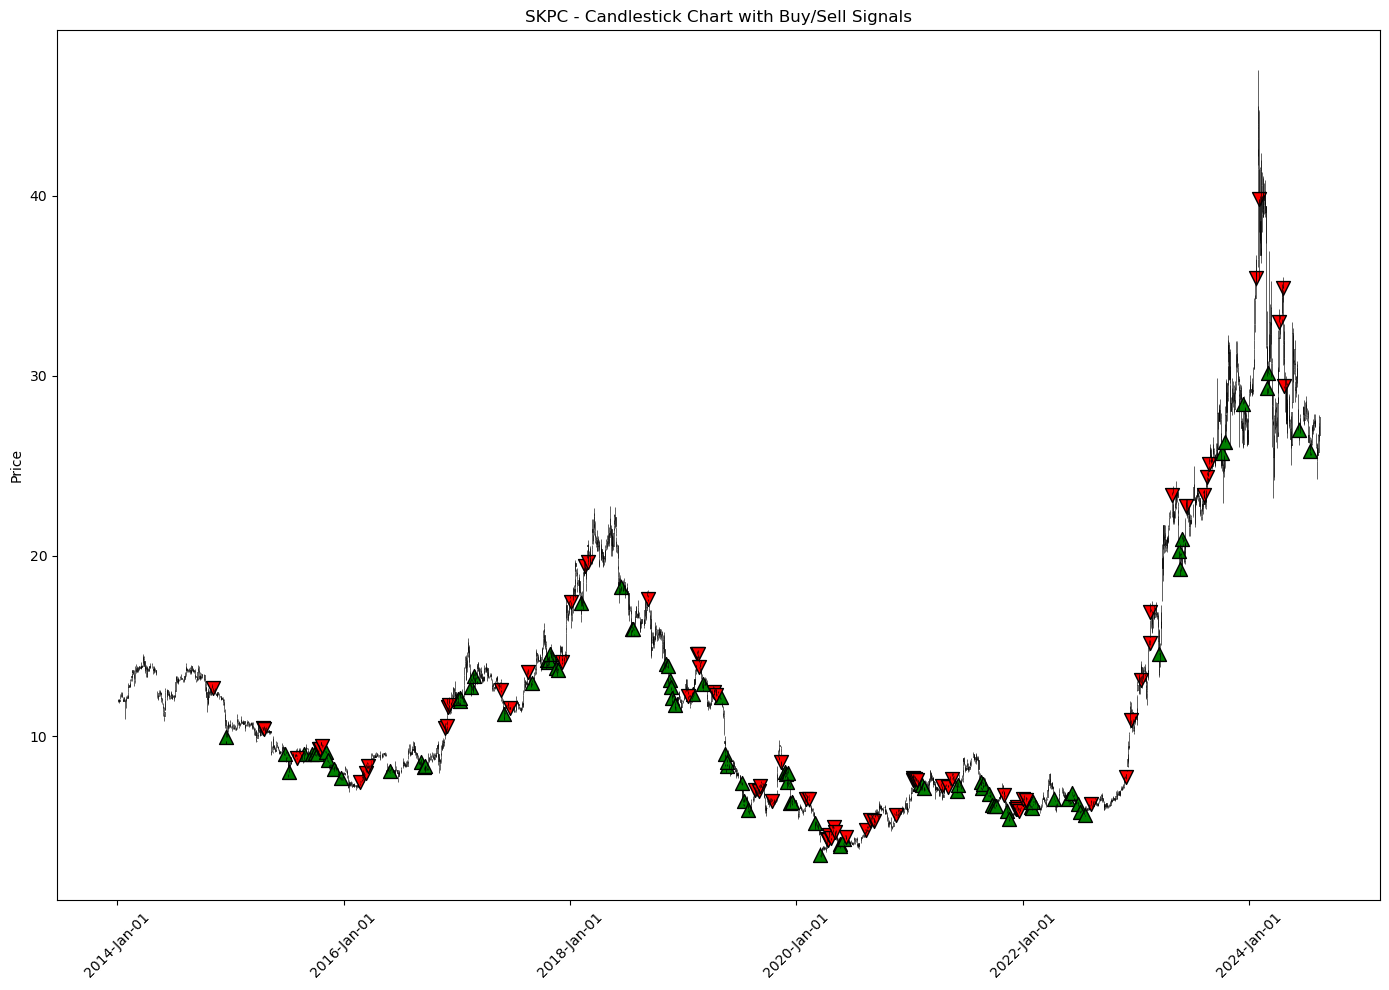

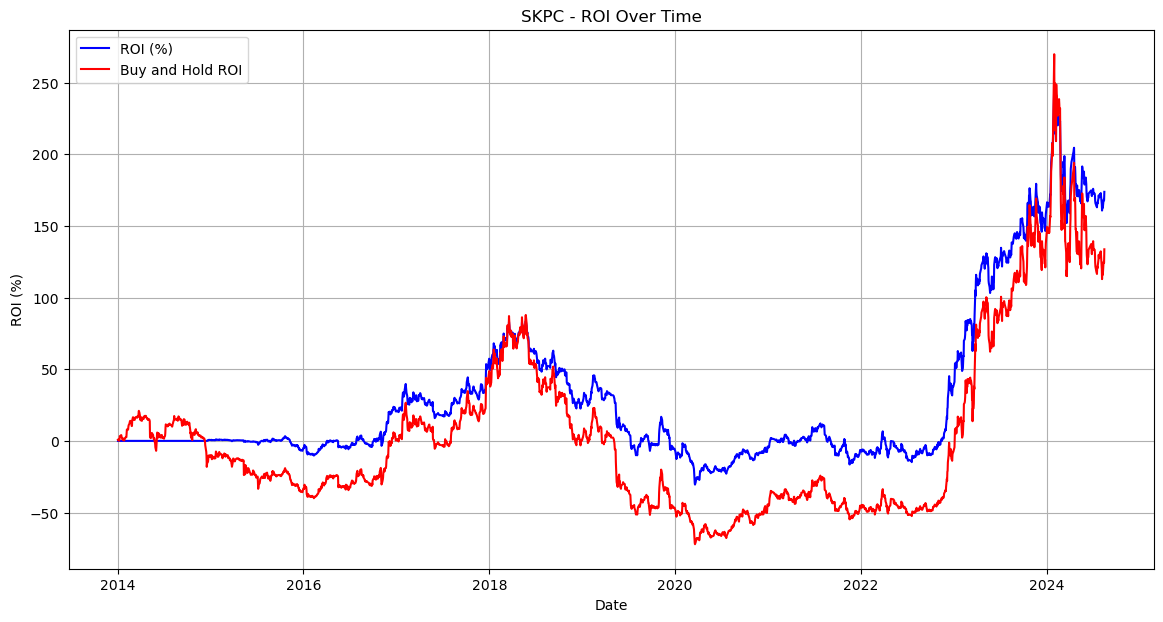

SKPC - Final ROI: 173.79%
SKPC - Buy and Hold ROI: 133.70%


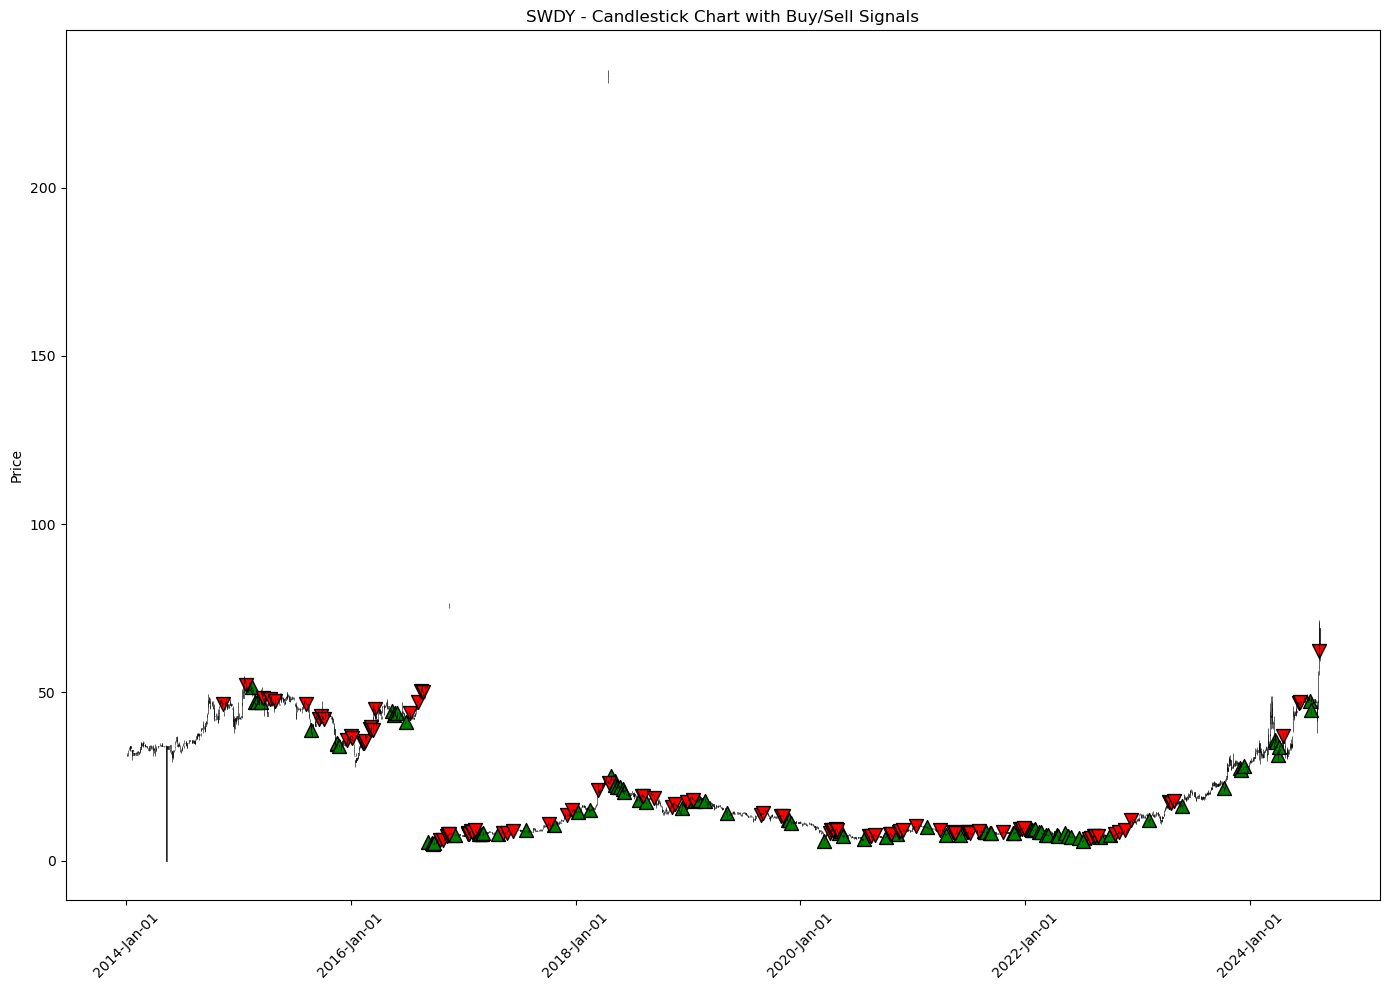

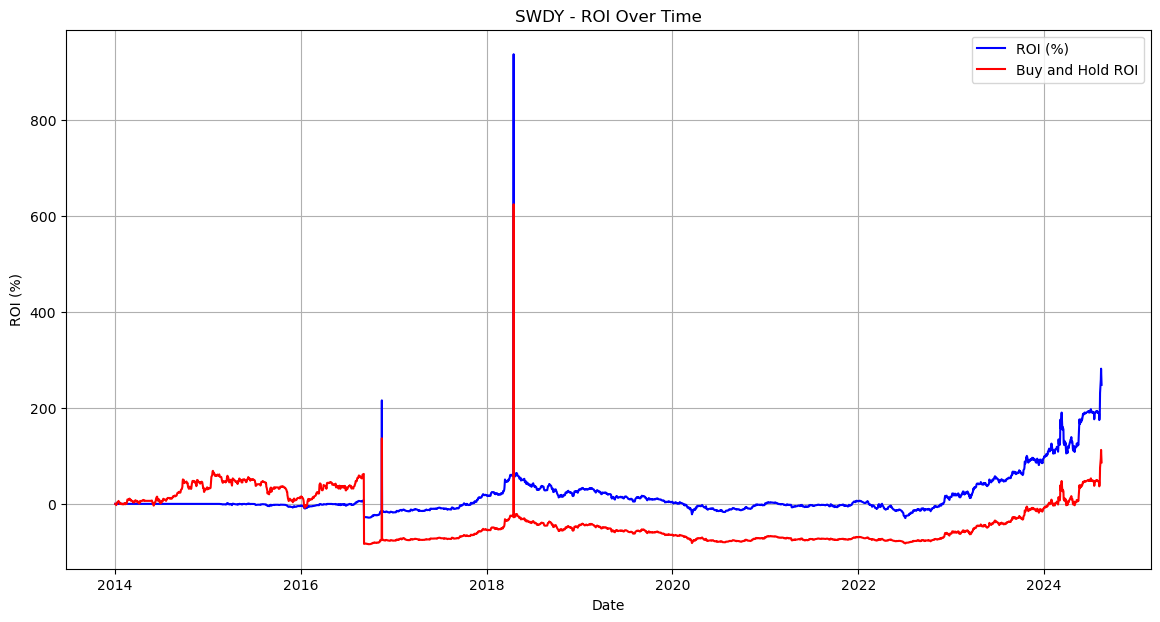

SWDY - Final ROI: 248.27%
SWDY - Buy and Hold ROI: 86.56%


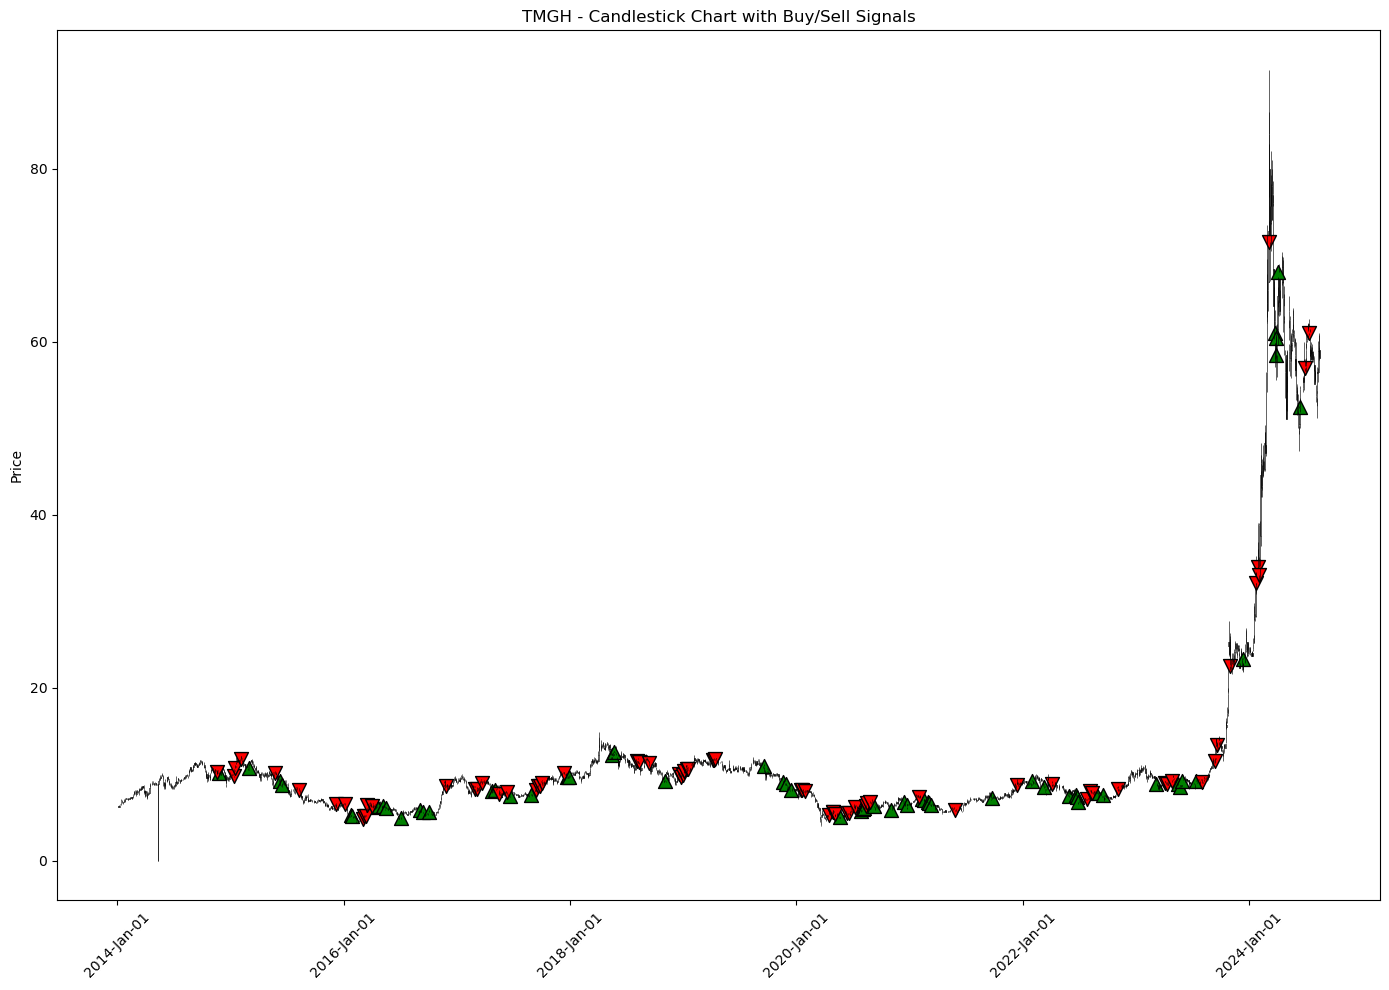

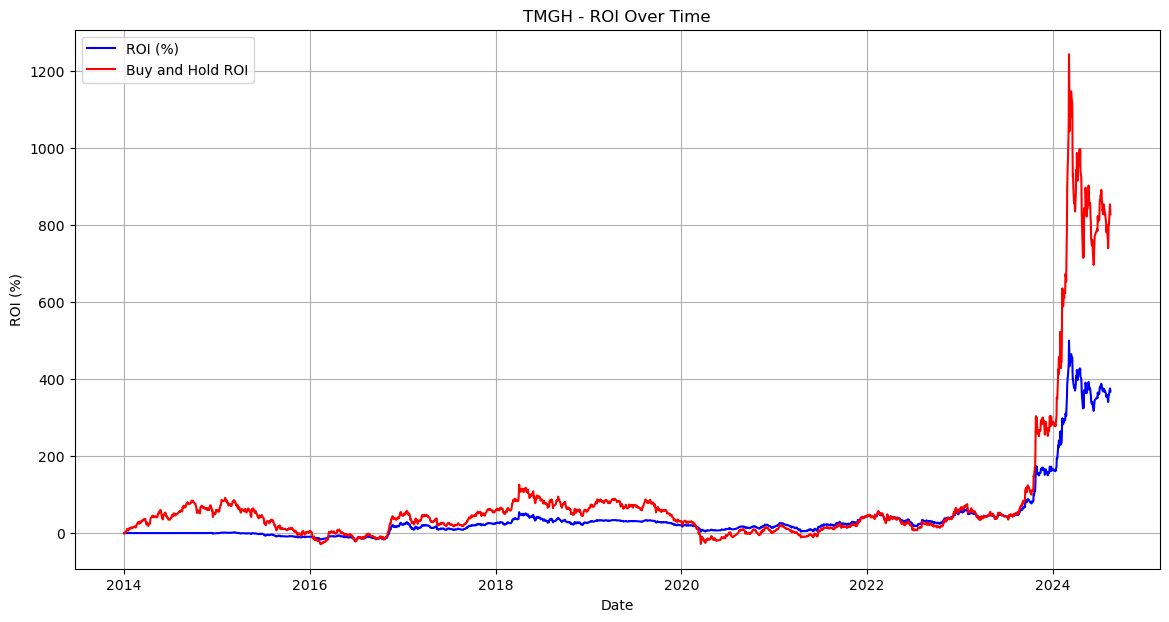

TMGH - Final ROI: 367.97%
TMGH - Buy and Hold ROI: 828.80%


In [12]:
directory_path = r"C:\Users\Ahmed\Trading"
dataframes = load_csv_files_from_directory(directory_path)

# Print the names of the loaded files and their respective DataFrame shapes
for stock_name, df in dataframes.items():
    #df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    data = df
    df.dropna()
    #df = df.iloc[:360]
    df = df.iloc[::-1]
    df.rename(columns={'Price': 'Close'}, inplace=True)
    df.rename(columns={'Vol.': 'Volume'}, inplace=True)

    df['Volume'] = df['Volume'].apply(convert_volume)
    df['Change %'] = df['Change %'].apply(percent_to_float)
    df['RSI'] = calculate_RSI(df)
    df = calculate_stochastic(df)
    df['ADX'] = calculate_ADX(df)
    df = calculate_ma200(df)
    df = calculate_ma55(df)
    df['MA7'] = df['Close'].rolling(window=7).mean()
    df['MA25'] = df['Close'].rolling(window=25).mean()
    df['Trend'] = df.apply(get_trend, axis=1)
    
    df['Signal'] = 0

    #For Loop For Creating Buy/Sell Signals
    
    for i in range(len(df)):
        if df['Close'].iloc[i] > df['MA200'].iloc[i] and df['Close'].iloc[i] > df['MA55'].iloc[i] and df['ADX'].iloc[i] > 25:
            #Normal Situation
            
            rsi_lower_threshold = 30
            rsi_upper_threshold = 85            
            if df['RSI'].iloc[i-1] < rsi_lower_threshold and df['RSI'].iloc[i] >= rsi_lower_threshold:
                df['Signal'].iloc[i] = 1
            elif df['RSI'].iloc[i-1] > rsi_upper_threshold and df['RSI'].iloc[i] <= rsi_upper_threshold:
                df['Signal'].iloc[i] = -1
    
            overbought_threshold = 90
            oversold_threshold = 25
            if df['%K'].iloc[i-1] < df['%D'].iloc[i-1] and df['%K'].iloc[i] >= df['%D'].iloc[i] and df['%K'].iloc[i] < oversold_threshold:
                df['Signal'].iloc[i] = 1
            elif df['%K'].iloc[i-1] > df['%D'].iloc[i-1] and df['%K'].iloc[i] <= df['%D'].iloc[i] and df['%K'].iloc[i] > overbought_threshold:
                df['Signal'].iloc[i] = -1
    
        elif df['Close'].iloc[i] > df['MA200'].iloc[i] and df['ADX'].iloc[i] <= 25:
            #Trend is weak: making buy/sell signals hard
    
            rsi_lower_threshold = 30
            rsi_upper_threshold = 70            
            if df['RSI'].iloc[i-1] < rsi_lower_threshold and df['RSI'].iloc[i] >= rsi_lower_threshold:
                df['Signal'].iloc[i] = 1
            elif df['RSI'].iloc[i-1] > rsi_upper_threshold and df['RSI'].iloc[i] <= rsi_upper_threshold:
                df['Signal'].iloc[i] = -1
    
            overbought_threshold = 80
            oversold_threshold = 20
            if df['%K'].iloc[i-1] < df['%D'].iloc[i-1] and df['%K'].iloc[i] >= df['%D'].iloc[i] and df['%K'].iloc[i] < oversold_threshold:
                df['Signal'].iloc[i] = 1
            elif df['%K'].iloc[i-1] > df['%D'].iloc[i-1] and df['%K'].iloc[i] <= df['%D'].iloc[i] and df['%K'].iloc[i] > overbought_threshold:
                df['Signal'].iloc[i] = -1
    
        elif df['Close'].iloc[i] > df['MA200'].iloc[i] and df['Close'].iloc[i] <= df['MA55'].iloc[i]:
            #Sudden drop: Make is very hard to buy, buy easy to sell
    
            rsi_lower_threshold = 15
            rsi_upper_threshold = 60            
            if df['RSI'].iloc[i-1] < rsi_lower_threshold and df['RSI'].iloc[i] >= rsi_lower_threshold:
                df['Signal'].iloc[i] = 1
            elif df['RSI'].iloc[i-1] > rsi_upper_threshold and df['RSI'].iloc[i] <= rsi_upper_threshold:
                df['Signal'].iloc[i] = -1
    
            overbought_threshold = 70
            oversold_threshold = 10
            if df['%K'].iloc[i-1] < df['%D'].iloc[i-1] and df['%K'].iloc[i] >= df['%D'].iloc[i] and df['%K'].iloc[i] < oversold_threshold:
                df['Signal'].iloc[i] = 1
            elif df['%K'].iloc[i-1] > df['%D'].iloc[i-1] and df['%K'].iloc[i] <= df['%D'].iloc[i] and df['%K'].iloc[i] > overbought_threshold:
                df['Signal'].iloc[i] = -1
     
        elif df['Close'].iloc[i] <= df['MA200'].iloc[i] and df['Close'].iloc[i] > df['MA55'].iloc[i]:
            #Sudden Spike (Easy Buy)
    
            rsi_lower_threshold = 40
            rsi_upper_threshold = 75            
            if df['RSI'].iloc[i-1] < rsi_lower_threshold and df['RSI'].iloc[i] >= rsi_lower_threshold:
                df['Signal'].iloc[i] = 1
            elif df['RSI'].iloc[i-1] > rsi_upper_threshold and df['RSI'].iloc[i] <= rsi_upper_threshold:
                df['Signal'].iloc[i] = -1
    
            overbought_threshold = 85
            oversold_threshold = 30
            if df['%K'].iloc[i-1] < df['%D'].iloc[i-1] and df['%K'].iloc[i] >= df['%D'].iloc[i] and df['%K'].iloc[i] < oversold_threshold:
                df['Signal'].iloc[i] = 1
            elif df['%K'].iloc[i-1] > df['%D'].iloc[i-1] and df['%K'].iloc[i] <= df['%D'].iloc[i] and df['%K'].iloc[i] > overbought_threshold:
                df['Signal'].iloc[i] = -1
                
        elif df['Close'].iloc[i] <= df['MA200'].iloc[i] and df['Close'].iloc[i] <= df['MA55'].iloc[i]:
            #Short buys/sells (little wins)
            
            rsi_lower_threshold = 7.5
            rsi_upper_threshold = 70            
            if df['RSI'].iloc[i-1] < rsi_lower_threshold and df['RSI'].iloc[i] >= rsi_lower_threshold:
                df['Signal'].iloc[i] = 1
            elif df['RSI'].iloc[i-1] > rsi_upper_threshold and df['RSI'].iloc[i] <= rsi_upper_threshold:
                df['Signal'].iloc[i] = -1
    
            overbought_threshold = 80
            oversold_threshold = 15
            if df['%K'].iloc[i-1] < df['%D'].iloc[i-1] and df['%K'].iloc[i] >= df['%D'].iloc[i] and df['%K'].iloc[i] < oversold_threshold:
                df['Signal'].iloc[i] = 1
            elif df['%K'].iloc[i-1] > df['%D'].iloc[i-1] and df['%K'].iloc[i] <= df['%D'].iloc[i] and df['%K'].iloc[i] > overbought_threshold:
                df['Signal'].iloc[i] = -1


    #Plot For the Buy/Sell Signals
    fig, (ax1) = plt.subplots(1, 1, figsize=(14, 10))

    mpf.plot(df, type='candle', ax=ax1, volume=False, show_nontrading=True)
    ax1.scatter(df.index[df['Signal'] == 1], df['Close'][df['Signal'] == 1], 
                label='Buy Signal', marker='^', color='green', s=100, edgecolor='black')
    ax1.scatter(df.index[df['Signal'] == -1], df['Close'][df['Signal'] == -1], 
                label='Sell Signal', marker='v', color='red', s=100, edgecolor='black')
    ax1.set_title(f'{stock_name} - Candlestick Chart with Buy/Sell Signals')
    ax1.set_ylabel('Price')
    
    plt.tight_layout()
    plt.show()


    #Setting Up the Buy & Hold ROI
    
    data.dropna(inplace=True)
    data.rename(columns={'Price': 'Close'}, inplace=True)
    data = data.sort_values(by='Date')
    
    initial_capital = 1_000_000
    buy_price = data['Open'].iloc[0] 
    shares_bought = initial_capital / buy_price
    data['Portfolio_Value'] = shares_bought * data['Close']
    data['ROI'] = (data['Portfolio_Value'] - initial_capital) / initial_capital * 100
    roi_buy_hold = data['ROI'].iloc[-1]


    #Finding the ROI of the Strategy
    
    initial_capital = 1_000_000
    capital = initial_capital
    shares_held = 0
    
    capital_history = []
    total_value_history = []
    roi_history = []
    
    for i in range(len(df)):
        price = df['Close'].iloc[i]
        signal = df['Signal'].iloc[i]
        
        if signal == 1:
            buy_amount = 0.10 * capital
            shares_bought = buy_amount / price
            shares_held += shares_bought
            capital -= buy_amount
        
        elif signal == -1 and shares_held > 0:
            sell_amount = 0.10 * shares_held
            shares_sold_value = sell_amount * price
            shares_held -= sell_amount
            capital += shares_sold_value
        
        total_value = capital + (shares_held * price)
        
        roi = (total_value - initial_capital) / initial_capital * 100
        
        capital_history.append(capital)
        total_value_history.append(total_value)
        roi_history.append(roi)
    
    df_roi = pd.DataFrame({
        'Date': df.index,
        'ROI': roi_history
    })


    #Plot the ROI over Time

    plt.figure(figsize=(14, 7))
    plt.plot(df_roi['Date'], df_roi['ROI'], label='ROI (%)', color='blue')
    plt.plot(data.index, data['ROI'], label='Buy and Hold ROI', color='red')
    plt.title(f'{stock_name} - ROI Over Time')
    plt.xlabel('Date')
    plt.ylabel('ROI (%)')
    plt.grid(True)
    plt.legend()
    plt.show()


    #Print the ROI of Buy & Hold vs. Strategy

    final_roi = roi_history[-1]
    print(f"{stock_name} - Final ROI: {final_roi:.2f}%")
    print(f"{stock_name} - Buy and Hold ROI: {roi_buy_hold:.2f}%")